In [ ]:
!nvidia-smi

Sun Apr  9 05:23:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DeepSteganography/DeepSteganography-master
%ls

/content/drive/MyDrive/DeepSteganography/DeepSteganography-master
Deep_steg_finale_changes3.ipynb  Images/  README.md


In [1]:
!pip install tensorflow==2.12.0
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
import tensorflow
print(tensorflow.__version__)

2.12.0


In [3]:
### Imports ###
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard
#from keras.engine.topology import Container
#from keras.engine.network import Network
from keras.layers import *
from keras import backend
from keras.models import Model
from keras.preprocessing import image
import keras.backend as K

import matplotlib.pyplot as plt

import numpy as np
import os
import random
import scipy.misc
from tqdm import *

%matplotlib inline

In [4]:
# Dataset zip file
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is AEE6-0358

 Directory of C:\Users\RITWEEK RAJ\Downloads

12-04-2023  17:54    <DIR>          .
12-04-2023  17:48    <DIR>          ..
12-04-2023  17:54    <DIR>          .ipynb_checkpoints
05-09-2022  19:28           129,473 10th-marksheet.pdf
05-09-2022  19:29            97,727 12th-marksheet.pdf
19-12-2022  13:08         2,014,332 19BCE0597.ipynb
09-09-2022  13:11           593,131 19BCE0597_VL2020210504901_AST05.pdf
01-10-2022  20:10           263,120 2200691891 - Ritweek Raj.pdf
20-02-2023  15:38           512,640 abc.jpg
10-08-2022  18:25        29,756,784 AccessData FTK Imager.exe
17-10-2021  00:24        20,385,120 Advanced_IP_Scanner_2.5.3850.exe
05-02-2021  09:19       479,396,152 Anaconda3-2020.11-Windows-x86_64.exe
03-10-2021  01:40       957,232,976 android-studio-2020.3.1.24-windows.exe
12-04-2023  13:14       497,536,564 archive.zip
06-10-2021  17:28       119,000,752 arduino-1.8.16-windows.exe
27-07-2022  23:06     1

In [ ]:
# Unzipping the contents present in our database
!unzip /content/drive/MyDrive/DeepSteganography/DeepSteganography-master/tiny-imagenet-200.zip


Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-ima

In [6]:
%ls
import keras.utils as image

 Volume in drive C is Windows
 Volume Serial Number is AEE6-0358

 Directory of C:\Users\RITWEEK RAJ\Downloads

12-04-2023  17:54    <DIR>          .
12-04-2023  17:48    <DIR>          ..
12-04-2023  17:54    <DIR>          .ipynb_checkpoints
05-09-2022  19:28           129,473 10th-marksheet.pdf
05-09-2022  19:29            97,727 12th-marksheet.pdf
19-12-2022  13:08         2,014,332 19BCE0597.ipynb
09-09-2022  13:11           593,131 19BCE0597_VL2020210504901_AST05.pdf
01-10-2022  20:10           263,120 2200691891 - Ritweek Raj.pdf
20-02-2023  15:38           512,640 abc.jpg
10-08-2022  18:25        29,756,784 AccessData FTK Imager.exe
17-10-2021  00:24        20,385,120 Advanced_IP_Scanner_2.5.3850.exe
05-02-2021  09:19       479,396,152 Anaconda3-2020.11-Windows-x86_64.exe
03-10-2021  01:40       957,232,976 android-studio-2020.3.1.24-windows.exe
12-04-2023  13:14       497,536,564 archive.zip
06-10-2021  17:28       119,000,752 arduino-1.8.16-windows.exe
27-07-2022  23:06     1

In [ ]:
### Constants ###
DATA_DIR = "./tiny-imagenet-200" 
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TEST_DIR = os.path.join(DATA_DIR, "test")

IMG_SHAPE = (64, 64)

def load_dataset_small(num_images_per_class_train=10, num_images_test=500):
    """Loads training and test datasets

    Arguments:
        num_images_per_class_train: number of images per class to load into training dataset.
        num_images_test: total number of images to load into training dataset.
    """

    X_train = []
    X_test = []
    
    # Create training set.
    for c in os.listdir("./tiny-imagenet-200/train"):
        c_dir = os.path.join("./tiny-imagenet-200/train", c, 'images')
        c_imgs = os.listdir(c_dir)
        random.shuffle(c_imgs)
        for img_name_i in c_imgs[0:num_images_per_class_train]:
            img_i = image.load_img(os.path.join(c_dir, img_name_i))
            x = image.img_to_array(img_i)
            X_train.append(x)
    random.shuffle(X_train)
    
    
    # Create test set.
    test_dir = os.path.join(TEST_DIR, 'images')
    test_imgs = os.listdir(test_dir)
    random.shuffle(test_imgs)
    for img_name_i in test_imgs[0:num_images_test]:
        print("2")
        img_i = image.load_img(os.path.join(test_dir, img_name_i))
        x = image.img_to_array(img_i)
        X_test.append(x)
    
    # Return train and test data as numpy arrays.
    #return np.array(X_train), np.array(X_test)
    return np.array(X_train)

In [ ]:
# Load dataset.
#X_train_orig, X_test_orig = load_dataset_small()
X_train_orig = load_dataset_small()

# Normalize image vectors.
X_train = X_train_orig/255.
#X_test = X_test_orig/255.

# Print statistics.
print ("Number of training examples = " + str(X_train.shape[0]))
print ("Number of test examples = " + str(X_train.shape[0]))
print ("X_train shape: " + str(X_train.shape)) # Should be (train_size, 64, 64, 3).

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [ ]:
# We split training set into two halfs.
# First half is used for training as secret images, second half for cover images.

# S1: secret image1
input_S1 = X_train[0:X_train.shape[0] // 4]
# S2: secret image2
input_S2 = X_train[X_train.shape[0] // 4 : 2*(X_train.shape[0] // 4)]
# S3: secret image3
input_S3 = X_train[2*(X_train.shape[0] // 4) : 3*(X_train.shape[0] // 4)]




# C: cover image
input_C = X_train[3*(X_train.shape[0] // 4):]

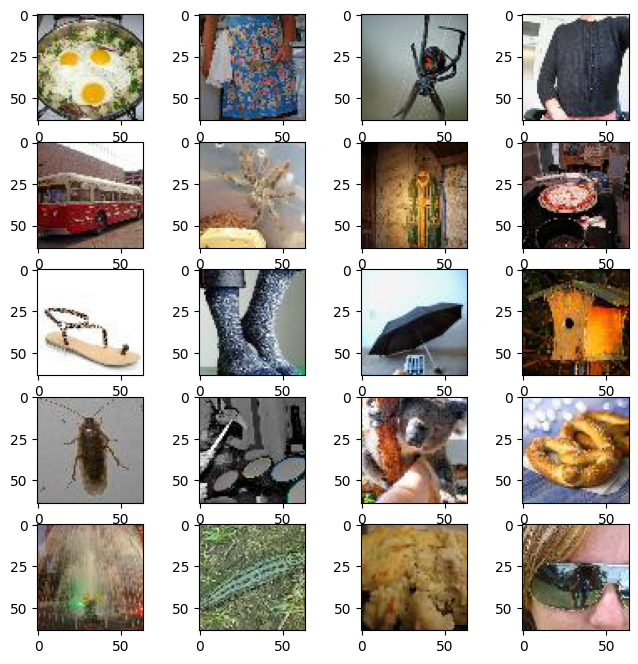

In [ ]:
# Show sample images from the training dataset
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    # Randomly sample from training dataset
    img_idx = np.random.choice(X_train.shape[0])
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[img_idx])
plt.show()

**Model**

The model is composed of three parts: The Preparation Network, Hiding Network (Encoder) and the Reveal Network. Its goal is to be able to encode information about the secret image S into the cover image C, generating C' that closely resembles C, while still being able to decode information from C' to generate the decoded secret image S', which should resemble S as closely as possible.

The Preparation Network has the responsibility of preparing data from the secret image to be concatenated with the cover image and fed to the Hiding Network. The Hiding Network than transforms that input into the encoded cover image C'. Finally, the Reveal Network decodes the secret image S' from C'. For stability, we add noise before the Reveal Network, as suggested by the paper. Although the author of the paper didn't originally specify the architecture of the three networks, we discovered aggregated layers showed good results. For both the Hiding and Reveal networks, we use 5 layers of 65 filters (50 3x3 filters, 10 4x4 filters and 5 5x5 filters). For the preparation network, we use only 2 layers with the same structure.

Note that the loss function for the Reveal Network is different from the loss function for the Preparation and Hiding Networks. In order to correctly implement the updates for the weights in the networks, we create stacked Keras models, one for the Preparation and Hiding Network (which share the same loss function) and one for the Reveal Network. To make sure weights are updated only once, we freeze the weights on the layers of the Reveal Network before adding it to the full model.

In [ ]:
# Variable used to weight the losses of the secret and cover images (See paper for more details)
beta = 1.0
    
# Loss for reveal network
def rev_loss(s_true, s_pred):
    # Loss for reveal network is: beta * |S-S'|
    #return s_true-s_pred

    print(s_true.shape, s_pred.shape)
    return beta * K.sum(K.square(s_true - s_pred))

# Loss for the full model, used for preparation and hidding networks
def full_loss(y_true, y_pred):
    # Loss for the full model is: |C-C'| + beta * |S-S'|
    print(y_true.shape, y_pred.shape)
    s1_true, s2_true, s3_true, c_true = y_true[...,0:3], y_true[...,3:6], y_true[...,6:9], y_true[...,9:12]
    s1_pred, s2_pred, s3_pred, c_pred = y_pred[...,0:3], y_pred[...,3:6], y_pred[...,6:9], y_pred[...,9:12]

    #s_loss = rev_loss(s_true, s_pred)
    s1_loss = beta * K.sum(K.square(s1_true - s1_pred))
    s2_loss = beta * K.sum(K.square(s2_true - s2_pred))
    s3_loss = beta * K.sum(K.square(s3_true - s3_pred))
    c_loss = K.sum(K.square(c_true - c_pred))
    
    return s1_loss + c_loss + s2_loss + s3_loss


# Returns the encoder as a Keras model, composed by Preparation and Hiding Networks.
def make_encoder(input_size):
    input_S1 = Input(shape=(input_size))
    input_S2 = Input(shape=(input_size))
    input_S3 = Input(shape=(input_size))
    input_C= Input(shape=(input_size))

    # Preparation Network
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_3x3_1')(input_S1)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_4x4_1')(input_S1)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_5x5_1')(input_S1)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_3x3_1')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_4x4_1')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_5x5_1')(x)
    x1 = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_3x3_2')(input_S2)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_4x4_2')(input_S2)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_5x5_2')(input_S2)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_3x3_2')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_4x4_2')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_5x5_2')(x)
    x2 = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_3x3_3')(input_S3)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_4x4_3')(input_S3)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_5x5_3')(input_S3)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_3x3_3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_4x4_3')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_5x5_3')(x)
    x3_1 = concatenate([x3, x4, x5])
    
    x = concatenate([input_C, x1, x2, x3_1])
    
    # Hiding network
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid4_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid4_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid5_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    output_Cprime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_C')(x)
    
    return Model(inputs=[input_S1, input_S2, input_S3, input_C],
                 outputs=output_Cprime,
                 name = 'Encoder')

# Returns the decoder as a Keras model, composed by the Reveal Network
def make_decoder1(input_size, fixed=False):
    
    # Reveal network
    reveal_input = Input(shape=(input_size))
    
    # Adding Gaussian noise with 0.01 standard deviation.
    input_with_noise = GaussianNoise(0.01, name='output_C_noise1')(reveal_input)
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_3x3_1')(input_with_noise)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_4x4_1')(input_with_noise)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_5x5_1')(input_with_noise)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_3x3_1')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_4x4_1')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_5x5_1')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_3x3_1')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_4x4_1')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_5x5_1')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_3x3_1')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_4x4_1')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_5x5_1')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_3x3_1')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_4x4_1')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev5_5x5_1')(x)
    x = concatenate([x3, x4, x5])
    
    output_S1prime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_S1')(x)
    
    if not fixed:
        return Model(inputs=reveal_input,
                     outputs=output_S1prime)
    else:
        """return Container(inputs=reveal_input,
                         outputs=output_Sprime,
                         name = 'DecoderFixed')"""
        return Network(inputs=reveal_input,
                         outputs=output_S1prime)
        
# Returns the decoder as a Keras model, composed by the Reveal Network
def make_decoder2(input_size, fixed=False):
    
    # Reveal network
    reveal_input = Input(shape=(input_size))
    
    # Adding Gaussian noise with 0.01 standard deviation.
    input_with_noise = GaussianNoise(0.01, name='output_C_noise2')(reveal_input)
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_3x3_2')(input_with_noise)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_4x4_2')(input_with_noise)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_5x5_2')(input_with_noise)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_3x3_2')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_4x4_2')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_5x5_2')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_3x3_2')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_4x4_2')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_5x5_2')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_3x3_2')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_4x4_2')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_5x5_2')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_3x3_2')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_4x4_2')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev5_5x5_2')(x)
    x = concatenate([x3, x4, x5])
    
    output_S2prime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_S2')(x)
    
    if not fixed:
        return Model(inputs=reveal_input,
                     outputs=output_S2prime)
    else:
        """return Container(inputs=reveal_input,
                         outputs=output_S2prime,
                         name = 'DecoderFixed')"""
        return Network(inputs=reveal_input,
                         outputs=output_S2prime)

# Returns the decoder as a Keras model, composed by the Reveal Network
def make_decoder3(input_size, fixed=False):
    
    # Reveal network
    reveal_input = Input(shape=(input_size))
    
    # Adding Gaussian noise with 0.01 standard deviation.
    input_with_noise = GaussianNoise(0.01, name='output_C_noise2')(reveal_input)
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_3x3')(input_with_noise)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_4x4')(input_with_noise)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_5x5')(input_with_noise)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev5_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    output_S3prime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_S3')(x)
    
    if not fixed:
        return Model(inputs=reveal_input,
                     outputs=output_S3prime)
    else:
        """return Container(inputs=reveal_input,
                         outputs=output_S2prime,
                         name = 'DecoderFixed')"""
        return Network(inputs=reveal_input,
                         outputs=output_S3prime)

# Full model.
def make_model(input_size):
    input_S1 = Input(shape=(input_size))
    input_S2 = Input(shape=(input_size))
    input_S3 = Input(shape=(input_size))
    input_C= Input(shape=(input_size))
    
    encoder = make_encoder(input_size)
    
    decoder1 = make_decoder1(input_size)
    decoder1.compile(optimizer='adam', loss=rev_loss)
    decoder1.trainable = False

    decoder2 = make_decoder2(input_size)
    decoder2.compile(optimizer='adam', loss=rev_loss)
    decoder2.trainable = False

    decoder3 = make_decoder3(input_size)
    decoder3.compile(optimizer='adam', loss=rev_loss)
    decoder3.trainable = False
    
    output_Cprime = encoder([input_S1, input_S2, input_S3, input_C])
    output_S1prime = decoder1(output_Cprime)
    output_S2prime = decoder2(output_Cprime)
    output_S3prime = decoder3(output_Cprime)

    autoencoder1 = Model(inputs=[input_S1, input_S2, input_S3, input_C],
                        outputs=concatenate([output_S1prime, output_S2prime, output_S3prime, output_Cprime]))
    autoencoder1.compile(optimizer='adam', loss=full_loss)
    
    # autoencoder2 = Model(inputs=[input_S1, input_S2, input_C],
    #                     outputs=concatenate([output_S2prime, output_Cprime]))
    # autoencoder2.compile(optimizer='adam', loss=full_loss)


    return encoder, decoder1, decoder2, decoder3, autoencoder1

In [ ]:
encoder_model, reveal_model1, reveal_model2, reveal_model3, autoencoder_model = make_model(input_S1.shape[1:])

# **Training**


Although the author of the paper didn't explicitly described the learning rate schedule or the optimizer properties, we used our own schedule with ADAM optimizer. We train for 1000 epochs with a batch size of 32.

In [ ]:
def lr_schedule(epoch_idx):
    if epoch_idx < 200:
        return 0.001
    elif epoch_idx < 400:
        return 0.0003
    elif epoch_idx < 600:
        return 0.0001
    else:
        return 0.00003

In [ ]:
NB_EPOCHS = 2
BATCH_SIZE = 256

m = input_S1.shape[0]
loss_history = []
#loss_history2 = []
for epoch in range(NB_EPOCHS):
    np.random.shuffle(input_S1)
    np.random.shuffle(input_S2)
    np.random.shuffle(input_S3)
    np.random.shuffle(input_C)
    
    t = tqdm(range(0, input_S1.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    #ae_loss2 = []
    rev_loss1 = []
    rev_loss2 = []
    rev_loss3 = []
    for idx in t:
        
        batch_S1 = input_S1[idx:min(idx + BATCH_SIZE, m)]
        batch_S2 = input_S2[idx:min(idx + BATCH_SIZE, m)]
        batch_S3 = input_S3[idx:min(idx + BATCH_SIZE, m)]
        batch_C = input_C[idx:min(idx + BATCH_SIZE, m)]
        
        C_prime = encoder_model.predict([batch_S1, batch_S2, batch_S3, batch_C])
        
        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S1, batch_S2, batch_S3, batch_C],
                                                   y=np.concatenate((batch_S1, batch_S2, batch_S3, batch_C),axis=3)))
        #ae_loss2.append(autoencoder_model2.train_on_batch(x=[batch_S1, batch_S2, batch_C],
        #                                           y=np.concatenate((batch_S2, batch_C),axis=3)))
        rev_loss1.append(reveal_model1.train_on_batch(x=C_prime,
                                              y=batch_S1))
        rev_loss2.append(reveal_model2.train_on_batch(x=C_prime,
                                              y=batch_S2))
        rev_loss3.append(reveal_model3.train_on_batch(x=C_prime,
                                              y=batch_S3))
        
        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        #K.set_value(autoencoder_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model1.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model3.optimizer.lr, lr_schedule(epoch))
        
        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev1 {:10.2f} | Loss Rev2 {:10.2f} | Loss Rev3 {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(rev_loss1), np.mean(rev_loss2), np.mean(rev_loss3)))
    
    autoencoder_model.save_weights('models/model3_'+str(epoch))
    #autoencoder_model2.save_weights('models/model'+str(epoch))
    
    loss_history.append(np.mean(ae_loss))
    #loss_history2.append(np.mean(ae_loss2))

  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 9s 50ms/step
(256, 64, 64, 12) (256, 64, 64, 12)
(256, 64, 64, 12) (256, 64, 64, 12)
(256, 64, 64, 3) (256, 64, 64, 3)
(256, 64, 64, 3) (256, 64, 64, 3)
(256, 64, 64, 3) (256, 64, 64, 3)
(256, 64, 64, 3) (256, 64, 64, 3)
(256, 64, 64, 3) (256, 64, 64, 3)
(256, 64, 64, 3) (256, 64, 64, 3)


Epoch 1 | Batch:   0 of 500. Loss AE 3403356.25 | Loss Rev1  858933.75 | Loss Rev2  890391.06 | Loss Rev3  884046.50:  50%|█████     | 1/2 [01:03<01:03, 63.44s/it]

8/8 [==============================] - 2s 210ms/step
(None, 64, 64, 12) (None, 64, 64, 12)


(None, 64, 64, 3) (None, 64, 64, 3)


(None, 64, 64, 3) (None, 64, 64, 3)
(None, 64, 64, 3) (None, 64, 64, 3)


Epoch 1 | Batch: 256 of 500. Loss AE 3252108.62 | Loss Rev1  832146.44 | Loss Rev2  732593.00 | Loss Rev3  587372.44: 100%|██████████| 2/2 [01:35<00:00, 47.72s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 2 | Batch:   0 of 500. Loss AE 2691721.75 | Loss Rev1  719585.19 | Loss Rev2  706606.31 | Loss Rev3  694188.69:  50%|█████     | 1/2 [00:08<00:08,  8.54s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 2 | Batch: 256 of 500. Loss AE 2177278.50 | Loss Rev1  580384.34 | Loss Rev2  524326.83 | Loss Rev3  547465.36: 100%|██████████| 2/2 [00:14<00:00,  7.26s/it]


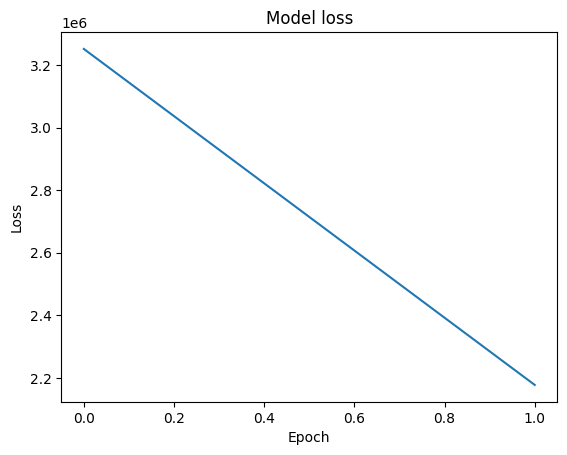

In [ ]:
1# Plot loss through epochs
plt.plot(loss_history)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
for epoch in range(5):
    np.random.shuffle(input_S1)
    np.random.shuffle(input_S2)
    np.random.shuffle(input_S3)
    np.random.shuffle(input_C)
    
    t = tqdm(range(0, input_S1.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    rev_loss1 = []
    rev_loss2 = []
    rev_loss3 = []
    for idx in t:
        
        batch_S1 = input_S1[idx:min(idx + BATCH_SIZE, m)]
        batch_S2 = input_S2[idx:min(idx + BATCH_SIZE, m)]
        batch_S3 = input_S3[idx:min(idx + BATCH_SIZE, m)]
        batch_C = input_C[idx:min(idx + BATCH_SIZE, m)]
        
        C_prime = encoder_model.predict([batch_S1, batch_S2, batch_S3, batch_C])
        
        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S1, batch_S2, batch_S3, batch_C],
                                                   y=np.concatenate((batch_S1, batch_S2, batch_S3, batch_C),axis=3)))
        rev_loss1.append(reveal_model1.train_on_batch(x=C_prime,
                                              y=batch_S1))
        rev_loss2.append(reveal_model2.train_on_batch(x=C_prime,
                                              y=batch_S2))
        rev_loss3.append(reveal_model3.train_on_batch(x=C_prime,
                                              y=batch_S3))
        
        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model1.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model3.optimizer.lr, lr_schedule(epoch))
        
        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev1 {:10.2f} | Loss Rev2 {:10.2f} | Loss Rev3 {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(rev_loss1), np.mean(rev_loss2), np.mean(rev_loss3)))
    
    autoencoder_model.save_weights('models/model3_'+str(epoch+6))
    
    loss_history.append(np.mean(ae_loss))

  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 67ms/step


Epoch 1 | Batch:   0 of 500. Loss AE 8850876.00 | Loss Rev1 1767895.50 | Loss Rev2 3927544.00 | Loss Rev3 2594603.50:  50%|█████     | 1/2 [00:08<00:08,  8.44s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 1 | Batch: 256 of 500. Loss AE 5212601.12 | Loss Rev1 1082537.56 | Loss Rev2 2110613.58 | Loss Rev3 1477874.73: 100%|██████████| 2/2 [00:14<00:00,  7.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 2 | Batch:   0 of 500. Loss AE 2597604.00 | Loss Rev1  689269.56 | Loss Rev2  613915.88 | Loss Rev3  656564.19:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 2 | Batch: 256 of 500. Loss AE 2696477.00 | Loss Rev1  691526.09 | Loss Rev2  663038.41 | Loss Rev3  674522.66: 100%|██████████| 2/2 [00:12<00:00,  6.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 61ms/step


Epoch 3 | Batch:   0 of 500. Loss AE 2966606.00 | Loss Rev1  741691.81 | Loss Rev2  735648.75 | Loss Rev3  740364.19:  50%|█████     | 1/2 [00:08<00:08,  8.35s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 3 | Batch: 256 of 500. Loss AE 2980647.88 | Loss Rev1  754371.78 | Loss Rev2  758561.19 | Loss Rev3  731321.38: 100%|██████████| 2/2 [00:14<00:00,  7.37s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 4 | Batch:   0 of 500. Loss AE 3053319.50 | Loss Rev1  768554.75 | Loss Rev2  779778.38 | Loss Rev3  714848.56:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 4 | Batch: 256 of 500. Loss AE 2915454.38 | Loss Rev1  725011.59 | Loss Rev2  738493.00 | Loss Rev3  702716.69: 100%|██████████| 2/2 [00:12<00:00,  6.01s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 5 | Batch:   0 of 500. Loss AE 2839537.25 | Loss Rev1  687853.25 | Loss Rev2  711249.31 | Loss Rev3  685497.19:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 5 | Batch: 256 of 500. Loss AE 2663969.62 | Loss Rev1  629759.94 | Loss Rev2  665451.78 | Loss Rev3  632817.31: 100%|██████████| 2/2 [00:11<00:00,  5.98s/it]


In [ ]:
for epoch in range(50):
    np.random.shuffle(input_S1)
    np.random.shuffle(input_S2)
    np.random.shuffle(input_S3)
    np.random.shuffle(input_C)
    
    t = tqdm(range(0, input_S1.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    rev_loss1 = []
    rev_loss2 = []
    rev_loss3 = []
    for idx in t:
        
        batch_S1 = input_S1[idx:min(idx + BATCH_SIZE, m)]
        batch_S2 = input_S2[idx:min(idx + BATCH_SIZE, m)]
        batch_S3 = input_S3[idx:min(idx + BATCH_SIZE, m)]
        batch_C = input_C[idx:min(idx + BATCH_SIZE, m)]
        
        C_prime = encoder_model.predict([batch_S1, batch_S2, batch_S3, batch_C])
        
        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S1, batch_S2, batch_S3, batch_C],
                                                   y=np.concatenate((batch_S1, batch_S2, batch_S3, batch_C),axis=3)))
        rev_loss1.append(reveal_model1.train_on_batch(x=C_prime,
                                              y=batch_S1))
        rev_loss2.append(reveal_model2.train_on_batch(x=C_prime,
                                              y=batch_S2))
        rev_loss3.append(reveal_model3.train_on_batch(x=C_prime,
                                              y=batch_S3))
        
        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model1.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model3.optimizer.lr, lr_schedule(epoch))
        
        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev1 {:10.2f} | Loss Rev2 {:10.2f} | Loss Rev3 {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(rev_loss1), np.mean(rev_loss2), np.mean(rev_loss3)))
    
    autoencoder_model.save_weights('models/model3_'+str(epoch+6))
    
    loss_history.append(np.mean(ae_loss))

  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 1s 68ms/step


Epoch 1 | Batch:   0 of 500. Loss AE 2355667.75 | Loss Rev1  496980.75 | Loss Rev2  579350.75 | Loss Rev3  552041.44:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 1 | Batch: 256 of 500. Loss AE 2045617.12 | Loss Rev1  425287.39 | Loss Rev2  479286.78 | Loss Rev3  457446.88: 100%|██████████| 2/2 [00:14<00:00,  7.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 2 | Batch:   0 of 500. Loss AE 1639960.50 | Loss Rev1  504679.34 | Loss Rev2  266076.34 | Loss Rev3  252878.39:  50%|█████     | 1/2 [00:06<00:06,  6.08s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 2 | Batch: 256 of 500. Loss AE 1759322.31 | Loss Rev1  499156.30 | Loss Rev2  361563.17 | Loss Rev3  316561.38: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 3 | Batch:   0 of 500. Loss AE 1458659.75 | Loss Rev1  272867.19 | Loss Rev2  284891.09 | Loss Rev3  280723.94:  50%|█████     | 1/2 [00:06<00:06,  6.18s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 3 | Batch: 256 of 500. Loss AE 1410042.50 | Loss Rev1  269104.27 | Loss Rev2  265617.55 | Loss Rev3  263165.38: 100%|██████████| 2/2 [00:15<00:00,  7.53s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 4 | Batch:   0 of 500. Loss AE 1559305.00 | Loss Rev1  324319.84 | Loss Rev2  285776.16 | Loss Rev3  269832.19:  50%|█████     | 1/2 [00:06<00:06,  6.76s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 4 | Batch: 256 of 500. Loss AE 1520673.25 | Loss Rev1  329002.20 | Loss Rev2  282231.88 | Loss Rev3  256031.09: 100%|██████████| 2/2 [00:12<00:00,  6.43s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 5 | Batch:   0 of 500. Loss AE 1580974.75 | Loss Rev1  350880.88 | Loss Rev2  290898.31 | Loss Rev3  264915.19:  50%|█████     | 1/2 [00:07<00:07,  7.11s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 5 | Batch: 256 of 500. Loss AE 1480272.25 | Loss Rev1  318696.34 | Loss Rev2  267465.00 | Loss Rev3  246223.58: 100%|██████████| 2/2 [00:13<00:00,  6.56s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 6 | Batch:   0 of 500. Loss AE 1404079.25 | Loss Rev1  278977.75 | Loss Rev2  241279.31 | Loss Rev3  247854.06:  50%|█████     | 1/2 [00:08<00:08,  8.44s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 6 | Batch: 256 of 500. Loss AE 1386283.19 | Loss Rev1  274150.08 | Loss Rev2  256154.23 | Loss Rev3  253803.37: 100%|██████████| 2/2 [00:14<00:00,  7.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 7 | Batch:   0 of 500. Loss AE 1417137.88 | Loss Rev1  322594.84 | Loss Rev2  268739.06 | Loss Rev3  251775.42:  50%|█████     | 1/2 [00:08<00:08,  8.81s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 7 | Batch: 256 of 500. Loss AE 1366453.06 | Loss Rev1  295687.12 | Loss Rev2  257410.43 | Loss Rev3  243002.65: 100%|██████████| 2/2 [00:14<00:00,  7.38s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 8 | Batch:   0 of 500. Loss AE 1313054.38 | Loss Rev1  255119.86 | Loss Rev2  228911.73 | Loss Rev3  236540.77:  50%|█████     | 1/2 [00:06<00:06,  6.10s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 8 | Batch: 256 of 500. Loss AE 1286963.06 | Loss Rev1  243720.65 | Loss Rev2  235053.18 | Loss Rev3  239153.55: 100%|██████████| 2/2 [00:11<00:00,  5.98s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 9 | Batch:   0 of 500. Loss AE 1299788.75 | Loss Rev1  242892.48 | Loss Rev2  242091.50 | Loss Rev3  246603.14:  50%|█████     | 1/2 [00:06<00:06,  6.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 9 | Batch: 256 of 500. Loss AE 1226748.62 | Loss Rev1  227065.81 | Loss Rev2  232116.59 | Loss Rev3  234650.38: 100%|██████████| 2/2 [00:12<00:00,  6.48s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 10 | Batch:   0 of 500. Loss AE 1187499.75 | Loss Rev1  236246.03 | Loss Rev2  226289.50 | Loss Rev3  239623.86:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 10 | Batch: 256 of 500. Loss AE 1166881.31 | Loss Rev1  227850.01 | Loss Rev2  228618.30 | Loss Rev3  241293.99: 100%|██████████| 2/2 [00:12<00:00,  6.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 11 | Batch:   0 of 500. Loss AE 1143970.25 | Loss Rev1  211087.72 | Loss Rev2  216699.59 | Loss Rev3  239260.36:  50%|█████     | 1/2 [00:08<00:08,  8.43s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 11 | Batch: 256 of 500. Loss AE 1112318.38 | Loss Rev1  216655.30 | Loss Rev2  214531.92 | Loss Rev3  225105.98: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 12 | Batch:   0 of 500. Loss AE 1140774.00 | Loss Rev1  227725.16 | Loss Rev2  218214.39 | Loss Rev3  240786.03:  50%|█████     | 1/2 [00:06<00:06,  6.33s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 12 | Batch: 256 of 500. Loss AE 1108432.75 | Loss Rev1  219144.51 | Loss Rev2  213831.12 | Loss Rev3  225957.45: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 13 | Batch:   0 of 500. Loss AE 1144098.25 | Loss Rev1  231142.91 | Loss Rev2  213409.84 | Loss Rev3  220823.62:  50%|█████     | 1/2 [00:06<00:06,  6.36s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 13 | Batch: 256 of 500. Loss AE 1110348.44 | Loss Rev1  217650.99 | Loss Rev2  208742.89 | Loss Rev3  212829.39: 100%|██████████| 2/2 [00:12<00:00,  6.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 14 | Batch:   0 of 500. Loss AE 1130591.75 | Loss Rev1  217738.30 | Loss Rev2  210188.95 | Loss Rev3  224448.94:  50%|█████     | 1/2 [00:06<00:06,  6.34s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 14 | Batch: 256 of 500. Loss AE 1103900.50 | Loss Rev1  219048.32 | Loss Rev2  213426.30 | Loss Rev3  216287.13: 100%|██████████| 2/2 [00:12<00:00,  6.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 15 | Batch:   0 of 500. Loss AE 1089815.25 | Loss Rev1  213076.09 | Loss Rev2  213314.50 | Loss Rev3  217203.75:  50%|█████     | 1/2 [00:06<00:06,  6.37s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 15 | Batch: 256 of 500. Loss AE 1080229.19 | Loss Rev1  214733.02 | Loss Rev2  211152.89 | Loss Rev3  212880.81: 100%|██████████| 2/2 [00:12<00:00,  6.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 16 | Batch:   0 of 500. Loss AE 1097658.00 | Loss Rev1  214415.72 | Loss Rev2  215238.66 | Loss Rev3  217614.56:  50%|█████     | 1/2 [00:06<00:06,  6.11s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 16 | Batch: 256 of 500. Loss AE 1072263.91 | Loss Rev1  213734.03 | Loss Rev2  209590.91 | Loss Rev3  212849.04: 100%|██████████| 2/2 [00:12<00:00,  6.04s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 17 | Batch:   0 of 500. Loss AE 1094210.62 | Loss Rev1  216207.95 | Loss Rev2  213299.62 | Loss Rev3  217072.78:  50%|█████     | 1/2 [00:08<00:08,  8.48s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 17 | Batch: 256 of 500. Loss AE 1062904.12 | Loss Rev1  209199.34 | Loss Rev2  207705.55 | Loss Rev3  213794.83: 100%|██████████| 2/2 [00:14<00:00,  7.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 18 | Batch:   0 of 500. Loss AE 1096748.12 | Loss Rev1  216878.20 | Loss Rev2  217881.88 | Loss Rev3  212411.69:  50%|█████     | 1/2 [00:06<00:06,  6.08s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 18 | Batch: 256 of 500. Loss AE 1058742.47 | Loss Rev1  211669.23 | Loss Rev2  208911.50 | Loss Rev3  209419.45: 100%|██████████| 2/2 [00:12<00:00,  6.02s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 19 | Batch:   0 of 500. Loss AE 1075769.50 | Loss Rev1  216468.55 | Loss Rev2  211599.09 | Loss Rev3  215006.94:  50%|█████     | 1/2 [00:06<00:06,  6.53s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 19 | Batch: 256 of 500. Loss AE 1050482.19 | Loss Rev1  212050.52 | Loss Rev2  206627.89 | Loss Rev3  209046.08: 100%|██████████| 2/2 [00:12<00:00,  6.26s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 20 | Batch:   0 of 500. Loss AE 1064638.25 | Loss Rev1  219355.27 | Loss Rev2  208122.98 | Loss Rev3  210116.89:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 20 | Batch: 256 of 500. Loss AE 1022626.50 | Loss Rev1  213367.73 | Loss Rev2  204887.96 | Loss Rev3  205877.45: 100%|██████████| 2/2 [00:12<00:00,  6.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 21 | Batch:   0 of 500. Loss AE  953756.56 | Loss Rev1  245006.59 | Loss Rev2  207295.98 | Loss Rev3  218488.39:  50%|█████     | 1/2 [00:08<00:08,  8.49s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 21 | Batch: 256 of 500. Loss AE  975753.47 | Loss Rev1  241069.91 | Loss Rev2  215018.16 | Loss Rev3  222766.95: 100%|██████████| 2/2 [00:14<00:00,  7.45s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 22 | Batch:   0 of 500. Loss AE  856421.19 | Loss Rev1  206734.80 | Loss Rev2  214087.38 | Loss Rev3  217459.03:  50%|█████     | 1/2 [00:06<00:06,  6.42s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 22 | Batch: 256 of 500. Loss AE  998352.78 | Loss Rev1  224782.87 | Loss Rev2  284665.66 | Loss Rev3  267783.00: 100%|██████████| 2/2 [00:12<00:00,  6.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 23 | Batch:   0 of 500. Loss AE 1218093.00 | Loss Rev1  316945.94 | Loss Rev2  282416.06 | Loss Rev3  334172.53:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 23 | Batch: 256 of 500. Loss AE 1291091.81 | Loss Rev1  346577.64 | Loss Rev2  290739.97 | Loss Rev3  349160.66: 100%|██████████| 2/2 [00:11<00:00,  5.94s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 24 | Batch:   0 of 500. Loss AE 1413661.88 | Loss Rev1  363457.75 | Loss Rev2  316048.06 | Loss Rev3  397469.25:  50%|█████     | 1/2 [00:06<00:06,  6.45s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 24 | Batch: 256 of 500. Loss AE 1242247.00 | Loss Rev1  315515.91 | Loss Rev2  279801.20 | Loss Rev3  355016.48: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 25 | Batch:   0 of 500. Loss AE  890111.12 | Loss Rev1  214111.30 | Loss Rev2  215510.00 | Loss Rev3  232540.30:  50%|█████     | 1/2 [00:08<00:08,  8.14s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 25 | Batch: 256 of 500. Loss AE 1072133.25 | Loss Rev1  298440.45 | Loss Rev2  247810.84 | Loss Rev3  274730.57: 100%|██████████| 2/2 [00:13<00:00,  6.91s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 26 | Batch:   0 of 500. Loss AE  928456.81 | Loss Rev1  231607.73 | Loss Rev2  226264.41 | Loss Rev3  238410.25:  50%|█████     | 1/2 [00:08<00:08,  8.36s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 26 | Batch: 256 of 500. Loss AE  887650.72 | Loss Rev1  223235.13 | Loss Rev2  218939.34 | Loss Rev3  232515.55: 100%|██████████| 2/2 [00:14<00:00,  7.29s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 27 | Batch:   0 of 500. Loss AE 1016279.12 | Loss Rev1  295433.59 | Loss Rev2  250445.58 | Loss Rev3  269829.38:  50%|█████     | 1/2 [00:06<00:06,  6.14s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 27 | Batch: 256 of 500. Loss AE 1003978.38 | Loss Rev1  290555.00 | Loss Rev2  251438.95 | Loss Rev3  270059.61: 100%|██████████| 2/2 [00:11<00:00,  5.92s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 28 | Batch:   0 of 500. Loss AE  972224.62 | Loss Rev1  281877.94 | Loss Rev2  244527.34 | Loss Rev3  260401.33:  50%|█████     | 1/2 [00:05<00:05,  5.99s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 28 | Batch: 256 of 500. Loss AE  903678.31 | Loss Rev1  263848.00 | Loss Rev2  230775.69 | Loss Rev3  242947.85: 100%|██████████| 2/2 [00:11<00:00,  5.86s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 29 | Batch:   0 of 500. Loss AE 1001312.00 | Loss Rev1  235247.59 | Loss Rev2  254766.56 | Loss Rev3  329819.59:  50%|█████     | 1/2 [00:06<00:06,  6.53s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 29 | Batch: 256 of 500. Loss AE  916512.12 | Loss Rev1  232218.95 | Loss Rev2  238413.17 | Loss Rev3  279452.66: 100%|██████████| 2/2 [00:12<00:00,  6.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 30 | Batch:   0 of 500. Loss AE  829842.31 | Loss Rev1  232933.19 | Loss Rev2  207018.92 | Loss Rev3  238280.47:  50%|█████     | 1/2 [00:05<00:05,  5.95s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 30 | Batch: 256 of 500. Loss AE  817462.38 | Loss Rev1  215809.94 | Loss Rev2  212655.68 | Loss Rev3  238371.87: 100%|██████████| 2/2 [00:11<00:00,  5.91s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 31 | Batch:   0 of 500. Loss AE  854925.12 | Loss Rev1  223530.50 | Loss Rev2  219952.34 | Loss Rev3  256145.22:  50%|█████     | 1/2 [00:06<00:06,  6.62s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 31 | Batch: 256 of 500. Loss AE  832013.66 | Loss Rev1  218039.14 | Loss Rev2  214054.85 | Loss Rev3  245385.48: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 32 | Batch:   0 of 500. Loss AE  842016.94 | Loss Rev1  226961.27 | Loss Rev2  214232.98 | Loss Rev3  238484.64:  50%|█████     | 1/2 [00:06<00:06,  6.60s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 32 | Batch: 256 of 500. Loss AE  813339.03 | Loss Rev1  219691.38 | Loss Rev2  208721.48 | Loss Rev3  227077.44: 100%|██████████| 2/2 [00:12<00:00,  6.21s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 33 | Batch:   0 of 500. Loss AE  838989.69 | Loss Rev1  218666.34 | Loss Rev2  212446.36 | Loss Rev3  240590.62:  50%|█████     | 1/2 [00:08<00:08,  8.16s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 33 | Batch: 256 of 500. Loss AE  819449.47 | Loss Rev1  216458.66 | Loss Rev2  211773.56 | Loss Rev3  232533.91: 100%|██████████| 2/2 [00:13<00:00,  6.90s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 34 | Batch:   0 of 500. Loss AE  832717.06 | Loss Rev1  226622.81 | Loss Rev2  216542.62 | Loss Rev3  231078.09:  50%|█████     | 1/2 [00:08<00:08,  8.19s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 34 | Batch: 256 of 500. Loss AE  810870.44 | Loss Rev1  220561.20 | Loss Rev2  207650.39 | Loss Rev3  225092.57: 100%|██████████| 2/2 [00:14<00:00,  7.02s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 35 | Batch:   0 of 500. Loss AE  823830.88 | Loss Rev1  222956.56 | Loss Rev2  207079.14 | Loss Rev3  235460.66:  50%|█████     | 1/2 [00:06<00:06,  6.73s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 35 | Batch: 256 of 500. Loss AE  805400.50 | Loss Rev1  217917.41 | Loss Rev2  207828.12 | Loss Rev3  222695.45: 100%|██████████| 2/2 [00:15<00:00,  7.95s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 36 | Batch:   0 of 500. Loss AE  814374.75 | Loss Rev1  216776.89 | Loss Rev2  206368.41 | Loss Rev3  232780.72:  50%|█████     | 1/2 [00:05<00:05,  5.91s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 36 | Batch: 256 of 500. Loss AE  801096.34 | Loss Rev1  215952.19 | Loss Rev2  205916.73 | Loss Rev3  222356.78: 100%|██████████| 2/2 [00:14<00:00,  7.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 37 | Batch:   0 of 500. Loss AE  815650.38 | Loss Rev1  221564.56 | Loss Rev2  211877.20 | Loss Rev3  222396.44:  50%|█████     | 1/2 [00:05<00:05,  5.92s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 37 | Batch: 256 of 500. Loss AE  787772.78 | Loss Rev1  210842.31 | Loss Rev2  208156.97 | Loss Rev3  216338.83: 100%|██████████| 2/2 [00:13<00:00,  7.00s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 38 | Batch:   0 of 500. Loss AE  796322.56 | Loss Rev1  210540.59 | Loss Rev2  211182.80 | Loss Rev3  225640.88:  50%|█████     | 1/2 [00:06<00:06,  6.59s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 38 | Batch: 256 of 500. Loss AE  787505.06 | Loss Rev1  209551.31 | Loss Rev2  210186.48 | Loss Rev3  217824.26: 100%|██████████| 2/2 [00:12<00:00,  6.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 39 | Batch:   0 of 500. Loss AE  800971.00 | Loss Rev1  207095.56 | Loss Rev2  219264.75 | Loss Rev3  219337.02:  50%|█████     | 1/2 [00:06<00:06,  6.47s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 39 | Batch: 256 of 500. Loss AE  779954.97 | Loss Rev1  206546.72 | Loss Rev2  214702.42 | Loss Rev3  214798.40: 100%|██████████| 2/2 [00:12<00:00,  6.23s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 40 | Batch:   0 of 500. Loss AE  791997.06 | Loss Rev1  207480.62 | Loss Rev2  221561.56 | Loss Rev3  215381.55:  50%|█████     | 1/2 [00:05<00:05,  5.97s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 40 | Batch: 256 of 500. Loss AE  774060.53 | Loss Rev1  207603.32 | Loss Rev2  211669.81 | Loss Rev3  209701.27: 100%|██████████| 2/2 [00:11<00:00,  5.91s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 41 | Batch:   0 of 500. Loss AE  789932.44 | Loss Rev1  214358.02 | Loss Rev2  205038.00 | Loss Rev3  219943.52:  50%|█████     | 1/2 [00:06<00:06,  6.08s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 41 | Batch: 256 of 500. Loss AE  775757.41 | Loss Rev1  208211.45 | Loss Rev2  204330.65 | Loss Rev3  213637.92: 100%|██████████| 2/2 [00:13<00:00,  6.57s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 42 | Batch:   0 of 500. Loss AE  785520.19 | Loss Rev1  209975.48 | Loss Rev2  207962.73 | Loss Rev3  213547.72:  50%|█████     | 1/2 [00:06<00:06,  6.07s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 42 | Batch: 256 of 500. Loss AE  766028.28 | Loss Rev1  203142.74 | Loss Rev2  201560.26 | Loss Rev3  211151.37: 100%|██████████| 2/2 [00:12<00:00,  6.00s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 43 | Batch:   0 of 500. Loss AE  779378.31 | Loss Rev1  201807.69 | Loss Rev2  200286.19 | Loss Rev3  219652.22:  50%|█████     | 1/2 [00:06<00:06,  6.61s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 43 | Batch: 256 of 500. Loss AE  760584.09 | Loss Rev1  198396.09 | Loss Rev2  195456.10 | Loss Rev3  212355.40: 100%|██████████| 2/2 [00:14<00:00,  7.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 44 | Batch:   0 of 500. Loss AE  778364.00 | Loss Rev1  199203.27 | Loss Rev2  189905.50 | Loss Rev3  224669.14:  50%|█████     | 1/2 [00:06<00:06,  6.47s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 44 | Batch: 256 of 500. Loss AE  754218.09 | Loss Rev1  193395.79 | Loss Rev2  189344.66 | Loss Rev3  210726.24: 100%|██████████| 2/2 [00:12<00:00,  6.24s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 45 | Batch:   0 of 500. Loss AE  761201.44 | Loss Rev1  195816.72 | Loss Rev2  191373.81 | Loss Rev3  211577.91:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 45 | Batch: 256 of 500. Loss AE  745087.47 | Loss Rev1  193722.44 | Loss Rev2  183718.52 | Loss Rev3  207124.38: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 46 | Batch:   0 of 500. Loss AE  762418.50 | Loss Rev1  194063.59 | Loss Rev2  178320.75 | Loss Rev3  218777.39:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 46 | Batch: 256 of 500. Loss AE  732445.19 | Loss Rev1  191133.38 | Loss Rev2  172473.62 | Loss Rev3  205682.20: 100%|██████████| 2/2 [00:14<00:00,  7.25s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 47 | Batch:   0 of 500. Loss AE  724859.81 | Loss Rev1  188076.95 | Loss Rev2  161039.50 | Loss Rev3  209901.59:  50%|█████     | 1/2 [00:07<00:07,  7.18s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 47 | Batch: 256 of 500. Loss AE  707249.03 | Loss Rev1  183802.68 | Loss Rev2  148793.98 | Loss Rev3  206429.88: 100%|██████████| 2/2 [00:13<00:00,  6.55s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 48 | Batch:   0 of 500. Loss AE  705166.44 | Loss Rev1  192171.53 | Loss Rev2  128096.78 | Loss Rev3  211835.50:  50%|█████     | 1/2 [00:07<00:07,  7.08s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 48 | Batch: 256 of 500. Loss AE  694078.25 | Loss Rev1  187158.03 | Loss Rev2  124127.34 | Loss Rev3  208443.05: 100%|██████████| 2/2 [00:15<00:00,  7.73s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 49 | Batch:   0 of 500. Loss AE  715624.12 | Loss Rev1  198250.45 | Loss Rev2  116282.80 | Loss Rev3  223683.45:  50%|█████     | 1/2 [00:06<00:06,  6.47s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 49 | Batch: 256 of 500. Loss AE  679014.12 | Loss Rev1  188985.38 | Loss Rev2  111411.18 | Loss Rev3  207715.53: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 50 | Batch:   0 of 500. Loss AE  677980.81 | Loss Rev1  185462.47 | Loss Rev2  106705.11 | Loss Rev3  209938.38:  50%|█████     | 1/2 [00:06<00:06,  6.50s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 50 | Batch: 256 of 500. Loss AE  665900.53 | Loss Rev1  186010.40 | Loss Rev2  105227.99 | Loss Rev3  207662.43: 100%|██████████| 2/2 [00:12<00:00,  6.18s/it]


In [ ]:
for epoch in range(700):
    np.random.shuffle(input_S1)
    np.random.shuffle(input_S2)
    np.random.shuffle(input_S3)
    np.random.shuffle(input_C)
    
    t = tqdm(range(0, input_S1.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    rev_loss1 = []
    rev_loss2 = []
    rev_loss3 = []
    for idx in t:
        
        batch_S1 = input_S1[idx:min(idx + BATCH_SIZE, m)]
        batch_S2 = input_S2[idx:min(idx + BATCH_SIZE, m)]
        batch_S3 = input_S3[idx:min(idx + BATCH_SIZE, m)]
        batch_C = input_C[idx:min(idx + BATCH_SIZE, m)]
        
        C_prime = encoder_model.predict([batch_S1, batch_S2, batch_S3, batch_C])
        
        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S1, batch_S2, batch_S3, batch_C],
                                                   y=np.concatenate((batch_S1, batch_S2, batch_S3, batch_C),axis=3)))
        rev_loss1.append(reveal_model1.train_on_batch(x=C_prime,
                                              y=batch_S1))
        rev_loss2.append(reveal_model2.train_on_batch(x=C_prime,
                                              y=batch_S2))
        rev_loss3.append(reveal_model3.train_on_batch(x=C_prime,
                                              y=batch_S3))
        
        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model1.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model3.optimizer.lr, lr_schedule(epoch))
        
        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev1 {:10.2f} | Loss Rev2 {:10.2f} | Loss Rev3 {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(rev_loss1), np.mean(rev_loss2), np.mean(rev_loss3)))
    
    autoencoder_model.save_weights('models/model3_'+str(epoch+6))
    
    loss_history.append(np.mean(ae_loss))

  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 1s 66ms/step


Epoch 1 | Batch:   0 of 500. Loss AE  671888.69 | Loss Rev1  194187.12 | Loss Rev2  100579.54 | Loss Rev3  207826.78:  50%|█████     | 1/2 [00:06<00:06,  6.07s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 1 | Batch: 256 of 500. Loss AE  656986.84 | Loss Rev1  185291.72 | Loss Rev2  102405.20 | Loss Rev3  208179.78: 100%|██████████| 2/2 [00:13<00:00,  6.82s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 2 | Batch:   0 of 500. Loss AE  661071.75 | Loss Rev1  180448.77 | Loss Rev2  111028.82 | Loss Rev3  209216.95:  50%|█████     | 1/2 [00:05<00:05,  5.98s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 2 | Batch: 256 of 500. Loss AE  645857.78 | Loss Rev1  181531.01 | Loss Rev2  103077.16 | Loss Rev3  205408.24: 100%|██████████| 2/2 [00:14<00:00,  7.12s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 3 | Batch:   0 of 500. Loss AE  661166.81 | Loss Rev1  184229.25 | Loss Rev2   97776.95 | Loss Rev3  220506.25:  50%|█████     | 1/2 [00:06<00:06,  6.02s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 3 | Batch: 256 of 500. Loss AE  641870.56 | Loss Rev1  180021.70 | Loss Rev2   98724.28 | Loss Rev3  207497.18: 100%|██████████| 2/2 [00:14<00:00,  7.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 4 | Batch:   0 of 500. Loss AE  660156.88 | Loss Rev1  187710.16 | Loss Rev2  101727.19 | Loss Rev3  211488.00:  50%|█████     | 1/2 [00:06<00:06,  6.47s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 4 | Batch: 256 of 500. Loss AE  641890.50 | Loss Rev1  182896.73 | Loss Rev2  100277.39 | Loss Rev3  205211.73: 100%|██████████| 2/2 [00:12<00:00,  6.24s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 5 | Batch:   0 of 500. Loss AE  656399.00 | Loss Rev1  187873.44 | Loss Rev2  103502.59 | Loss Rev3  207626.30:  50%|█████     | 1/2 [00:08<00:08,  8.92s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 5 | Batch: 256 of 500. Loss AE  633213.06 | Loss Rev1  176272.74 | Loss Rev2   99920.95 | Loss Rev3  203051.12: 100%|██████████| 2/2 [00:14<00:00,  7.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 6 | Batch:   0 of 500. Loss AE  672468.94 | Loss Rev1  173292.56 | Loss Rev2  116282.48 | Loss Rev3  218449.42:  50%|█████     | 1/2 [00:08<00:08,  8.31s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 6 | Batch: 256 of 500. Loss AE  654259.31 | Loss Rev1  174686.71 | Loss Rev2  117885.05 | Loss Rev3  203399.58: 100%|██████████| 2/2 [00:13<00:00,  7.00s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 7 | Batch:   0 of 500. Loss AE  660954.44 | Loss Rev1  201429.28 | Loss Rev2   97369.49 | Loss Rev3  208644.25:  50%|█████     | 1/2 [00:08<00:08,  8.19s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 7 | Batch: 256 of 500. Loss AE  641432.12 | Loss Rev1  190089.16 | Loss Rev2   95177.23 | Loss Rev3  203732.91: 100%|██████████| 2/2 [00:14<00:00,  7.04s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 8 | Batch:   0 of 500. Loss AE  647758.69 | Loss Rev1  177051.31 | Loss Rev2  109755.41 | Loss Rev3  207013.83:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 8 | Batch: 256 of 500. Loss AE  628047.34 | Loss Rev1  175299.29 | Loss Rev2  101759.12 | Loss Rev3  202642.16: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 9 | Batch:   0 of 500. Loss AE  643314.44 | Loss Rev1  175327.61 | Loss Rev2  108669.80 | Loss Rev3  207202.17:  50%|█████     | 1/2 [00:08<00:08,  8.26s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 9 | Batch: 256 of 500. Loss AE  628995.69 | Loss Rev1  176203.58 | Loss Rev2  103405.47 | Loss Rev3  202617.96: 100%|██████████| 2/2 [00:14<00:00,  7.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 10 | Batch:   0 of 500. Loss AE  642203.75 | Loss Rev1  191110.19 | Loss Rev2   94909.77 | Loss Rev3  206387.81:  50%|█████     | 1/2 [00:06<00:06,  6.08s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 10 | Batch: 256 of 500. Loss AE  626489.22 | Loss Rev1  182257.30 | Loss Rev2   94713.32 | Loss Rev3  204958.25: 100%|██████████| 2/2 [00:12<00:00,  6.00s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 11 | Batch:   0 of 500. Loss AE  635872.25 | Loss Rev1  179967.47 | Loss Rev2   93829.62 | Loss Rev3  212555.42:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 11 | Batch: 256 of 500. Loss AE  616363.44 | Loss Rev1  172145.69 | Loss Rev2   90360.98 | Loss Rev3  206987.23: 100%|██████████| 2/2 [00:11<00:00,  5.98s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 12 | Batch:   0 of 500. Loss AE  637591.00 | Loss Rev1  176360.50 | Loss Rev2  101402.36 | Loss Rev3  211215.52:  50%|█████     | 1/2 [00:06<00:06,  6.16s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 12 | Batch: 256 of 500. Loss AE  610645.50 | Loss Rev1  167653.20 | Loss Rev2   96499.55 | Loss Rev3  204379.55: 100%|██████████| 2/2 [00:12<00:00,  6.03s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 13 | Batch:   0 of 500. Loss AE  620792.62 | Loss Rev1  172993.78 | Loss Rev2   97153.24 | Loss Rev3  206054.81:  50%|█████     | 1/2 [00:06<00:06,  6.63s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 13 | Batch: 256 of 500. Loss AE  613939.38 | Loss Rev1  164695.59 | Loss Rev2   99782.39 | Loss Rev3  205411.50: 100%|██████████| 2/2 [00:12<00:00,  6.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 14 | Batch:   0 of 500. Loss AE  602997.88 | Loss Rev1  161044.98 | Loss Rev2   98926.47 | Loss Rev3  204438.56:  50%|█████     | 1/2 [00:08<00:08,  8.24s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 14 | Batch: 256 of 500. Loss AE  593088.41 | Loss Rev1  159364.85 | Loss Rev2   90525.79 | Loss Rev3  205276.05: 100%|██████████| 2/2 [00:17<00:00,  8.77s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 15 | Batch:   0 of 500. Loss AE  600666.19 | Loss Rev1  169321.31 | Loss Rev2   86870.09 | Loss Rev3  207711.72:  50%|█████     | 1/2 [00:06<00:06,  6.08s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 15 | Batch: 256 of 500. Loss AE  598340.72 | Loss Rev1  165056.47 | Loss Rev2   91439.67 | Loss Rev3  204989.78: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 16 | Batch:   0 of 500. Loss AE  598426.00 | Loss Rev1  164531.27 | Loss Rev2   89205.27 | Loss Rev3  205938.91:  50%|█████     | 1/2 [00:06<00:06,  6.11s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 16 | Batch: 256 of 500. Loss AE  582837.97 | Loss Rev1  160422.71 | Loss Rev2   87878.37 | Loss Rev3  198669.73: 100%|██████████| 2/2 [00:14<00:00,  7.21s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 17 | Batch:   0 of 500. Loss AE  596683.94 | Loss Rev1  162330.33 | Loss Rev2   97721.17 | Loss Rev3  199616.42:  50%|█████     | 1/2 [00:06<00:06,  6.14s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 17 | Batch: 256 of 500. Loss AE  580612.00 | Loss Rev1  154747.13 | Loss Rev2   96325.43 | Loss Rev3  193373.76: 100%|██████████| 2/2 [00:12<00:00,  6.33s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 18 | Batch:   0 of 500. Loss AE  576426.44 | Loss Rev1  157561.47 | Loss Rev2   92246.92 | Loss Rev3  194688.84:  50%|█████     | 1/2 [00:06<00:06,  6.13s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 18 | Batch: 256 of 500. Loss AE  564780.72 | Loss Rev1  152082.84 | Loss Rev2   90720.32 | Loss Rev3  190430.74: 100%|██████████| 2/2 [00:12<00:00,  6.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 19 | Batch:   0 of 500. Loss AE  570470.69 | Loss Rev1  135281.39 | Loss Rev2   89790.65 | Loss Rev3  197718.16:  50%|█████     | 1/2 [00:05<00:05,  5.97s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 19 | Batch: 256 of 500. Loss AE  544858.02 | Loss Rev1  133551.31 | Loss Rev2   85708.58 | Loss Rev3  187578.54: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 20 | Batch:   0 of 500. Loss AE  544530.69 | Loss Rev1  134188.31 | Loss Rev2   85873.37 | Loss Rev3  189829.47:  50%|█████     | 1/2 [00:06<00:06,  6.51s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 20 | Batch: 256 of 500. Loss AE  518761.92 | Loss Rev1  126175.84 | Loss Rev2   81663.77 | Loss Rev3  182813.23: 100%|██████████| 2/2 [00:12<00:00,  6.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 21 | Batch:   0 of 500. Loss AE  531651.94 | Loss Rev1  122119.71 | Loss Rev2   86621.30 | Loss Rev3  188478.48:  50%|█████     | 1/2 [00:05<00:05,  5.98s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 21 | Batch: 256 of 500. Loss AE  532004.91 | Loss Rev1  133057.49 | Loss Rev2   89375.92 | Loss Rev3  180482.29: 100%|██████████| 2/2 [00:11<00:00,  5.93s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 22 | Batch:   0 of 500. Loss AE  582726.50 | Loss Rev1  135286.42 | Loss Rev2  130528.57 | Loss Rev3  178134.16:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 22 | Batch: 256 of 500. Loss AE  576535.53 | Loss Rev1  148984.04 | Loss Rev2  123780.15 | Loss Rev3  172582.34: 100%|██████████| 2/2 [00:12<00:00,  6.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 23 | Batch:   0 of 500. Loss AE  585970.00 | Loss Rev1  153515.92 | Loss Rev2  125770.33 | Loss Rev3  176240.78:  50%|█████     | 1/2 [00:07<00:07,  7.02s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 23 | Batch: 256 of 500. Loss AE  593196.97 | Loss Rev1  184423.97 | Loss Rev2  104315.87 | Loss Rev3  171323.27: 100%|██████████| 2/2 [00:13<00:00,  6.53s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 24 | Batch:   0 of 500. Loss AE  615382.75 | Loss Rev1  204542.05 | Loss Rev2  104761.07 | Loss Rev3  176619.31:  50%|█████     | 1/2 [00:05<00:05,  5.92s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 24 | Batch: 256 of 500. Loss AE  630354.31 | Loss Rev1  229643.74 | Loss Rev2   97061.28 | Loss Rev3  173393.54: 100%|██████████| 2/2 [00:14<00:00,  7.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 25 | Batch:   0 of 500. Loss AE  608268.06 | Loss Rev1  193405.72 | Loss Rev2  106978.02 | Loss Rev3  174216.97:  50%|█████     | 1/2 [00:06<00:06,  6.58s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 25 | Batch: 256 of 500. Loss AE  552478.91 | Loss Rev1  160872.47 | Loss Rev2   93279.17 | Loss Rev3  169006.76: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 26 | Batch:   0 of 500. Loss AE  675318.38 | Loss Rev1  259850.31 | Loss Rev2   93465.67 | Loss Rev3  176405.77:  50%|█████     | 1/2 [00:06<00:06,  6.46s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 26 | Batch: 256 of 500. Loss AE  594169.20 | Loss Rev1  192235.47 | Loss Rev2   92447.05 | Loss Rev3  174430.64: 100%|██████████| 2/2 [00:12<00:00,  6.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 27 | Batch:   0 of 500. Loss AE  610459.62 | Loss Rev1  201948.75 | Loss Rev2   91585.41 | Loss Rev3  179549.11:  50%|█████     | 1/2 [00:06<00:06,  6.46s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 27 | Batch: 256 of 500. Loss AE  609488.53 | Loss Rev1  216276.56 | Loss Rev2   83850.38 | Loss Rev3  175117.32: 100%|██████████| 2/2 [00:12<00:00,  6.24s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 28 | Batch:   0 of 500. Loss AE  562664.44 | Loss Rev1  176463.42 | Loss Rev2   78515.92 | Loss Rev3  176995.75:  50%|█████     | 1/2 [00:06<00:06,  6.61s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 28 | Batch: 256 of 500. Loss AE  534124.88 | Loss Rev1  149369.22 | Loss Rev2   78278.40 | Loss Rev3  173551.54: 100%|██████████| 2/2 [00:13<00:00,  6.58s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 29 | Batch:   0 of 500. Loss AE  609816.38 | Loss Rev1  198123.95 | Loss Rev2   81765.05 | Loss Rev3  179063.00:  50%|█████     | 1/2 [00:06<00:06,  6.49s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 29 | Batch: 256 of 500. Loss AE  549754.42 | Loss Rev1  153816.65 | Loss Rev2   78731.32 | Loss Rev3  174955.10: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 30 | Batch:   0 of 500. Loss AE  541938.88 | Loss Rev1  143280.06 | Loss Rev2   81982.96 | Loss Rev3  173954.12:  50%|█████     | 1/2 [00:06<00:06,  6.62s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 30 | Batch: 256 of 500. Loss AE  530445.11 | Loss Rev1  147324.11 | Loss Rev2   76822.52 | Loss Rev3  169561.93: 100%|██████████| 2/2 [00:12<00:00,  6.33s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 31 | Batch:   0 of 500. Loss AE  524540.19 | Loss Rev1  136762.28 | Loss Rev2   78257.61 | Loss Rev3  170421.89:  50%|█████     | 1/2 [00:06<00:06,  6.66s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 31 | Batch: 256 of 500. Loss AE  505017.50 | Loss Rev1  120736.41 | Loss Rev2   77332.46 | Loss Rev3  167587.41: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 32 | Batch:   0 of 500. Loss AE  558931.94 | Loss Rev1  149876.53 | Loss Rev2   77426.80 | Loss Rev3  177518.69:  50%|█████     | 1/2 [00:06<00:06,  6.52s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 32 | Batch: 256 of 500. Loss AE  513543.61 | Loss Rev1  124866.18 | Loss Rev2   75053.72 | Loss Rev3  169789.39: 100%|██████████| 2/2 [00:12<00:00,  6.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 33 | Batch:   0 of 500. Loss AE  502097.06 | Loss Rev1  123476.86 | Loss Rev2   75702.94 | Loss Rev3  161907.08:  50%|█████     | 1/2 [00:06<00:06,  6.50s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 33 | Batch: 256 of 500. Loss AE  499919.30 | Loss Rev1  126856.60 | Loss Rev2   74757.60 | Loss Rev3  160450.23: 100%|██████████| 2/2 [00:12<00:00,  6.50s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 34 | Batch:   0 of 500. Loss AE  505004.28 | Loss Rev1  120252.98 | Loss Rev2   78342.42 | Loss Rev3  165240.06:  50%|█████     | 1/2 [00:07<00:07,  7.18s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 34 | Batch: 256 of 500. Loss AE  481861.83 | Loss Rev1  110936.18 | Loss Rev2   74235.11 | Loss Rev3  159093.26: 100%|██████████| 2/2 [00:13<00:00,  6.86s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 35 | Batch:   0 of 500. Loss AE  520625.31 | Loss Rev1  129847.43 | Loss Rev2   77174.84 | Loss Rev3  169553.31:  50%|█████     | 1/2 [00:07<00:07,  7.20s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 35 | Batch: 256 of 500. Loss AE  484714.25 | Loss Rev1  113887.21 | Loss Rev2   73282.43 | Loss Rev3  159921.35: 100%|██████████| 2/2 [00:13<00:00,  6.54s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 36 | Batch:   0 of 500. Loss AE  489188.12 | Loss Rev1  114659.36 | Loss Rev2   76259.12 | Loss Rev3  157725.31:  50%|█████     | 1/2 [00:07<00:07,  7.25s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 36 | Batch: 256 of 500. Loss AE  477550.09 | Loss Rev1  112017.50 | Loss Rev2   74485.97 | Loss Rev3  155339.62: 100%|██████████| 2/2 [00:13<00:00,  6.80s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 37 | Batch:   0 of 500. Loss AE  479381.50 | Loss Rev1  101829.39 | Loss Rev2   77124.76 | Loss Rev3  161941.91:  50%|█████     | 1/2 [00:06<00:06,  6.70s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 37 | Batch: 256 of 500. Loss AE  468995.28 | Loss Rev1  101753.66 | Loss Rev2   72937.97 | Loss Rev3  160164.41: 100%|██████████| 2/2 [00:12<00:00,  6.25s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 38 | Batch:   0 of 500. Loss AE  466212.75 | Loss Rev1   96800.26 | Loss Rev2   71526.55 | Loss Rev3  164349.80:  50%|█████     | 1/2 [00:06<00:06,  6.72s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 38 | Batch: 256 of 500. Loss AE  463354.84 | Loss Rev1   99723.04 | Loss Rev2   72142.87 | Loss Rev3  158311.33: 100%|██████████| 2/2 [00:12<00:00,  6.34s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 39 | Batch:   0 of 500. Loss AE  466902.41 | Loss Rev1  105622.02 | Loss Rev2   76804.82 | Loss Rev3  154712.45:  50%|█████     | 1/2 [00:08<00:08,  8.27s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 39 | Batch: 256 of 500. Loss AE  460687.88 | Loss Rev1   99378.50 | Loss Rev2   71865.25 | Loss Rev3  157059.03: 100%|██████████| 2/2 [00:14<00:00,  7.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 40 | Batch:   0 of 500. Loss AE  459555.38 | Loss Rev1  101257.48 | Loss Rev2   75688.73 | Loss Rev3  151607.22:  50%|█████     | 1/2 [00:08<00:08,  8.37s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 40 | Batch: 256 of 500. Loss AE  449673.25 | Loss Rev1   97059.45 | Loss Rev2   70898.06 | Loss Rev3  151218.09: 100%|██████████| 2/2 [00:14<00:00,  7.38s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 41 | Batch:   0 of 500. Loss AE  458380.75 | Loss Rev1  100196.19 | Loss Rev2   74487.50 | Loss Rev3  152344.53:  50%|█████     | 1/2 [00:06<00:06,  6.79s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 41 | Batch: 256 of 500. Loss AE  450742.78 | Loss Rev1   95572.78 | Loss Rev2   72270.32 | Loss Rev3  152552.70: 100%|██████████| 2/2 [00:13<00:00,  6.68s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 42 | Batch:   0 of 500. Loss AE  458265.62 | Loss Rev1   94306.30 | Loss Rev2   76184.07 | Loss Rev3  157421.56:  50%|█████     | 1/2 [00:06<00:06,  6.09s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 42 | Batch: 256 of 500. Loss AE  442885.33 | Loss Rev1   93827.25 | Loss Rev2   72165.73 | Loss Rev3  151217.62: 100%|██████████| 2/2 [00:12<00:00,  6.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 43 | Batch:   0 of 500. Loss AE  441366.88 | Loss Rev1   96280.16 | Loss Rev2   70725.79 | Loss Rev3  150870.77:  50%|█████     | 1/2 [00:06<00:06,  6.14s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 43 | Batch: 256 of 500. Loss AE  436849.75 | Loss Rev1   93259.09 | Loss Rev2   68587.98 | Loss Rev3  152069.86: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 44 | Batch:   0 of 500. Loss AE  442849.06 | Loss Rev1   94341.38 | Loss Rev2   68633.20 | Loss Rev3  154555.92:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 44 | Batch: 256 of 500. Loss AE  431463.16 | Loss Rev1   91877.52 | Loss Rev2   68772.63 | Loss Rev3  150629.98: 100%|██████████| 2/2 [00:13<00:00,  6.64s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 45 | Batch:   0 of 500. Loss AE  450124.16 | Loss Rev1   94573.52 | Loss Rev2   74578.09 | Loss Rev3  155325.00:  50%|█████     | 1/2 [00:06<00:06,  6.18s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 45 | Batch: 256 of 500. Loss AE  439491.97 | Loss Rev1   91961.35 | Loss Rev2   73169.62 | Loss Rev3  150933.20: 100%|██████████| 2/2 [00:14<00:00,  7.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 46 | Batch:   0 of 500. Loss AE  465457.81 | Loss Rev1   91913.10 | Loss Rev2   94772.48 | Loss Rev3  153403.97:  50%|█████     | 1/2 [00:06<00:06,  6.03s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 46 | Batch: 256 of 500. Loss AE  453876.44 | Loss Rev1   90634.43 | Loss Rev2   91194.91 | Loss Rev3  151623.62: 100%|██████████| 2/2 [00:14<00:00,  7.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 47 | Batch:   0 of 500. Loss AE  450579.12 | Loss Rev1   91346.72 | Loss Rev2   80148.08 | Loss Rev3  156607.28:  50%|█████     | 1/2 [00:06<00:06,  6.97s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 47 | Batch: 256 of 500. Loss AE  428398.47 | Loss Rev1   90397.90 | Loss Rev2   72896.57 | Loss Rev3  147769.12: 100%|██████████| 2/2 [00:12<00:00,  6.49s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 48 | Batch:   0 of 500. Loss AE  440265.53 | Loss Rev1   90613.83 | Loss Rev2   82631.67 | Loss Rev3  146280.19:  50%|█████     | 1/2 [00:07<00:07,  7.84s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 48 | Batch: 256 of 500. Loss AE  434773.70 | Loss Rev1   89250.98 | Loss Rev2   81524.62 | Loss Rev3  145348.77: 100%|██████████| 2/2 [00:13<00:00,  6.84s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 49 | Batch:   0 of 500. Loss AE  435470.03 | Loss Rev1   93430.00 | Loss Rev2   67467.05 | Loss Rev3  150390.00:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 49 | Batch: 256 of 500. Loss AE  425766.98 | Loss Rev1   88405.79 | Loss Rev2   68599.43 | Loss Rev3  149408.45: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 50 | Batch:   0 of 500. Loss AE  429951.38 | Loss Rev1   89162.97 | Loss Rev2   76826.27 | Loss Rev3  144817.88:  50%|█████     | 1/2 [00:08<00:08,  8.76s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 50 | Batch: 256 of 500. Loss AE  426773.06 | Loss Rev1   86801.25 | Loss Rev2   71365.83 | Loss Rev3  150667.05: 100%|██████████| 2/2 [00:14<00:00,  7.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 51 | Batch:   0 of 500. Loss AE  430984.03 | Loss Rev1   91476.73 | Loss Rev2   71432.29 | Loss Rev3  150772.33:  50%|█████     | 1/2 [00:08<00:08,  8.34s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 51 | Batch: 256 of 500. Loss AE  421116.11 | Loss Rev1   90934.09 | Loss Rev2   68637.83 | Loss Rev3  147238.54: 100%|██████████| 2/2 [00:14<00:00,  7.12s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 52 | Batch:   0 of 500. Loss AE  420688.91 | Loss Rev1   94940.63 | Loss Rev2   65398.90 | Loss Rev3  146834.47:  50%|█████     | 1/2 [00:06<00:06,  6.06s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 52 | Batch: 256 of 500. Loss AE  410718.31 | Loss Rev1   87600.56 | Loss Rev2   65265.29 | Loss Rev3  146834.56: 100%|██████████| 2/2 [00:11<00:00,  5.97s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 53 | Batch:   0 of 500. Loss AE  421768.72 | Loss Rev1   86789.58 | Loss Rev2   72265.86 | Loss Rev3  148780.81:  50%|█████     | 1/2 [00:07<00:07,  7.05s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 53 | Batch: 256 of 500. Loss AE  414877.48 | Loss Rev1   86188.42 | Loss Rev2   68632.25 | Loss Rev3  147595.48: 100%|██████████| 2/2 [00:13<00:00,  6.69s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 54 | Batch:   0 of 500. Loss AE  407786.62 | Loss Rev1   85478.27 | Loss Rev2   64931.31 | Loss Rev3  148327.22:  50%|█████     | 1/2 [00:06<00:06,  6.21s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 54 | Batch: 256 of 500. Loss AE  401955.08 | Loss Rev1   81381.47 | Loss Rev2   67643.47 | Loss Rev3  146445.62: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 55 | Batch:   0 of 500. Loss AE  419753.69 | Loss Rev1   83286.28 | Loss Rev2   76820.95 | Loss Rev3  150912.50:  50%|█████     | 1/2 [00:06<00:06,  6.66s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 55 | Batch: 256 of 500. Loss AE  412299.06 | Loss Rev1   84059.62 | Loss Rev2   74250.09 | Loss Rev3  147938.33: 100%|██████████| 2/2 [00:12<00:00,  6.31s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 56 | Batch:   0 of 500. Loss AE  414671.84 | Loss Rev1   90323.02 | Loss Rev2   65517.80 | Loss Rev3  155228.11:  50%|█████     | 1/2 [00:08<00:08,  8.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 56 | Batch: 256 of 500. Loss AE  425313.23 | Loss Rev1   97964.07 | Loss Rev2   65236.72 | Loss Rev3  158534.44: 100%|██████████| 2/2 [00:14<00:00,  7.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 57 | Batch:   0 of 500. Loss AE  450888.09 | Loss Rev1  101699.48 | Loss Rev2   66460.04 | Loss Rev3  171109.48:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 57 | Batch: 256 of 500. Loss AE  424613.19 | Loss Rev1   94477.22 | Loss Rev2   66893.62 | Loss Rev3  158939.22: 100%|██████████| 2/2 [00:12<00:00,  6.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 58 | Batch:   0 of 500. Loss AE  430172.25 | Loss Rev1   90882.38 | Loss Rev2   74211.51 | Loss Rev3  159139.19:  50%|█████     | 1/2 [00:06<00:06,  6.06s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 58 | Batch: 256 of 500. Loss AE  417370.28 | Loss Rev1   93805.83 | Loss Rev2   68770.77 | Loss Rev3  153560.39: 100%|██████████| 2/2 [00:11<00:00,  5.93s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 59 | Batch:   0 of 500. Loss AE  413923.88 | Loss Rev1   91621.28 | Loss Rev2   63501.52 | Loss Rev3  158625.03:  50%|█████     | 1/2 [00:08<00:08,  8.22s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 59 | Batch: 256 of 500. Loss AE  403001.14 | Loss Rev1   87765.53 | Loss Rev2   66363.25 | Loss Rev3  151170.67: 100%|██████████| 2/2 [00:14<00:00,  7.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 60 | Batch:   0 of 500. Loss AE  424072.72 | Loss Rev1   99811.15 | Loss Rev2   69037.70 | Loss Rev3  154539.34:  50%|█████     | 1/2 [00:08<00:08,  8.47s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 60 | Batch: 256 of 500. Loss AE  412128.02 | Loss Rev1   95567.56 | Loss Rev2   67730.35 | Loss Rev3  150574.63: 100%|██████████| 2/2 [00:14<00:00,  7.49s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 61 | Batch:   0 of 500. Loss AE  417860.72 | Loss Rev1   91074.01 | Loss Rev2   65821.77 | Loss Rev3  159876.97:  50%|█████     | 1/2 [00:06<00:06,  6.42s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 61 | Batch: 256 of 500. Loss AE  405218.20 | Loss Rev1   87666.91 | Loss Rev2   65565.24 | Loss Rev3  154144.27: 100%|██████████| 2/2 [00:12<00:00,  6.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 62 | Batch:   0 of 500. Loss AE  404269.28 | Loss Rev1   81859.59 | Loss Rev2   67101.02 | Loss Rev3  152884.88:  50%|█████     | 1/2 [00:06<00:06,  6.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 62 | Batch: 256 of 500. Loss AE  394275.36 | Loss Rev1   83537.88 | Loss Rev2   64467.54 | Loss Rev3  148338.63: 100%|██████████| 2/2 [00:12<00:00,  6.41s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 63 | Batch:   0 of 500. Loss AE  412924.53 | Loss Rev1   86708.90 | Loss Rev2   65670.12 | Loss Rev3  159664.70:  50%|█████     | 1/2 [00:06<00:06,  6.11s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 63 | Batch: 256 of 500. Loss AE  390862.05 | Loss Rev1   79283.57 | Loss Rev2   63664.24 | Loss Rev3  151254.79: 100%|██████████| 2/2 [00:12<00:00,  6.29s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 64 | Batch:   0 of 500. Loss AE  408021.94 | Loss Rev1   84403.18 | Loss Rev2   67369.53 | Loss Rev3  160364.50:  50%|█████     | 1/2 [00:06<00:06,  6.34s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 64 | Batch: 256 of 500. Loss AE  387005.62 | Loss Rev1   83924.74 | Loss Rev2   64055.05 | Loss Rev3  146086.97: 100%|██████████| 2/2 [00:12<00:00,  6.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 65 | Batch:   0 of 500. Loss AE  389833.56 | Loss Rev1   76041.75 | Loss Rev2   74191.41 | Loss Rev3  145369.25:  50%|█████     | 1/2 [00:06<00:06,  6.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 65 | Batch: 256 of 500. Loss AE  384771.62 | Loss Rev1   80099.80 | Loss Rev2   71850.40 | Loss Rev3  141128.91: 100%|██████████| 2/2 [00:12<00:00,  6.34s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 66 | Batch:   0 of 500. Loss AE  421405.62 | Loss Rev1   80765.91 | Loss Rev2   91826.12 | Loss Rev3  152685.53:  50%|█████     | 1/2 [00:06<00:06,  6.34s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 66 | Batch: 256 of 500. Loss AE  409626.91 | Loss Rev1   79719.88 | Loss Rev2   88909.02 | Loss Rev3  151777.51: 100%|██████████| 2/2 [00:12<00:00,  6.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 67 | Batch:   0 of 500. Loss AE  424833.97 | Loss Rev1  103660.36 | Loss Rev2   91709.84 | Loss Rev3  141840.28:  50%|█████     | 1/2 [00:06<00:06,  6.31s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 67 | Batch: 256 of 500. Loss AE  392764.08 | Loss Rev1   89231.37 | Loss Rev2   78329.40 | Loss Rev3  138407.19: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 68 | Batch:   0 of 500. Loss AE  436016.56 | Loss Rev1  101972.16 | Loss Rev2   96727.82 | Loss Rev3  149042.84:  50%|█████     | 1/2 [00:06<00:06,  6.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 68 | Batch: 256 of 500. Loss AE  434218.53 | Loss Rev1  106929.67 | Loss Rev2   96882.27 | Loss Rev3  141593.52: 100%|██████████| 2/2 [00:12<00:00,  6.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 69 | Batch:   0 of 500. Loss AE  428941.69 | Loss Rev1   96081.38 | Loss Rev2   82181.55 | Loss Rev3  159245.12:  50%|█████     | 1/2 [00:06<00:06,  6.07s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 69 | Batch: 256 of 500. Loss AE  417495.69 | Loss Rev1   97751.65 | Loss Rev2   87114.88 | Loss Rev3  144288.68: 100%|██████████| 2/2 [00:11<00:00,  5.96s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 70 | Batch:   0 of 500. Loss AE  453715.28 | Loss Rev1   91111.02 | Loss Rev2   71876.94 | Loss Rev3  196132.66:  50%|█████     | 1/2 [00:06<00:06,  6.61s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 70 | Batch: 256 of 500. Loss AE  423891.98 | Loss Rev1   83581.73 | Loss Rev2   69386.98 | Loss Rev3  180403.59: 100%|██████████| 2/2 [00:12<00:00,  6.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 71 | Batch:   0 of 500. Loss AE  454970.31 | Loss Rev1   83095.83 | Loss Rev2   66999.97 | Loss Rev3  216647.95:  50%|█████     | 1/2 [00:08<00:08,  8.33s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 71 | Batch: 256 of 500. Loss AE  412260.70 | Loss Rev1   80272.16 | Loss Rev2   64446.28 | Loss Rev3  180141.29: 100%|██████████| 2/2 [00:14<00:00,  7.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 72 | Batch:   0 of 500. Loss AE  438065.03 | Loss Rev1   81539.25 | Loss Rev2   69233.27 | Loss Rev3  192309.31:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 72 | Batch: 256 of 500. Loss AE  404864.17 | Loss Rev1   78432.96 | Loss Rev2   65193.09 | Loss Rev3  173083.83: 100%|██████████| 2/2 [00:12<00:00,  6.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 73 | Batch:   0 of 500. Loss AE  389407.16 | Loss Rev1   75957.23 | Loss Rev2   61784.98 | Loss Rev3  156490.75:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 73 | Batch: 256 of 500. Loss AE  389632.30 | Loss Rev1   74813.32 | Loss Rev2   64535.73 | Loss Rev3  160516.99: 100%|██████████| 2/2 [00:12<00:00,  6.12s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 74 | Batch:   0 of 500. Loss AE  388181.72 | Loss Rev1   78178.23 | Loss Rev2   61521.47 | Loss Rev3  158297.80:  50%|█████     | 1/2 [00:08<00:08,  8.33s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 74 | Batch: 256 of 500. Loss AE  379936.14 | Loss Rev1   75600.55 | Loss Rev2   64217.82 | Loss Rev3  152426.57: 100%|██████████| 2/2 [00:14<00:00,  7.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 75 | Batch:   0 of 500. Loss AE  395246.81 | Loss Rev1   78541.53 | Loss Rev2   70963.67 | Loss Rev3  144452.73:  50%|█████     | 1/2 [00:06<00:06,  6.10s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 75 | Batch: 256 of 500. Loss AE  381183.95 | Loss Rev1   76295.52 | Loss Rev2   64790.07 | Loss Rev3  144172.27: 100%|██████████| 2/2 [00:11<00:00,  5.93s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 76 | Batch:   0 of 500. Loss AE  388877.34 | Loss Rev1   78670.25 | Loss Rev2   68436.48 | Loss Rev3  147193.97:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 76 | Batch: 256 of 500. Loss AE  375391.20 | Loss Rev1   76856.85 | Loss Rev2   65044.72 | Loss Rev3  139471.58: 100%|██████████| 2/2 [00:12<00:00,  6.02s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 77 | Batch:   0 of 500. Loss AE  373708.12 | Loss Rev1   78034.69 | Loss Rev2   65679.98 | Loss Rev3  137595.55:  50%|█████     | 1/2 [00:08<00:08,  8.22s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 77 | Batch: 256 of 500. Loss AE  358969.33 | Loss Rev1   75437.80 | Loss Rev2   64806.57 | Loss Rev3  130271.25: 100%|██████████| 2/2 [00:14<00:00,  7.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 78 | Batch:   0 of 500. Loss AE  369840.25 | Loss Rev1   73819.27 | Loss Rev2   65422.66 | Loss Rev3  135436.69:  50%|█████     | 1/2 [00:06<00:06,  6.31s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 78 | Batch: 256 of 500. Loss AE  358667.28 | Loss Rev1   74659.59 | Loss Rev2   63490.72 | Loss Rev3  128776.50: 100%|██████████| 2/2 [00:12<00:00,  6.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 79 | Batch:   0 of 500. Loss AE  367493.03 | Loss Rev1   79805.75 | Loss Rev2   67395.45 | Loss Rev3  130618.34:  50%|█████     | 1/2 [00:06<00:06,  6.80s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 79 | Batch: 256 of 500. Loss AE  355434.56 | Loss Rev1   76044.25 | Loss Rev2   63910.79 | Loss Rev3  127309.29: 100%|██████████| 2/2 [00:12<00:00,  6.38s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 80 | Batch:   0 of 500. Loss AE  357791.03 | Loss Rev1   78176.93 | Loss Rev2   61828.60 | Loss Rev3  127683.34:  50%|█████     | 1/2 [00:08<00:08,  8.83s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 80 | Batch: 256 of 500. Loss AE  348325.67 | Loss Rev1   74853.00 | Loss Rev2   62864.26 | Loss Rev3  123106.30: 100%|██████████| 2/2 [00:15<00:00,  7.58s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 81 | Batch:   0 of 500. Loss AE  369023.81 | Loss Rev1   77198.38 | Loss Rev2   65927.37 | Loss Rev3  133000.48:  50%|█████     | 1/2 [00:08<00:08,  8.48s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 81 | Batch: 256 of 500. Loss AE  348806.47 | Loss Rev1   73708.29 | Loss Rev2   63784.64 | Loss Rev3  125378.23: 100%|██████████| 2/2 [00:14<00:00,  7.45s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 82 | Batch:   0 of 500. Loss AE  352277.50 | Loss Rev1   73989.25 | Loss Rev2   63622.04 | Loss Rev3  125162.11:  50%|█████     | 1/2 [00:05<00:05,  6.00s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 82 | Batch: 256 of 500. Loss AE  342869.56 | Loss Rev1   74164.84 | Loss Rev2   61929.51 | Loss Rev3  121856.04: 100%|██████████| 2/2 [00:14<00:00,  7.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 83 | Batch:   0 of 500. Loss AE  351617.53 | Loss Rev1   72880.55 | Loss Rev2   65790.13 | Loss Rev3  126477.05:  50%|█████     | 1/2 [00:06<00:06,  6.54s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 83 | Batch: 256 of 500. Loss AE  341402.33 | Loss Rev1   71622.81 | Loss Rev2   62891.95 | Loss Rev3  123156.67: 100%|██████████| 2/2 [00:14<00:00,  7.44s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 84 | Batch:   0 of 500. Loss AE  341968.44 | Loss Rev1   74094.59 | Loss Rev2   62170.81 | Loss Rev3  122605.97:  50%|█████     | 1/2 [00:06<00:06,  6.15s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 84 | Batch: 256 of 500. Loss AE  344123.38 | Loss Rev1   74669.31 | Loss Rev2   66479.34 | Loss Rev3  118870.14: 100%|██████████| 2/2 [00:12<00:00,  6.26s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 85 | Batch:   0 of 500. Loss AE  373293.22 | Loss Rev1   88234.59 | Loss Rev2   78317.65 | Loss Rev3  117040.70:  50%|█████     | 1/2 [00:06<00:06,  6.54s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 85 | Batch: 256 of 500. Loss AE  360968.64 | Loss Rev1   80708.29 | Loss Rev2   79876.18 | Loss Rev3  114511.50: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 86 | Batch:   0 of 500. Loss AE  355930.94 | Loss Rev1   71391.64 | Loss Rev2   75382.48 | Loss Rev3  119387.33:  50%|█████     | 1/2 [00:06<00:06,  6.68s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 86 | Batch: 256 of 500. Loss AE  339627.98 | Loss Rev1   70962.08 | Loss Rev2   67685.09 | Loss Rev3  115145.62: 100%|██████████| 2/2 [00:12<00:00,  6.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 87 | Batch:   0 of 500. Loss AE  345298.50 | Loss Rev1   75311.55 | Loss Rev2   63624.72 | Loss Rev3  115481.57:  50%|█████     | 1/2 [00:06<00:06,  6.05s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 87 | Batch: 256 of 500. Loss AE  342433.31 | Loss Rev1   76772.66 | Loss Rev2   66598.78 | Loss Rev3  113202.86: 100%|██████████| 2/2 [00:12<00:00,  6.46s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 88 | Batch:   0 of 500. Loss AE  343337.81 | Loss Rev1   76032.03 | Loss Rev2   70319.85 | Loss Rev3  110509.77:  50%|█████     | 1/2 [00:06<00:06,  6.66s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 88 | Batch: 256 of 500. Loss AE  332968.84 | Loss Rev1   71598.37 | Loss Rev2   66966.62 | Loss Rev3  108112.59: 100%|██████████| 2/2 [00:12<00:00,  6.41s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 89 | Batch:   0 of 500. Loss AE  350650.88 | Loss Rev1   76984.02 | Loss Rev2   63930.21 | Loss Rev3  119662.43:  50%|█████     | 1/2 [00:06<00:06,  6.70s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 89 | Batch: 256 of 500. Loss AE  340967.36 | Loss Rev1   75686.29 | Loss Rev2   68018.84 | Loss Rev3  111170.24: 100%|██████████| 2/2 [00:13<00:00,  6.66s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 90 | Batch:   0 of 500. Loss AE  335304.78 | Loss Rev1   71811.95 | Loss Rev2   62767.46 | Loss Rev3  113606.06:  50%|█████     | 1/2 [00:07<00:07,  7.85s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 90 | Batch: 256 of 500. Loss AE  327752.83 | Loss Rev1   70692.05 | Loss Rev2   62995.60 | Loss Rev3  109815.36: 100%|██████████| 2/2 [00:13<00:00,  6.87s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 91 | Batch:   0 of 500. Loss AE  339795.47 | Loss Rev1   70357.23 | Loss Rev2   75263.60 | Loss Rev3  108689.45:  50%|█████     | 1/2 [00:07<00:07,  7.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 91 | Batch: 256 of 500. Loss AE  330541.25 | Loss Rev1   70013.10 | Loss Rev2   67825.61 | Loss Rev3  108352.25: 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 92 | Batch:   0 of 500. Loss AE  332774.81 | Loss Rev1   75077.99 | Loss Rev2   65577.15 | Loss Rev3  106565.23:  50%|█████     | 1/2 [00:06<00:06,  6.65s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 92 | Batch: 256 of 500. Loss AE  335901.81 | Loss Rev1   72642.79 | Loss Rev2   72188.50 | Loss Rev3  105557.56: 100%|██████████| 2/2 [00:12<00:00,  6.27s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 93 | Batch:   0 of 500. Loss AE  338921.75 | Loss Rev1   82487.50 | Loss Rev2   65736.30 | Loss Rev3  107528.84:  50%|█████     | 1/2 [00:06<00:06,  6.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 93 | Batch: 256 of 500. Loss AE  347233.09 | Loss Rev1   92575.53 | Loss Rev2   65034.13 | Loss Rev3  104520.47: 100%|██████████| 2/2 [00:12<00:00,  6.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 94 | Batch:   0 of 500. Loss AE  338846.00 | Loss Rev1   77413.91 | Loss Rev2   73735.95 | Loss Rev3  102339.41:  50%|█████     | 1/2 [00:08<00:08,  8.49s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 94 | Batch: 256 of 500. Loss AE  326736.27 | Loss Rev1   72868.61 | Loss Rev2   66681.86 | Loss Rev3  100890.47: 100%|██████████| 2/2 [00:14<00:00,  7.26s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 95 | Batch:   0 of 500. Loss AE  355664.56 | Loss Rev1   84254.89 | Loss Rev2   72201.17 | Loss Rev3  109444.17:  50%|█████     | 1/2 [00:08<00:08,  8.44s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 95 | Batch: 256 of 500. Loss AE  332631.42 | Loss Rev1   74892.78 | Loss Rev2   71230.82 | Loss Rev3  103094.05: 100%|██████████| 2/2 [00:14<00:00,  7.29s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 96 | Batch:   0 of 500. Loss AE  330779.97 | Loss Rev1   73651.04 | Loss Rev2   63947.55 | Loss Rev3  104761.27:  50%|█████     | 1/2 [00:06<00:06,  6.32s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 96 | Batch: 256 of 500. Loss AE  332760.70 | Loss Rev1   81287.94 | Loss Rev2   65768.97 | Loss Rev3  100825.15: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 97 | Batch:   0 of 500. Loss AE  330562.44 | Loss Rev1   75971.45 | Loss Rev2   64712.23 | Loss Rev3  104640.20:  50%|█████     | 1/2 [00:06<00:06,  6.37s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 97 | Batch: 256 of 500. Loss AE  321567.53 | Loss Rev1   74237.08 | Loss Rev2   63345.39 | Loss Rev3   99809.62: 100%|██████████| 2/2 [00:12<00:00,  6.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 98 | Batch:   0 of 500. Loss AE  359516.91 | Loss Rev1   95676.53 | Loss Rev2   71483.09 | Loss Rev3  105961.08:  50%|█████     | 1/2 [00:06<00:06,  6.77s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 98 | Batch: 256 of 500. Loss AE  328553.89 | Loss Rev1   81324.13 | Loss Rev2   64507.58 | Loss Rev3   99345.19: 100%|██████████| 2/2 [00:12<00:00,  6.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 99 | Batch:   0 of 500. Loss AE  345234.62 | Loss Rev1   79669.54 | Loss Rev2   69627.39 | Loss Rev3  108690.14:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 99 | Batch: 256 of 500. Loss AE  340308.44 | Loss Rev1   83278.45 | Loss Rev2   63819.68 | Loss Rev3  109758.04: 100%|██████████| 2/2 [00:12<00:00,  6.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 100 | Batch:   0 of 500. Loss AE  323889.09 | Loss Rev1   73793.78 | Loss Rev2   60838.30 | Loss Rev3  104162.81:  50%|█████     | 1/2 [00:06<00:06,  6.39s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 100 | Batch: 256 of 500. Loss AE  341742.62 | Loss Rev1   90481.16 | Loss Rev2   60970.10 | Loss Rev3  106679.69: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 101 | Batch:   0 of 500. Loss AE  359459.81 | Loss Rev1  106871.39 | Loss Rev2   60770.32 | Loss Rev3  106750.41:  50%|█████     | 1/2 [00:08<00:08,  8.38s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 101 | Batch: 256 of 500. Loss AE  347841.22 | Loss Rev1   99067.33 | Loss Rev2   61159.24 | Loss Rev3  104714.23: 100%|██████████| 2/2 [00:14<00:00,  7.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 102 | Batch:   0 of 500. Loss AE  355827.94 | Loss Rev1  101334.20 | Loss Rev2   64299.77 | Loss Rev3  101067.89:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 102 | Batch: 256 of 500. Loss AE  333609.89 | Loss Rev1   86149.69 | Loss Rev2   61128.50 | Loss Rev3  101822.19: 100%|██████████| 2/2 [00:12<00:00,  6.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 103 | Batch:   0 of 500. Loss AE  359921.94 | Loss Rev1   80444.01 | Loss Rev2   68324.64 | Loss Rev3  126768.69:  50%|█████     | 1/2 [00:08<00:08,  8.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 103 | Batch: 256 of 500. Loss AE  334660.66 | Loss Rev1   76506.06 | Loss Rev2   66240.06 | Loss Rev3  109559.02: 100%|██████████| 2/2 [00:14<00:00,  7.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 104 | Batch:   0 of 500. Loss AE  339660.50 | Loss Rev1   81571.89 | Loss Rev2   61987.59 | Loss Rev3  109254.74:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 104 | Batch: 256 of 500. Loss AE  327938.39 | Loss Rev1   75428.31 | Loss Rev2   59996.80 | Loss Rev3  108419.09: 100%|██████████| 2/2 [00:12<00:00,  6.04s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 105 | Batch:   0 of 500. Loss AE  345528.12 | Loss Rev1   89793.59 | Loss Rev2   63461.39 | Loss Rev3  106216.57:  50%|█████     | 1/2 [00:06<00:06,  6.32s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 105 | Batch: 256 of 500. Loss AE  325099.77 | Loss Rev1   80693.95 | Loss Rev2   62467.63 | Loss Rev3   99036.50: 100%|██████████| 2/2 [00:14<00:00,  7.27s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 106 | Batch:   0 of 500. Loss AE  347703.38 | Loss Rev1   95612.59 | Loss Rev2   63191.96 | Loss Rev3  101854.00:  50%|█████     | 1/2 [00:06<00:06,  6.37s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 106 | Batch: 256 of 500. Loss AE  337559.31 | Loss Rev1   90571.10 | Loss Rev2   65223.64 | Loss Rev3   97609.84: 100%|██████████| 2/2 [00:12<00:00,  6.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 107 | Batch:   0 of 500. Loss AE  341025.91 | Loss Rev1   84278.95 | Loss Rev2   68793.54 | Loss Rev3  104216.02:  50%|█████     | 1/2 [00:06<00:06,  6.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 107 | Batch: 256 of 500. Loss AE  322164.75 | Loss Rev1   77583.18 | Loss Rev2   63550.01 | Loss Rev3   96945.80: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 108 | Batch:   0 of 500. Loss AE  329052.38 | Loss Rev1   72168.52 | Loss Rev2   64303.43 | Loss Rev3  106219.80:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 108 | Batch: 256 of 500. Loss AE  332392.41 | Loss Rev1   71694.55 | Loss Rev2   67077.94 | Loss Rev3  107517.27: 100%|██████████| 2/2 [00:12<00:00,  6.04s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 109 | Batch:   0 of 500. Loss AE  332560.00 | Loss Rev1   80917.75 | Loss Rev2   61634.11 | Loss Rev3   99278.69:  50%|█████     | 1/2 [00:08<00:08,  8.47s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 109 | Batch: 256 of 500. Loss AE  324371.34 | Loss Rev1   75527.12 | Loss Rev2   61234.71 | Loss Rev3  102327.30: 100%|██████████| 2/2 [00:14<00:00,  7.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 110 | Batch:   0 of 500. Loss AE  341201.78 | Loss Rev1   89978.73 | Loss Rev2   64585.52 | Loss Rev3  100843.51:  50%|█████     | 1/2 [00:06<00:06,  6.34s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 110 | Batch: 256 of 500. Loss AE  340547.86 | Loss Rev1   92467.01 | Loss Rev2   66639.83 | Loss Rev3   97319.27: 100%|██████████| 2/2 [00:12<00:00,  6.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 111 | Batch:   0 of 500. Loss AE  323274.28 | Loss Rev1   81712.74 | Loss Rev2   60961.33 | Loss Rev3   95838.02:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 111 | Batch: 256 of 500. Loss AE  329462.30 | Loss Rev1   88741.36 | Loss Rev2   60298.50 | Loss Rev3   96840.22: 100%|██████████| 2/2 [00:12<00:00,  6.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 112 | Batch:   0 of 500. Loss AE  331863.50 | Loss Rev1   71106.14 | Loss Rev2   80755.33 | Loss Rev3   96444.72:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 112 | Batch: 256 of 500. Loss AE  325069.27 | Loss Rev1   74174.92 | Loss Rev2   72158.24 | Loss Rev3   96244.98: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 113 | Batch:   0 of 500. Loss AE  321543.75 | Loss Rev1   68517.73 | Loss Rev2   69706.34 | Loss Rev3   99517.89:  50%|█████     | 1/2 [00:08<00:08,  8.50s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 113 | Batch: 256 of 500. Loss AE  323206.50 | Loss Rev1   70285.68 | Loss Rev2   72526.79 | Loss Rev3   96997.64: 100%|██████████| 2/2 [00:17<00:00,  8.96s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 114 | Batch:   0 of 500. Loss AE  307124.16 | Loss Rev1   71952.02 | Loss Rev2   59585.49 | Loss Rev3   92192.48:  50%|█████     | 1/2 [00:06<00:06,  6.18s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 114 | Batch: 256 of 500. Loss AE  313005.14 | Loss Rev1   72346.68 | Loss Rev2   64430.49 | Loss Rev3   93093.21: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 115 | Batch:   0 of 500. Loss AE  320561.44 | Loss Rev1   73897.97 | Loss Rev2   70330.35 | Loss Rev3   92597.00:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 115 | Batch: 256 of 500. Loss AE  315585.20 | Loss Rev1   76731.12 | Loss Rev2   64099.49 | Loss Rev3   91570.69: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 116 | Batch:   0 of 500. Loss AE  313709.00 | Loss Rev1   70571.52 | Loss Rev2   69690.09 | Loss Rev3   91080.34:  50%|█████     | 1/2 [00:06<00:06,  6.13s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 116 | Batch: 256 of 500. Loss AE  313479.03 | Loss Rev1   73844.32 | Loss Rev2   66399.56 | Loss Rev3   91074.02: 100%|██████████| 2/2 [00:12<00:00,  6.12s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 117 | Batch:   0 of 500. Loss AE  297970.44 | Loss Rev1   67523.28 | Loss Rev2   58808.48 | Loss Rev3   90688.56:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 117 | Batch: 256 of 500. Loss AE  313076.64 | Loss Rev1   74665.81 | Loss Rev2   66223.60 | Loss Rev3   88895.29: 100%|██████████| 2/2 [00:14<00:00,  7.24s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 118 | Batch:   0 of 500. Loss AE  318370.12 | Loss Rev1   74137.33 | Loss Rev2   70316.98 | Loss Rev3   91023.34:  50%|█████     | 1/2 [00:06<00:06,  6.08s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 118 | Batch: 256 of 500. Loss AE  309570.52 | Loss Rev1   72161.64 | Loss Rev2   62448.82 | Loss Rev3   93389.63: 100%|██████████| 2/2 [00:12<00:00,  6.03s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 119 | Batch:   0 of 500. Loss AE  325575.44 | Loss Rev1   69193.28 | Loss Rev2   70953.51 | Loss Rev3  102008.18:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 119 | Batch: 256 of 500. Loss AE  317200.00 | Loss Rev1   69432.68 | Loss Rev2   67836.90 | Loss Rev3   98687.21: 100%|██████████| 2/2 [00:14<00:00,  7.27s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 120 | Batch:   0 of 500. Loss AE  322587.97 | Loss Rev1   79481.16 | Loss Rev2   65978.55 | Loss Rev3   95776.77:  50%|█████     | 1/2 [00:07<00:07,  7.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 120 | Batch: 256 of 500. Loss AE  313188.45 | Loss Rev1   72291.43 | Loss Rev2   68384.21 | Loss Rev3   93320.78: 100%|██████████| 2/2 [00:13<00:00,  6.68s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 121 | Batch:   0 of 500. Loss AE  314123.31 | Loss Rev1   71808.71 | Loss Rev2   63711.44 | Loss Rev3   97717.94:  50%|█████     | 1/2 [00:06<00:06,  6.81s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 121 | Batch: 256 of 500. Loss AE  307299.66 | Loss Rev1   70507.32 | Loss Rev2   62928.78 | Loss Rev3   91210.93: 100%|██████████| 2/2 [00:12<00:00,  6.43s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 122 | Batch:   0 of 500. Loss AE  314291.62 | Loss Rev1   68581.53 | Loss Rev2   61907.32 | Loss Rev3  100671.38:  50%|█████     | 1/2 [00:07<00:07,  7.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 122 | Batch: 256 of 500. Loss AE  301952.23 | Loss Rev1   66414.10 | Loss Rev2   60242.85 | Loss Rev3   94403.89: 100%|██████████| 2/2 [00:13<00:00,  6.62s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 123 | Batch:   0 of 500. Loss AE  304097.97 | Loss Rev1   70437.44 | Loss Rev2   61375.23 | Loss Rev3   88747.93:  50%|█████     | 1/2 [00:08<00:08,  8.34s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 123 | Batch: 256 of 500. Loss AE  297454.62 | Loss Rev1   68935.59 | Loss Rev2   58876.18 | Loss Rev3   87355.20: 100%|██████████| 2/2 [00:14<00:00,  7.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 124 | Batch:   0 of 500. Loss AE  304024.94 | Loss Rev1   71372.91 | Loss Rev2   60090.25 | Loss Rev3   87794.32:  50%|█████     | 1/2 [00:08<00:08,  8.42s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 124 | Batch: 256 of 500. Loss AE  294763.50 | Loss Rev1   70089.57 | Loss Rev2   58289.03 | Loss Rev3   85714.48: 100%|██████████| 2/2 [00:14<00:00,  7.21s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 125 | Batch:   0 of 500. Loss AE  295533.59 | Loss Rev1   65634.14 | Loss Rev2   59906.31 | Loss Rev3   89950.69:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 125 | Batch: 256 of 500. Loss AE  290036.80 | Loss Rev1   66216.28 | Loss Rev2   57446.43 | Loss Rev3   87479.45: 100%|██████████| 2/2 [00:13<00:00,  6.63s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 66ms/step


Epoch 126 | Batch:   0 of 500. Loss AE  298501.12 | Loss Rev1   68794.91 | Loss Rev2   58078.77 | Loss Rev3   89499.41:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 126 | Batch: 256 of 500. Loss AE  287429.41 | Loss Rev1   64625.40 | Loss Rev2   57367.25 | Loss Rev3   86307.36: 100%|██████████| 2/2 [00:12<00:00,  6.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 127 | Batch:   0 of 500. Loss AE  303534.84 | Loss Rev1   68725.56 | Loss Rev2   62357.52 | Loss Rev3   89853.47:  50%|█████     | 1/2 [00:06<00:06,  6.14s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 127 | Batch: 256 of 500. Loss AE  290207.73 | Loss Rev1   64973.81 | Loss Rev2   60032.36 | Loss Rev3   86081.38: 100%|██████████| 2/2 [00:13<00:00,  6.60s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 128 | Batch:   0 of 500. Loss AE  295707.62 | Loss Rev1   69194.48 | Loss Rev2   57561.20 | Loss Rev3   88589.19:  50%|█████     | 1/2 [00:06<00:06,  6.05s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 128 | Batch: 256 of 500. Loss AE  286434.41 | Loss Rev1   66579.76 | Loss Rev2   56556.67 | Loss Rev3   85317.85: 100%|██████████| 2/2 [00:13<00:00,  6.77s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 129 | Batch:   0 of 500. Loss AE  293442.56 | Loss Rev1   68750.13 | Loss Rev2   58194.16 | Loss Rev3   89021.62:  50%|█████     | 1/2 [00:06<00:06,  6.69s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 129 | Batch: 256 of 500. Loss AE  290622.12 | Loss Rev1   63611.17 | Loss Rev2   57297.30 | Loss Rev3   92253.87: 100%|██████████| 2/2 [00:14<00:00,  7.48s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 130 | Batch:   0 of 500. Loss AE  352995.50 | Loss Rev1   65413.85 | Loss Rev2   58083.14 | Loss Rev3  151928.28:  50%|█████     | 1/2 [00:06<00:06,  6.69s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 130 | Batch: 256 of 500. Loss AE  376460.36 | Loss Rev1   75563.07 | Loss Rev2   59597.22 | Loss Rev3  161697.02: 100%|██████████| 2/2 [00:12<00:00,  6.39s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 131 | Batch:   0 of 500. Loss AE  422714.22 | Loss Rev1  103117.86 | Loss Rev2   66216.05 | Loss Rev3  170158.78:  50%|█████     | 1/2 [00:06<00:06,  6.04s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 131 | Batch: 256 of 500. Loss AE  391882.39 | Loss Rev1   96069.07 | Loss Rev2   60225.13 | Loss Rev3  153641.04: 100%|██████████| 2/2 [00:12<00:00,  6.04s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 132 | Batch:   0 of 500. Loss AE  340532.31 | Loss Rev1   87562.21 | Loss Rev2   56957.91 | Loss Rev3  111704.01:  50%|█████     | 1/2 [00:06<00:06,  6.04s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 132 | Batch: 256 of 500. Loss AE  365601.09 | Loss Rev1   89569.99 | Loss Rev2   57671.32 | Loss Rev3  134299.71: 100%|██████████| 2/2 [00:14<00:00,  7.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 133 | Batch:   0 of 500. Loss AE  341418.81 | Loss Rev1   72129.88 | Loss Rev2   70222.39 | Loss Rev3  115176.58:  50%|█████     | 1/2 [00:06<00:06,  6.68s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 133 | Batch: 256 of 500. Loss AE  359030.50 | Loss Rev1   74815.31 | Loss Rev2   80306.03 | Loss Rev3  123203.74: 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 134 | Batch:   0 of 500. Loss AE  382828.12 | Loss Rev1   72271.02 | Loss Rev2   92627.70 | Loss Rev3  133869.55:  50%|█████     | 1/2 [00:06<00:06,  6.70s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 134 | Batch: 256 of 500. Loss AE  345349.50 | Loss Rev1   71211.49 | Loss Rev2   74728.64 | Loss Rev3  116469.88: 100%|██████████| 2/2 [00:12<00:00,  6.29s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 135 | Batch:   0 of 500. Loss AE  382212.09 | Loss Rev1   77402.42 | Loss Rev2   91070.42 | Loss Rev3  121464.08:  50%|█████     | 1/2 [00:06<00:06,  6.16s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 135 | Batch: 256 of 500. Loss AE  359029.78 | Loss Rev1   73952.58 | Loss Rev2   87902.35 | Loss Rev3  107857.17: 100%|██████████| 2/2 [00:12<00:00,  6.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 136 | Batch:   0 of 500. Loss AE  345454.44 | Loss Rev1   65882.17 | Loss Rev2   79685.61 | Loss Rev3  112796.14:  50%|█████     | 1/2 [00:06<00:06,  6.01s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 136 | Batch: 256 of 500. Loss AE  344211.86 | Loss Rev1   68722.51 | Loss Rev2   79462.03 | Loss Rev3  111127.07: 100%|██████████| 2/2 [00:14<00:00,  7.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 137 | Batch:   0 of 500. Loss AE  320937.19 | Loss Rev1   73730.16 | Loss Rev2   61013.04 | Loss Rev3   99219.77:  50%|█████     | 1/2 [00:07<00:07,  7.08s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 137 | Batch: 256 of 500. Loss AE  324474.91 | Loss Rev1   72304.41 | Loss Rev2   65212.86 | Loss Rev3  102731.61: 100%|██████████| 2/2 [00:13<00:00,  6.53s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 138 | Batch:   0 of 500. Loss AE  317306.94 | Loss Rev1   69884.83 | Loss Rev2   58612.77 | Loss Rev3  101109.84:  50%|█████     | 1/2 [00:06<00:06,  6.59s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 138 | Batch: 256 of 500. Loss AE  317967.95 | Loss Rev1   70366.45 | Loss Rev2   62771.38 | Loss Rev3  100754.75: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 139 | Batch:   0 of 500. Loss AE  319451.19 | Loss Rev1   68127.22 | Loss Rev2   60639.42 | Loss Rev3  102222.30:  50%|█████     | 1/2 [00:06<00:06,  6.59s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 139 | Batch: 256 of 500. Loss AE  315924.23 | Loss Rev1   69477.05 | Loss Rev2   61513.06 | Loss Rev3  100237.66: 100%|██████████| 2/2 [00:13<00:00,  6.59s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 140 | Batch:   0 of 500. Loss AE  316403.66 | Loss Rev1   62911.66 | Loss Rev2   61416.14 | Loss Rev3  105761.14:  50%|█████     | 1/2 [00:07<00:07,  7.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 140 | Batch: 256 of 500. Loss AE  306982.84 | Loss Rev1   67079.71 | Loss Rev2   58471.58 | Loss Rev3  100108.61: 100%|██████████| 2/2 [00:13<00:00,  6.61s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 141 | Batch:   0 of 500. Loss AE  331176.91 | Loss Rev1   69921.48 | Loss Rev2   66092.97 | Loss Rev3  108407.52:  50%|█████     | 1/2 [00:08<00:08,  8.26s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 141 | Batch: 256 of 500. Loss AE  305921.77 | Loss Rev1   65125.49 | Loss Rev2   58543.19 | Loss Rev3  101018.40: 100%|██████████| 2/2 [00:14<00:00,  7.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 142 | Batch:   0 of 500. Loss AE  307769.88 | Loss Rev1   67454.09 | Loss Rev2   59584.32 | Loss Rev3   96652.14:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 142 | Batch: 256 of 500. Loss AE  298501.62 | Loss Rev1   65235.18 | Loss Rev2   56980.62 | Loss Rev3   94012.46: 100%|██████████| 2/2 [00:12<00:00,  6.03s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 143 | Batch:   0 of 500. Loss AE  306061.12 | Loss Rev1   67195.29 | Loss Rev2   62275.97 | Loss Rev3   94813.80:  50%|█████     | 1/2 [00:07<00:07,  7.11s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 143 | Batch: 256 of 500. Loss AE  295611.69 | Loss Rev1   64686.58 | Loss Rev2   56963.01 | Loss Rev3   93220.46: 100%|██████████| 2/2 [00:12<00:00,  6.44s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 144 | Batch:   0 of 500. Loss AE  299869.91 | Loss Rev1   65054.29 | Loss Rev2   60460.50 | Loss Rev3   89343.80:  50%|█████     | 1/2 [00:08<00:08,  8.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 144 | Batch: 256 of 500. Loss AE  293197.05 | Loss Rev1   66133.43 | Loss Rev2   56922.99 | Loss Rev3   88989.12: 100%|██████████| 2/2 [00:14<00:00,  7.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 145 | Batch:   0 of 500. Loss AE  292325.78 | Loss Rev1   68994.90 | Loss Rev2   57115.97 | Loss Rev3   88508.45:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 145 | Batch: 256 of 500. Loss AE  289281.69 | Loss Rev1   64941.62 | Loss Rev2   55974.95 | Loss Rev3   89578.88: 100%|██████████| 2/2 [00:12<00:00,  6.03s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 146 | Batch:   0 of 500. Loss AE  294304.16 | Loss Rev1   64723.38 | Loss Rev2   57634.88 | Loss Rev3   87833.69:  50%|█████     | 1/2 [00:06<00:06,  6.39s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 146 | Batch: 256 of 500. Loss AE  287142.94 | Loss Rev1   63816.93 | Loss Rev2   55720.22 | Loss Rev3   88308.13: 100%|██████████| 2/2 [00:12<00:00,  6.24s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 147 | Batch:   0 of 500. Loss AE  289623.25 | Loss Rev1   66663.25 | Loss Rev2   56219.26 | Loss Rev3   87316.93:  50%|█████     | 1/2 [00:08<00:08,  8.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 147 | Batch: 256 of 500. Loss AE  283883.88 | Loss Rev1   62911.46 | Loss Rev2   55544.40 | Loss Rev3   87596.33: 100%|██████████| 2/2 [00:14<00:00,  7.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 148 | Batch:   0 of 500. Loss AE  290212.38 | Loss Rev1   65327.16 | Loss Rev2   56987.11 | Loss Rev3   89316.65:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 148 | Batch: 256 of 500. Loss AE  280940.03 | Loss Rev1   62488.44 | Loss Rev2   55129.70 | Loss Rev3   86559.54: 100%|██████████| 2/2 [00:12<00:00,  6.03s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 149 | Batch:   0 of 500. Loss AE  284333.81 | Loss Rev1   65608.04 | Loss Rev2   53956.45 | Loss Rev3   89020.27:  50%|█████     | 1/2 [00:06<00:06,  6.13s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 149 | Batch: 256 of 500. Loss AE  279713.47 | Loss Rev1   61496.34 | Loss Rev2   54456.92 | Loss Rev3   86550.63: 100%|██████████| 2/2 [00:12<00:00,  6.03s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 150 | Batch:   0 of 500. Loss AE  286026.81 | Loss Rev1   61992.57 | Loss Rev2   58730.09 | Loss Rev3   85725.02:  50%|█████     | 1/2 [00:08<00:08,  8.81s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 150 | Batch: 256 of 500. Loss AE  277193.45 | Loss Rev1   61073.83 | Loss Rev2   54283.21 | Loss Rev3   84701.54: 100%|██████████| 2/2 [00:15<00:00,  7.58s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 151 | Batch:   0 of 500. Loss AE  275513.44 | Loss Rev1   58016.19 | Loss Rev2   55434.42 | Loss Rev3   85109.88:  50%|█████     | 1/2 [00:06<00:06,  6.31s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 151 | Batch: 256 of 500. Loss AE  276831.67 | Loss Rev1   61064.58 | Loss Rev2   54485.61 | Loss Rev3   84854.59: 100%|██████████| 2/2 [00:12<00:00,  6.41s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 152 | Batch:   0 of 500. Loss AE  282013.38 | Loss Rev1   64116.34 | Loss Rev2   56393.24 | Loss Rev3   83740.61:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 152 | Batch: 256 of 500. Loss AE  274854.62 | Loss Rev1   60721.98 | Loss Rev2   54172.30 | Loss Rev3   84340.29: 100%|██████████| 2/2 [00:12<00:00,  6.29s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 153 | Batch:   0 of 500. Loss AE  281759.25 | Loss Rev1   62305.76 | Loss Rev2   56272.97 | Loss Rev3   87035.98:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 153 | Batch: 256 of 500. Loss AE  276655.20 | Loss Rev1   62914.68 | Loss Rev2   53836.73 | Loss Rev3   84162.74: 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 154 | Batch:   0 of 500. Loss AE  281865.34 | Loss Rev1   65944.67 | Loss Rev2   53757.72 | Loss Rev3   84439.56:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 154 | Batch: 256 of 500. Loss AE  274436.55 | Loss Rev1   62218.67 | Loss Rev2   53702.39 | Loss Rev3   83694.00: 100%|██████████| 2/2 [00:13<00:00,  6.65s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 155 | Batch:   0 of 500. Loss AE  275469.09 | Loss Rev1   61967.54 | Loss Rev2   53138.92 | Loss Rev3   86511.25:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 155 | Batch: 256 of 500. Loss AE  281312.66 | Loss Rev1   63335.49 | Loss Rev2   56819.61 | Loss Rev3   87132.82: 100%|██████████| 2/2 [00:14<00:00,  7.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 156 | Batch:   0 of 500. Loss AE  313721.50 | Loss Rev1   77653.05 | Loss Rev2   70742.69 | Loss Rev3   87453.16:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 156 | Batch: 256 of 500. Loss AE  308473.53 | Loss Rev1   77212.38 | Loss Rev2   69168.96 | Loss Rev3   86920.23: 100%|██████████| 2/2 [00:14<00:00,  7.32s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 157 | Batch:   0 of 500. Loss AE  323409.56 | Loss Rev1   84015.09 | Loss Rev2   77384.01 | Loss Rev3   86499.78:  50%|█████     | 1/2 [00:07<00:07,  7.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 157 | Batch: 256 of 500. Loss AE  303825.36 | Loss Rev1   74260.51 | Loss Rev2   67428.65 | Loss Rev3   85657.49: 100%|██████████| 2/2 [00:13<00:00,  6.64s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 158 | Batch:   0 of 500. Loss AE  283521.94 | Loss Rev1   67712.89 | Loss Rev2   56231.23 | Loss Rev3   79894.93:  50%|█████     | 1/2 [00:07<00:07,  7.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 158 | Batch: 256 of 500. Loss AE  297514.92 | Loss Rev1   72661.16 | Loss Rev2   64903.15 | Loss Rev3   83563.88: 100%|██████████| 2/2 [00:13<00:00,  6.65s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 159 | Batch:   0 of 500. Loss AE  290770.62 | Loss Rev1   60820.80 | Loss Rev2   58878.95 | Loss Rev3   91535.12:  50%|█████     | 1/2 [00:06<00:06,  6.77s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 159 | Batch: 256 of 500. Loss AE  283342.25 | Loss Rev1   62423.79 | Loss Rev2   56013.65 | Loss Rev3   87616.89: 100%|██████████| 2/2 [00:12<00:00,  6.40s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 160 | Batch:   0 of 500. Loss AE  295951.06 | Loss Rev1   73732.72 | Loss Rev2   59730.39 | Loss Rev3   84856.78:  50%|█████     | 1/2 [00:08<00:08,  8.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 160 | Batch: 256 of 500. Loss AE  285329.62 | Loss Rev1   65533.78 | Loss Rev2   59198.46 | Loss Rev3   84586.73: 100%|██████████| 2/2 [00:14<00:00,  7.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 161 | Batch:   0 of 500. Loss AE  278945.19 | Loss Rev1   62928.65 | Loss Rev2   52791.99 | Loss Rev3   85865.83:  50%|█████     | 1/2 [00:08<00:08,  8.43s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 161 | Batch: 256 of 500. Loss AE  277449.11 | Loss Rev1   64218.72 | Loss Rev2   54558.91 | Loss Rev3   82256.31: 100%|██████████| 2/2 [00:14<00:00,  7.21s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 162 | Batch:   0 of 500. Loss AE  279202.16 | Loss Rev1   60209.25 | Loss Rev2   50583.31 | Loss Rev3   93679.97:  50%|█████     | 1/2 [00:06<00:06,  6.16s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 162 | Batch: 256 of 500. Loss AE  275828.55 | Loss Rev1   59908.82 | Loss Rev2   53052.16 | Loss Rev3   87159.96: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 163 | Batch:   0 of 500. Loss AE  285259.97 | Loss Rev1   56053.94 | Loss Rev2   57413.01 | Loss Rev3   93622.81:  50%|█████     | 1/2 [00:06<00:06,  6.37s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 163 | Batch: 256 of 500. Loss AE  282742.77 | Loss Rev1   60176.51 | Loss Rev2   54092.03 | Loss Rev3   93332.00: 100%|██████████| 2/2 [00:12<00:00,  6.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 164 | Batch:   0 of 500. Loss AE  277084.00 | Loss Rev1   64731.19 | Loss Rev2   52039.16 | Loss Rev3   81538.16:  50%|█████     | 1/2 [00:09<00:09,  9.06s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 164 | Batch: 256 of 500. Loss AE  275172.62 | Loss Rev1   60226.83 | Loss Rev2   53859.29 | Loss Rev3   84466.94: 100%|██████████| 2/2 [00:15<00:00,  7.76s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 165 | Batch:   0 of 500. Loss AE  295183.91 | Loss Rev1   64254.86 | Loss Rev2   59613.09 | Loss Rev3   96917.68:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 165 | Batch: 256 of 500. Loss AE  274388.33 | Loss Rev1   61095.60 | Loss Rev2   52864.54 | Loss Rev3   86988.46: 100%|██████████| 2/2 [00:13<00:00,  6.61s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 166 | Batch:   0 of 500. Loss AE  283706.12 | Loss Rev1   63307.61 | Loss Rev2   54538.73 | Loss Rev3   90973.20:  50%|█████     | 1/2 [00:06<00:06,  6.08s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 166 | Batch: 256 of 500. Loss AE  278361.59 | Loss Rev1   60585.83 | Loss Rev2   56429.28 | Loss Rev3   86128.72: 100%|██████████| 2/2 [00:13<00:00,  6.61s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 167 | Batch:   0 of 500. Loss AE  279853.72 | Loss Rev1   64021.21 | Loss Rev2   55384.79 | Loss Rev3   85053.33:  50%|█████     | 1/2 [00:06<00:06,  6.05s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 167 | Batch: 256 of 500. Loss AE  272350.39 | Loss Rev1   61209.95 | Loss Rev2   53618.89 | Loss Rev3   83487.75: 100%|██████████| 2/2 [00:14<00:00,  7.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 168 | Batch:   0 of 500. Loss AE  269185.25 | Loss Rev1   57934.71 | Loss Rev2   57862.87 | Loss Rev3   80539.55:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 168 | Batch: 256 of 500. Loss AE  272897.34 | Loss Rev1   59000.23 | Loss Rev2   58868.34 | Loss Rev3   81230.14: 100%|██████████| 2/2 [00:12<00:00,  6.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 169 | Batch:   0 of 500. Loss AE  275196.31 | Loss Rev1   61506.34 | Loss Rev2   59079.57 | Loss Rev3   80674.88:  50%|█████     | 1/2 [00:06<00:06,  6.21s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 169 | Batch: 256 of 500. Loss AE  266647.47 | Loss Rev1   59645.34 | Loss Rev2   54705.03 | Loss Rev3   79062.18: 100%|██████████| 2/2 [00:14<00:00,  7.27s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 170 | Batch:   0 of 500. Loss AE  278443.19 | Loss Rev1   64336.20 | Loss Rev2   54160.90 | Loss Rev3   83044.12:  50%|█████     | 1/2 [00:06<00:06,  6.80s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 170 | Batch: 256 of 500. Loss AE  265909.56 | Loss Rev1   61297.66 | Loss Rev2   52798.93 | Loss Rev3   79729.74: 100%|██████████| 2/2 [00:12<00:00,  6.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 171 | Batch:   0 of 500. Loss AE  279445.31 | Loss Rev1   61308.24 | Loss Rev2   55732.49 | Loss Rev3   86383.12:  50%|█████     | 1/2 [00:06<00:06,  6.77s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 171 | Batch: 256 of 500. Loss AE  270756.89 | Loss Rev1   59872.40 | Loss Rev2   53881.05 | Loss Rev3   84457.75: 100%|██████████| 2/2 [00:12<00:00,  6.48s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 172 | Batch:   0 of 500. Loss AE  277826.91 | Loss Rev1   63720.21 | Loss Rev2   55404.39 | Loss Rev3   81538.06:  50%|█████     | 1/2 [00:06<00:06,  6.75s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 172 | Batch: 256 of 500. Loss AE  265900.08 | Loss Rev1   61638.53 | Loss Rev2   52001.69 | Loss Rev3   80207.78: 100%|██████████| 2/2 [00:12<00:00,  6.49s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 173 | Batch:   0 of 500. Loss AE  270759.25 | Loss Rev1   60591.82 | Loss Rev2   57469.13 | Loss Rev3   80278.81:  50%|█████     | 1/2 [00:06<00:06,  6.68s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 173 | Batch: 256 of 500. Loss AE  266839.66 | Loss Rev1   59575.98 | Loss Rev2   56577.14 | Loss Rev3   79658.67: 100%|██████████| 2/2 [00:12<00:00,  6.40s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 174 | Batch:   0 of 500. Loss AE  297620.88 | Loss Rev1   64753.56 | Loss Rev2   67361.84 | Loss Rev3   86057.19:  50%|█████     | 1/2 [00:07<00:07,  7.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 174 | Batch: 256 of 500. Loss AE  300160.50 | Loss Rev1   66485.79 | Loss Rev2   78668.74 | Loss Rev3   82989.11: 100%|██████████| 2/2 [00:13<00:00,  6.62s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 175 | Batch:   0 of 500. Loss AE  335081.72 | Loss Rev1  105077.06 | Loss Rev2   73221.91 | Loss Rev3   80670.80:  50%|█████     | 1/2 [00:08<00:08,  8.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 175 | Batch: 256 of 500. Loss AE  311527.72 | Loss Rev1   97179.86 | Loss Rev2   62588.67 | Loss Rev3   78620.28: 100%|██████████| 2/2 [00:14<00:00,  7.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 176 | Batch:   0 of 500. Loss AE  288504.31 | Loss Rev1   68695.98 | Loss Rev2   62300.29 | Loss Rev3   78837.88:  50%|█████     | 1/2 [00:08<00:08,  8.99s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 176 | Batch: 256 of 500. Loss AE  283748.00 | Loss Rev1   67163.77 | Loss Rev2   65072.06 | Loss Rev3   77783.01: 100%|██████████| 2/2 [00:15<00:00,  7.68s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 177 | Batch:   0 of 500. Loss AE  288603.81 | Loss Rev1   73980.97 | Loss Rev2   58974.41 | Loss Rev3   79665.55:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 177 | Batch: 256 of 500. Loss AE  277932.64 | Loss Rev1   71189.41 | Loss Rev2   55649.61 | Loss Rev3   78055.18: 100%|██████████| 2/2 [00:12<00:00,  6.31s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 178 | Batch:   0 of 500. Loss AE  281366.00 | Loss Rev1   61801.45 | Loss Rev2   64433.79 | Loss Rev3   81537.47:  50%|█████     | 1/2 [00:08<00:08,  8.34s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 178 | Batch: 256 of 500. Loss AE  283050.27 | Loss Rev1   66952.32 | Loss Rev2   63988.64 | Loss Rev3   78423.15: 100%|██████████| 2/2 [00:15<00:00,  7.61s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 179 | Batch:   0 of 500. Loss AE  280055.84 | Loss Rev1   69446.81 | Loss Rev2   54736.01 | Loss Rev3   81974.20:  50%|█████     | 1/2 [00:06<00:06,  6.01s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 179 | Batch: 256 of 500. Loss AE  275886.20 | Loss Rev1   62851.17 | Loss Rev2   59173.08 | Loss Rev3   81425.68: 100%|██████████| 2/2 [00:14<00:00,  7.12s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 180 | Batch:   0 of 500. Loss AE  287146.91 | Loss Rev1   69395.66 | Loss Rev2   61227.23 | Loss Rev3   80480.95:  50%|█████     | 1/2 [00:06<00:06,  6.02s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 180 | Batch: 256 of 500. Loss AE  271850.52 | Loss Rev1   63035.63 | Loss Rev2   58018.92 | Loss Rev3   78738.18: 100%|██████████| 2/2 [00:11<00:00,  5.93s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 181 | Batch:   0 of 500. Loss AE  278317.78 | Loss Rev1   58171.28 | Loss Rev2   65330.09 | Loss Rev3   83242.77:  50%|█████     | 1/2 [00:06<00:06,  6.15s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 181 | Batch: 256 of 500. Loss AE  276426.38 | Loss Rev1   59651.77 | Loss Rev2   63054.62 | Loss Rev3   80630.67: 100%|██████████| 2/2 [00:14<00:00,  7.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 182 | Batch:   0 of 500. Loss AE  272725.12 | Loss Rev1   62643.98 | Loss Rev2   55261.92 | Loss Rev3   78892.28:  50%|█████     | 1/2 [00:06<00:06,  6.52s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 182 | Batch: 256 of 500. Loss AE  269843.38 | Loss Rev1   60100.12 | Loss Rev2   59576.26 | Loss Rev3   76740.80: 100%|██████████| 2/2 [00:12<00:00,  6.29s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 183 | Batch:   0 of 500. Loss AE  268413.75 | Loss Rev1   57593.09 | Loss Rev2   57444.44 | Loss Rev3   77884.46:  50%|█████     | 1/2 [00:06<00:06,  6.67s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 183 | Batch: 256 of 500. Loss AE  264102.59 | Loss Rev1   60423.31 | Loss Rev2   54816.97 | Loss Rev3   75668.92: 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 184 | Batch:   0 of 500. Loss AE  275334.31 | Loss Rev1   66476.78 | Loss Rev2   57689.55 | Loss Rev3   78670.34:  50%|█████     | 1/2 [00:05<00:05,  5.99s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 184 | Batch: 256 of 500. Loss AE  263678.58 | Loss Rev1   60482.15 | Loss Rev2   53802.23 | Loss Rev3   77300.21: 100%|██████████| 2/2 [00:11<00:00,  5.93s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 185 | Batch:   0 of 500. Loss AE  266307.81 | Loss Rev1   59835.86 | Loss Rev2   56085.89 | Loss Rev3   79176.78:  50%|█████     | 1/2 [00:06<00:06,  6.14s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 185 | Batch: 256 of 500. Loss AE  263161.72 | Loss Rev1   60161.41 | Loss Rev2   53172.22 | Loss Rev3   78589.25: 100%|██████████| 2/2 [00:14<00:00,  7.21s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 186 | Batch:   0 of 500. Loss AE  265521.97 | Loss Rev1   61793.09 | Loss Rev2   56010.29 | Loss Rev3   75429.95:  50%|█████     | 1/2 [00:06<00:06,  6.53s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 186 | Batch: 256 of 500. Loss AE  262097.30 | Loss Rev1   60307.19 | Loss Rev2   54108.26 | Loss Rev3   76371.94: 100%|██████████| 2/2 [00:12<00:00,  6.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 187 | Batch:   0 of 500. Loss AE  266356.66 | Loss Rev1   61720.00 | Loss Rev2   51718.23 | Loss Rev3   77073.75:  50%|█████     | 1/2 [00:06<00:06,  6.50s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 187 | Batch: 256 of 500. Loss AE  259948.09 | Loss Rev1   59183.85 | Loss Rev2   54242.04 | Loss Rev3   76054.19: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 188 | Batch:   0 of 500. Loss AE  270784.16 | Loss Rev1   59230.39 | Loss Rev2   59021.55 | Loss Rev3   77893.87:  50%|█████     | 1/2 [00:06<00:06,  6.01s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 188 | Batch: 256 of 500. Loss AE  258306.92 | Loss Rev1   56614.71 | Loss Rev2   54610.86 | Loss Rev3   77050.54: 100%|██████████| 2/2 [00:11<00:00,  5.95s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 189 | Batch:   0 of 500. Loss AE  275498.28 | Loss Rev1   58814.23 | Loss Rev2   58742.73 | Loss Rev3   85969.45:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 189 | Batch: 256 of 500. Loss AE  277463.77 | Loss Rev1   58773.19 | Loss Rev2   58337.98 | Loss Rev3   90645.47: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 190 | Batch:   0 of 500. Loss AE  297415.41 | Loss Rev1   62359.64 | Loss Rev2   51716.20 | Loss Rev3  110545.01:  50%|█████     | 1/2 [00:07<00:07,  7.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 190 | Batch: 256 of 500. Loss AE  317416.89 | Loss Rev1   62391.37 | Loss Rev2   58832.29 | Loss Rev3  125660.96: 100%|██████████| 2/2 [00:13<00:00,  6.56s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 191 | Batch:   0 of 500. Loss AE  302448.81 | Loss Rev1   74198.25 | Loss Rev2   76362.58 | Loss Rev3   79370.58:  50%|█████     | 1/2 [00:07<00:07,  7.09s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 191 | Batch: 256 of 500. Loss AE  307006.33 | Loss Rev1   68640.68 | Loss Rev2   63554.84 | Loss Rev3  100398.10: 100%|██████████| 2/2 [00:12<00:00,  6.48s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 192 | Batch:   0 of 500. Loss AE  301419.78 | Loss Rev1   56752.34 | Loss Rev2   62451.58 | Loss Rev3  107393.58:  50%|█████     | 1/2 [00:07<00:07,  7.14s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 192 | Batch: 256 of 500. Loss AE  301369.58 | Loss Rev1   63009.10 | Loss Rev2   60593.56 | Loss Rev3  107417.02: 100%|██████████| 2/2 [00:13<00:00,  6.56s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 193 | Batch:   0 of 500. Loss AE  280798.56 | Loss Rev1   65706.01 | Loss Rev2   51339.79 | Loss Rev3   89032.70:  50%|█████     | 1/2 [00:06<00:06,  6.57s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 193 | Batch: 256 of 500. Loss AE  283456.16 | Loss Rev1   62255.06 | Loss Rev2   56583.24 | Loss Rev3   89835.91: 100%|██████████| 2/2 [00:14<00:00,  7.37s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 194 | Batch:   0 of 500. Loss AE  289969.94 | Loss Rev1   63401.97 | Loss Rev2   60360.04 | Loss Rev3   87653.70:  50%|█████     | 1/2 [00:08<00:08,  8.39s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 194 | Batch: 256 of 500. Loss AE  285273.16 | Loss Rev1   60840.67 | Loss Rev2   57290.95 | Loss Rev3   93080.45: 100%|██████████| 2/2 [00:14<00:00,  7.38s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 195 | Batch:   0 of 500. Loss AE  286474.75 | Loss Rev1   60092.57 | Loss Rev2   70621.67 | Loss Rev3   81022.20:  50%|█████     | 1/2 [00:06<00:06,  6.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 195 | Batch: 256 of 500. Loss AE  281676.30 | Loss Rev1   59898.74 | Loss Rev2   61915.70 | Loss Rev3   84966.66: 100%|██████████| 2/2 [00:12<00:00,  6.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 196 | Batch:   0 of 500. Loss AE  278959.03 | Loss Rev1   64959.94 | Loss Rev2   51711.40 | Loss Rev3   86382.40:  50%|█████     | 1/2 [00:06<00:06,  6.21s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 196 | Batch: 256 of 500. Loss AE  277354.86 | Loss Rev1   64292.30 | Loss Rev2   55524.00 | Loss Rev3   84846.51: 100%|██████████| 2/2 [00:12<00:00,  6.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 197 | Batch:   0 of 500. Loss AE  268359.12 | Loss Rev1   59729.52 | Loss Rev2   55288.33 | Loss Rev3   80801.88:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 197 | Batch: 256 of 500. Loss AE  271387.61 | Loss Rev1   61992.01 | Loss Rev2   52771.83 | Loss Rev3   83874.58: 100%|██████████| 2/2 [00:12<00:00,  6.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 198 | Batch:   0 of 500. Loss AE  279791.62 | Loss Rev1   71695.45 | Loss Rev2   56155.26 | Loss Rev3   81321.12:  50%|█████     | 1/2 [00:08<00:08,  8.48s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 198 | Batch: 256 of 500. Loss AE  273822.86 | Loss Rev1   65726.81 | Loss Rev2   52254.93 | Loss Rev3   85442.80: 100%|██████████| 2/2 [00:14<00:00,  7.45s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 199 | Batch:   0 of 500. Loss AE  268215.44 | Loss Rev1   55600.18 | Loss Rev2   57129.68 | Loss Rev3   82644.15:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 199 | Batch: 256 of 500. Loss AE  265943.53 | Loss Rev1   57509.08 | Loss Rev2   53411.80 | Loss Rev3   83543.16: 100%|██████████| 2/2 [00:13<00:00,  6.93s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 200 | Batch:   0 of 500. Loss AE  268608.69 | Loss Rev1   61440.39 | Loss Rev2   55640.49 | Loss Rev3   78923.67:  50%|█████     | 1/2 [00:06<00:06,  6.16s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 200 | Batch: 256 of 500. Loss AE  264301.75 | Loss Rev1   59275.32 | Loss Rev2   52929.35 | Loss Rev3   80423.24: 100%|██████████| 2/2 [00:14<00:00,  7.25s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 201 | Batch:   0 of 500. Loss AE  262831.94 | Loss Rev1   55961.89 | Loss Rev2   55244.93 | Loss Rev3   82060.59:  50%|█████     | 1/2 [00:06<00:06,  6.01s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 201 | Batch: 256 of 500. Loss AE  259577.97 | Loss Rev1   57595.02 | Loss Rev2   51206.05 | Loss Rev3   79369.96: 100%|██████████| 2/2 [00:14<00:00,  7.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 202 | Batch:   0 of 500. Loss AE  267522.47 | Loss Rev1   56736.77 | Loss Rev2   54644.42 | Loss Rev3   83676.55:  50%|█████     | 1/2 [00:06<00:06,  6.54s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 202 | Batch: 256 of 500. Loss AE  256094.20 | Loss Rev1   56546.53 | Loss Rev2   50611.68 | Loss Rev3   77353.31: 100%|██████████| 2/2 [00:12<00:00,  6.25s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 203 | Batch:   0 of 500. Loss AE  261934.75 | Loss Rev1   56913.29 | Loss Rev2   52829.99 | Loss Rev3   81472.32:  50%|█████     | 1/2 [00:06<00:06,  6.00s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 203 | Batch: 256 of 500. Loss AE  255885.16 | Loss Rev1   56960.20 | Loss Rev2   50473.00 | Loss Rev3   78555.16: 100%|██████████| 2/2 [00:11<00:00,  5.95s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 204 | Batch:   0 of 500. Loss AE  265125.16 | Loss Rev1   60063.93 | Loss Rev2   54297.35 | Loss Rev3   78109.66:  50%|█████     | 1/2 [00:06<00:06,  6.01s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 204 | Batch: 256 of 500. Loss AE  252556.12 | Loss Rev1   55974.84 | Loss Rev2   50215.15 | Loss Rev3   76380.43: 100%|██████████| 2/2 [00:14<00:00,  7.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 205 | Batch:   0 of 500. Loss AE  258401.06 | Loss Rev1   57097.14 | Loss Rev2   51653.58 | Loss Rev3   78900.91:  50%|█████     | 1/2 [00:07<00:07,  7.21s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 205 | Batch: 256 of 500. Loss AE  253521.70 | Loss Rev1   55539.35 | Loss Rev2   49985.54 | Loss Rev3   76822.20: 100%|██████████| 2/2 [00:15<00:00,  7.82s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 206 | Batch:   0 of 500. Loss AE  259468.00 | Loss Rev1   56271.57 | Loss Rev2   54689.41 | Loss Rev3   77356.70:  50%|█████     | 1/2 [00:08<00:08,  8.75s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 206 | Batch: 256 of 500. Loss AE  251107.38 | Loss Rev1   55568.67 | Loss Rev2   49963.09 | Loss Rev3   75139.09: 100%|██████████| 2/2 [00:14<00:00,  7.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 207 | Batch:   0 of 500. Loss AE  256821.84 | Loss Rev1   57331.66 | Loss Rev2   49847.07 | Loss Rev3   77422.88:  50%|█████     | 1/2 [00:06<00:06,  6.13s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 207 | Batch: 256 of 500. Loss AE  251926.88 | Loss Rev1   55369.83 | Loss Rev2   49862.27 | Loss Rev3   77037.67: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 208 | Batch:   0 of 500. Loss AE  257445.25 | Loss Rev1   60589.24 | Loss Rev2   52163.69 | Loss Rev3   74619.38:  50%|█████     | 1/2 [00:06<00:06,  6.15s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 208 | Batch: 256 of 500. Loss AE  249222.65 | Loss Rev1   55487.59 | Loss Rev2   49625.36 | Loss Rev3   74682.78: 100%|██████████| 2/2 [00:11<00:00,  5.99s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 209 | Batch:   0 of 500. Loss AE  259531.45 | Loss Rev1   56311.70 | Loss Rev2   49900.09 | Loss Rev3   79285.38:  50%|█████     | 1/2 [00:08<00:08,  8.37s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 209 | Batch: 256 of 500. Loss AE  250152.78 | Loss Rev1   55150.75 | Loss Rev2   49579.24 | Loss Rev3   75436.02: 100%|██████████| 2/2 [00:14<00:00,  7.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 210 | Batch:   0 of 500. Loss AE  257024.19 | Loss Rev1   56419.25 | Loss Rev2   52791.21 | Loss Rev3   76980.84:  50%|█████     | 1/2 [00:06<00:06,  6.84s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 210 | Batch: 256 of 500. Loss AE  247653.38 | Loss Rev1   55080.72 | Loss Rev2   49416.29 | Loss Rev3   74127.20: 100%|██████████| 2/2 [00:12<00:00,  6.33s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 211 | Batch:   0 of 500. Loss AE  251555.47 | Loss Rev1   54700.62 | Loss Rev2   49503.99 | Loss Rev3   77385.10:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 211 | Batch: 256 of 500. Loss AE  247355.31 | Loss Rev1   55358.08 | Loss Rev2   49345.20 | Loss Rev3   74538.19: 100%|██████████| 2/2 [00:12<00:00,  6.38s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 212 | Batch:   0 of 500. Loss AE  247500.78 | Loss Rev1   57203.69 | Loss Rev2   46276.26 | Loss Rev3   73765.09:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 212 | Batch: 256 of 500. Loss AE  247177.88 | Loss Rev1   55067.13 | Loss Rev2   49274.63 | Loss Rev3   74052.41: 100%|██████████| 2/2 [00:12<00:00,  6.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 213 | Batch:   0 of 500. Loss AE  249520.72 | Loss Rev1   58160.27 | Loss Rev2   48815.99 | Loss Rev3   73408.94:  50%|█████     | 1/2 [00:06<00:06,  6.01s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 213 | Batch: 256 of 500. Loss AE  245649.81 | Loss Rev1   54894.81 | Loss Rev2   49127.65 | Loss Rev3   73639.53: 100%|██████████| 2/2 [00:11<00:00,  5.98s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 214 | Batch:   0 of 500. Loss AE  256895.62 | Loss Rev1   55714.38 | Loss Rev2   53696.00 | Loss Rev3   74668.73:  50%|█████     | 1/2 [00:06<00:06,  6.71s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 214 | Batch: 256 of 500. Loss AE  245722.61 | Loss Rev1   54983.13 | Loss Rev2   49132.54 | Loss Rev3   73819.43: 100%|██████████| 2/2 [00:12<00:00,  6.26s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 215 | Batch:   0 of 500. Loss AE  248428.19 | Loss Rev1   55665.54 | Loss Rev2   47852.96 | Loss Rev3   77912.18:  50%|█████     | 1/2 [00:08<00:08,  8.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 215 | Batch: 256 of 500. Loss AE  245612.30 | Loss Rev1   55027.90 | Loss Rev2   49074.80 | Loss Rev3   73487.80: 100%|██████████| 2/2 [00:14<00:00,  7.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 216 | Batch:   0 of 500. Loss AE  249025.09 | Loss Rev1   54921.36 | Loss Rev2   49891.45 | Loss Rev3   74884.40:  50%|█████     | 1/2 [00:06<00:06,  6.29s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 216 | Batch: 256 of 500. Loss AE  245696.38 | Loss Rev1   54861.75 | Loss Rev2   48996.05 | Loss Rev3   73546.06: 100%|██████████| 2/2 [00:12<00:00,  6.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 217 | Batch:   0 of 500. Loss AE  247657.39 | Loss Rev1   55088.22 | Loss Rev2   49437.19 | Loss Rev3   73454.15:  50%|█████     | 1/2 [00:08<00:08,  8.44s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 217 | Batch: 256 of 500. Loss AE  244806.95 | Loss Rev1   54929.87 | Loss Rev2   49042.71 | Loss Rev3   73430.73: 100%|██████████| 2/2 [00:14<00:00,  7.43s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 218 | Batch:   0 of 500. Loss AE  253196.19 | Loss Rev1   57477.11 | Loss Rev2   50234.16 | Loss Rev3   74479.44:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 218 | Batch: 256 of 500. Loss AE  243650.12 | Loss Rev1   54716.13 | Loss Rev2   48801.13 | Loss Rev3   73289.77: 100%|██████████| 2/2 [00:11<00:00,  5.99s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 219 | Batch:   0 of 500. Loss AE  250075.16 | Loss Rev1   55376.45 | Loss Rev2   52461.88 | Loss Rev3   74085.76:  50%|█████     | 1/2 [00:08<00:08,  8.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 219 | Batch: 256 of 500. Loss AE  243892.48 | Loss Rev1   54751.22 | Loss Rev2   48771.53 | Loss Rev3   73032.99: 100%|██████████| 2/2 [00:15<00:00,  7.70s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 220 | Batch:   0 of 500. Loss AE  244002.25 | Loss Rev1   55799.99 | Loss Rev2   49656.50 | Loss Rev3   72023.97:  50%|█████     | 1/2 [00:06<00:06,  6.00s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 220 | Batch: 256 of 500. Loss AE  242594.56 | Loss Rev1   54526.62 | Loss Rev2   48763.33 | Loss Rev3   72799.47: 100%|██████████| 2/2 [00:13<00:00,  6.51s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 221 | Batch:   0 of 500. Loss AE  257066.34 | Loss Rev1   53019.44 | Loss Rev2   56645.30 | Loss Rev3   76388.29:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 221 | Batch: 256 of 500. Loss AE  243941.86 | Loss Rev1   54672.05 | Loss Rev2   48654.51 | Loss Rev3   73251.17: 100%|██████████| 2/2 [00:14<00:00,  7.23s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 222 | Batch:   0 of 500. Loss AE  249803.12 | Loss Rev1   56826.78 | Loss Rev2   48644.12 | Loss Rev3   76056.27:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 222 | Batch: 256 of 500. Loss AE  243162.38 | Loss Rev1   54413.02 | Loss Rev2   48657.84 | Loss Rev3   72951.15: 100%|██████████| 2/2 [00:12<00:00,  6.49s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 223 | Batch:   0 of 500. Loss AE  244535.50 | Loss Rev1   53735.52 | Loss Rev2   49743.63 | Loss Rev3   73105.78:  50%|█████     | 1/2 [00:06<00:06,  6.10s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 223 | Batch: 256 of 500. Loss AE  242358.80 | Loss Rev1   54484.22 | Loss Rev2   48610.16 | Loss Rev3   72704.06: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 224 | Batch:   0 of 500. Loss AE  251314.53 | Loss Rev1   55711.29 | Loss Rev2   50692.96 | Loss Rev3   76864.72:  50%|█████     | 1/2 [00:09<00:09,  9.50s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 224 | Batch: 256 of 500. Loss AE  242764.73 | Loss Rev1   54464.31 | Loss Rev2   48621.97 | Loss Rev3   72757.61: 100%|██████████| 2/2 [00:15<00:00,  7.74s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 225 | Batch:   0 of 500. Loss AE  252924.41 | Loss Rev1   56956.73 | Loss Rev2   51577.06 | Loss Rev3   75905.47:  50%|█████     | 1/2 [00:06<00:06,  6.66s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 225 | Batch: 256 of 500. Loss AE  241837.90 | Loss Rev1   54269.66 | Loss Rev2   48551.45 | Loss Rev3   72288.43: 100%|██████████| 2/2 [00:12<00:00,  6.33s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 226 | Batch:   0 of 500. Loss AE  244790.81 | Loss Rev1   54810.95 | Loss Rev2   46312.65 | Loss Rev3   75157.91:  50%|█████     | 1/2 [00:08<00:08,  8.37s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 226 | Batch: 256 of 500. Loss AE  242782.95 | Loss Rev1   54499.26 | Loss Rev2   48568.10 | Loss Rev3   72892.63: 100%|██████████| 2/2 [00:14<00:00,  7.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 227 | Batch:   0 of 500. Loss AE  241389.42 | Loss Rev1   56262.56 | Loss Rev2   48069.93 | Loss Rev3   72657.69:  50%|█████     | 1/2 [00:08<00:08,  8.34s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 227 | Batch: 256 of 500. Loss AE  241248.07 | Loss Rev1   54239.77 | Loss Rev2   48451.74 | Loss Rev3   72253.27: 100%|██████████| 2/2 [00:14<00:00,  7.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 228 | Batch:   0 of 500. Loss AE  242823.27 | Loss Rev1   55657.57 | Loss Rev2   47147.54 | Loss Rev3   73179.52:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 228 | Batch: 256 of 500. Loss AE  241471.21 | Loss Rev1   54143.37 | Loss Rev2   48444.16 | Loss Rev3   72295.35: 100%|██████████| 2/2 [00:12<00:00,  6.34s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 229 | Batch:   0 of 500. Loss AE  240703.89 | Loss Rev1   51808.06 | Loss Rev2   49102.74 | Loss Rev3   73144.37:  50%|█████     | 1/2 [00:06<00:06,  6.16s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 229 | Batch: 256 of 500. Loss AE  242072.90 | Loss Rev1   54264.78 | Loss Rev2   48396.75 | Loss Rev3   72477.75: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 230 | Batch:   0 of 500. Loss AE  244026.05 | Loss Rev1   53696.91 | Loss Rev2   46271.50 | Loss Rev3   73202.12:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 230 | Batch: 256 of 500. Loss AE  240568.89 | Loss Rev1   54138.63 | Loss Rev2   48396.87 | Loss Rev3   72102.62: 100%|██████████| 2/2 [00:12<00:00,  6.02s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 231 | Batch:   0 of 500. Loss AE  252778.03 | Loss Rev1   56855.93 | Loss Rev2   49923.63 | Loss Rev3   76514.61:  50%|█████     | 1/2 [00:06<00:06,  6.61s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 231 | Batch: 256 of 500. Loss AE  239866.42 | Loss Rev1   53969.10 | Loss Rev2   48311.22 | Loss Rev3   71993.47: 100%|██████████| 2/2 [00:12<00:00,  6.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 232 | Batch:   0 of 500. Loss AE  243626.12 | Loss Rev1   55850.45 | Loss Rev2   47616.76 | Loss Rev3   74742.66:  50%|█████     | 1/2 [00:06<00:06,  6.61s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 232 | Batch: 256 of 500. Loss AE  240270.57 | Loss Rev1   53863.49 | Loss Rev2   48219.34 | Loss Rev3   72075.14: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 233 | Batch:   0 of 500. Loss AE  248774.48 | Loss Rev1   56999.11 | Loss Rev2   47315.51 | Loss Rev3   73110.01:  50%|█████     | 1/2 [00:06<00:06,  6.08s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 233 | Batch: 256 of 500. Loss AE  240481.18 | Loss Rev1   53958.55 | Loss Rev2   48222.24 | Loss Rev3   71893.66: 100%|██████████| 2/2 [00:12<00:00,  6.01s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 234 | Batch:   0 of 500. Loss AE  246911.31 | Loss Rev1   53893.56 | Loss Rev2   50645.88 | Loss Rev3   74898.98:  50%|█████     | 1/2 [00:08<00:08,  8.93s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 234 | Batch: 256 of 500. Loss AE  238796.20 | Loss Rev1   53831.04 | Loss Rev2   48253.33 | Loss Rev3   71662.62: 100%|██████████| 2/2 [00:14<00:00,  7.44s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 235 | Batch:   0 of 500. Loss AE  243122.80 | Loss Rev1   57464.66 | Loss Rev2   46149.07 | Loss Rev3   73359.97:  50%|█████     | 1/2 [00:06<00:06,  6.15s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 235 | Batch: 256 of 500. Loss AE  239143.34 | Loss Rev1   53835.68 | Loss Rev2   48133.03 | Loss Rev3   71938.65: 100%|██████████| 2/2 [00:12<00:00,  6.01s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 236 | Batch:   0 of 500. Loss AE  245738.45 | Loss Rev1   55546.98 | Loss Rev2   50295.10 | Loss Rev3   74804.85:  50%|█████     | 1/2 [00:06<00:06,  6.62s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 236 | Batch: 256 of 500. Loss AE  238042.29 | Loss Rev1   53615.97 | Loss Rev2   48125.74 | Loss Rev3   71641.56: 100%|██████████| 2/2 [00:12<00:00,  6.31s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 237 | Batch:   0 of 500. Loss AE  244150.78 | Loss Rev1   53725.88 | Loss Rev2   50590.43 | Loss Rev3   71485.62:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 237 | Batch: 256 of 500. Loss AE  239374.70 | Loss Rev1   53803.12 | Loss Rev2   48190.43 | Loss Rev3   71907.42: 100%|██████████| 2/2 [00:12<00:00,  6.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 238 | Batch:   0 of 500. Loss AE  240041.62 | Loss Rev1   56311.24 | Loss Rev2   47391.20 | Loss Rev3   71725.06:  50%|█████     | 1/2 [00:08<00:08,  8.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 238 | Batch: 256 of 500. Loss AE  239265.89 | Loss Rev1   53703.41 | Loss Rev2   48143.73 | Loss Rev3   72014.25: 100%|██████████| 2/2 [00:14<00:00,  7.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 239 | Batch:   0 of 500. Loss AE  246960.16 | Loss Rev1   55516.01 | Loss Rev2   50165.38 | Loss Rev3   73144.09:  50%|█████     | 1/2 [00:08<00:08,  8.50s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 239 | Batch: 256 of 500. Loss AE  238029.66 | Loss Rev1   53545.63 | Loss Rev2   48111.72 | Loss Rev3   71479.72: 100%|██████████| 2/2 [00:14<00:00,  7.44s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 240 | Batch:   0 of 500. Loss AE  244334.00 | Loss Rev1   55615.57 | Loss Rev2   48992.45 | Loss Rev3   73792.20:  50%|█████     | 1/2 [00:06<00:06,  6.18s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 240 | Batch: 256 of 500. Loss AE  238231.88 | Loss Rev1   53585.70 | Loss Rev2   47967.67 | Loss Rev3   71675.68: 100%|██████████| 2/2 [00:12<00:00,  6.00s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 241 | Batch:   0 of 500. Loss AE  242477.47 | Loss Rev1   51540.36 | Loss Rev2   51800.48 | Loss Rev3   74480.18:  50%|█████     | 1/2 [00:06<00:06,  6.37s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 241 | Batch: 256 of 500. Loss AE  237338.05 | Loss Rev1   53342.92 | Loss Rev2   47934.02 | Loss Rev3   71296.54: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 242 | Batch:   0 of 500. Loss AE  249704.22 | Loss Rev1   57881.88 | Loss Rev2   50969.18 | Loss Rev3   72432.56:  50%|█████     | 1/2 [00:06<00:06,  6.35s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 242 | Batch: 256 of 500. Loss AE  237196.11 | Loss Rev1   53454.17 | Loss Rev2   47877.36 | Loss Rev3   71572.43: 100%|██████████| 2/2 [00:12<00:00,  6.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 243 | Batch:   0 of 500. Loss AE  244575.17 | Loss Rev1   53523.78 | Loss Rev2   49784.21 | Loss Rev3   71417.66:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 243 | Batch: 256 of 500. Loss AE  236507.19 | Loss Rev1   53383.47 | Loss Rev2   47914.65 | Loss Rev3   70991.74: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 244 | Batch:   0 of 500. Loss AE  237677.02 | Loss Rev1   52006.38 | Loss Rev2   48909.14 | Loss Rev3   71707.49:  50%|█████     | 1/2 [00:08<00:08,  8.53s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 244 | Batch: 256 of 500. Loss AE  237112.15 | Loss Rev1   53385.51 | Loss Rev2   47724.29 | Loss Rev3   71294.01: 100%|██████████| 2/2 [00:14<00:00,  7.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 245 | Batch:   0 of 500. Loss AE  245126.19 | Loss Rev1   53120.75 | Loss Rev2   50876.59 | Loss Rev3   72748.07:  50%|█████     | 1/2 [00:06<00:06,  6.14s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 245 | Batch: 256 of 500. Loss AE  237266.20 | Loss Rev1   53441.78 | Loss Rev2   47790.60 | Loss Rev3   71381.76: 100%|██████████| 2/2 [00:13<00:00,  6.58s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 246 | Batch:   0 of 500. Loss AE  239164.77 | Loss Rev1   55226.65 | Loss Rev2   48495.09 | Loss Rev3   72148.18:  50%|█████     | 1/2 [00:06<00:06,  6.10s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 246 | Batch: 256 of 500. Loss AE  236986.52 | Loss Rev1   53425.79 | Loss Rev2   47714.19 | Loss Rev3   71128.38: 100%|██████████| 2/2 [00:13<00:00,  6.65s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 247 | Batch:   0 of 500. Loss AE  253879.86 | Loss Rev1   60069.12 | Loss Rev2   50482.38 | Loss Rev3   74403.69:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 247 | Batch: 256 of 500. Loss AE  236292.73 | Loss Rev1   53460.57 | Loss Rev2   47716.68 | Loss Rev3   70913.88: 100%|██████████| 2/2 [00:14<00:00,  7.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 248 | Batch:   0 of 500. Loss AE  246958.12 | Loss Rev1   54201.36 | Loss Rev2   51223.54 | Loss Rev3   73970.38:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 248 | Batch: 256 of 500. Loss AE  236151.47 | Loss Rev1   53239.55 | Loss Rev2   47563.80 | Loss Rev3   70831.58: 100%|██████████| 2/2 [00:14<00:00,  7.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 249 | Batch:   0 of 500. Loss AE  246567.83 | Loss Rev1   59299.90 | Loss Rev2   48331.93 | Loss Rev3   72478.45:  50%|█████     | 1/2 [00:07<00:07,  7.15s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 249 | Batch: 256 of 500. Loss AE  235812.04 | Loss Rev1   53108.88 | Loss Rev2   47592.29 | Loss Rev3   70650.64: 100%|██████████| 2/2 [00:13<00:00,  6.60s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 250 | Batch:   0 of 500. Loss AE  235206.30 | Loss Rev1   50407.82 | Loss Rev2   47723.79 | Loss Rev3   72409.61:  50%|█████     | 1/2 [00:07<00:07,  7.36s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 250 | Batch: 256 of 500. Loss AE  234777.21 | Loss Rev1   53023.21 | Loss Rev2   47397.02 | Loss Rev3   70575.30: 100%|██████████| 2/2 [00:13<00:00,  6.70s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 251 | Batch:   0 of 500. Loss AE  237460.88 | Loss Rev1   53164.18 | Loss Rev2   50080.43 | Loss Rev3   71277.36:  50%|█████     | 1/2 [00:08<00:08,  8.44s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 251 | Batch: 256 of 500. Loss AE  235445.20 | Loss Rev1   53084.21 | Loss Rev2   47643.65 | Loss Rev3   70565.62: 100%|██████████| 2/2 [00:14<00:00,  7.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 252 | Batch:   0 of 500. Loss AE  240531.50 | Loss Rev1   55842.03 | Loss Rev2   48820.03 | Loss Rev3   71701.45:  50%|█████     | 1/2 [00:08<00:08,  8.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 252 | Batch: 256 of 500. Loss AE  235617.14 | Loss Rev1   53133.39 | Loss Rev2   47497.63 | Loss Rev3   70752.02: 100%|██████████| 2/2 [00:14<00:00,  7.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 253 | Batch:   0 of 500. Loss AE  248304.91 | Loss Rev1   57436.18 | Loss Rev2   46637.28 | Loss Rev3   73826.02:  50%|█████     | 1/2 [00:06<00:06,  6.34s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 253 | Batch: 256 of 500. Loss AE  234896.94 | Loss Rev1   52915.58 | Loss Rev2   47430.83 | Loss Rev3   70264.14: 100%|██████████| 2/2 [00:12<00:00,  6.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 254 | Batch:   0 of 500. Loss AE  242893.44 | Loss Rev1   55599.95 | Loss Rev2   45988.28 | Loss Rev3   73750.27:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 254 | Batch: 256 of 500. Loss AE  235194.22 | Loss Rev1   53078.21 | Loss Rev2   47419.18 | Loss Rev3   70534.10: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 255 | Batch:   0 of 500. Loss AE  239660.41 | Loss Rev1   56679.02 | Loss Rev2   46787.59 | Loss Rev3   70690.27:  50%|█████     | 1/2 [00:08<00:08,  8.29s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 255 | Batch: 256 of 500. Loss AE  235127.48 | Loss Rev1   52931.29 | Loss Rev2   47225.33 | Loss Rev3   70442.09: 100%|██████████| 2/2 [00:14<00:00,  7.04s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 256 | Batch:   0 of 500. Loss AE  241917.62 | Loss Rev1   53242.20 | Loss Rev2   50603.89 | Loss Rev3   68919.48:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 256 | Batch: 256 of 500. Loss AE  234805.19 | Loss Rev1   52764.22 | Loss Rev2   47408.75 | Loss Rev3   70591.30: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 257 | Batch:   0 of 500. Loss AE  237973.64 | Loss Rev1   54618.74 | Loss Rev2   49096.62 | Loss Rev3   74141.61:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 257 | Batch: 256 of 500. Loss AE  233053.72 | Loss Rev1   52555.14 | Loss Rev2   47293.68 | Loss Rev3   69953.71: 100%|██████████| 2/2 [00:12<00:00,  6.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 258 | Batch:   0 of 500. Loss AE  243711.06 | Loss Rev1   50391.61 | Loss Rev2   51564.25 | Loss Rev3   74758.78:  50%|█████     | 1/2 [00:08<00:08,  8.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 258 | Batch: 256 of 500. Loss AE  234269.50 | Loss Rev1   52893.96 | Loss Rev2   47257.95 | Loss Rev3   70185.92: 100%|██████████| 2/2 [00:14<00:00,  7.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 259 | Batch:   0 of 500. Loss AE  237093.23 | Loss Rev1   52942.30 | Loss Rev2   46667.90 | Loss Rev3   71122.29:  50%|█████     | 1/2 [00:06<00:06,  6.77s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 259 | Batch: 256 of 500. Loss AE  233548.18 | Loss Rev1   52680.48 | Loss Rev2   47209.64 | Loss Rev3   69903.18: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 260 | Batch:   0 of 500. Loss AE  248178.75 | Loss Rev1   56086.98 | Loss Rev2   48059.55 | Loss Rev3   74104.45:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 260 | Batch: 256 of 500. Loss AE  233059.19 | Loss Rev1   52667.99 | Loss Rev2   47190.68 | Loss Rev3   69989.61: 100%|██████████| 2/2 [00:12<00:00,  6.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 261 | Batch:   0 of 500. Loss AE  244337.75 | Loss Rev1   57303.16 | Loss Rev2   50161.50 | Loss Rev3   74861.45:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 261 | Batch: 256 of 500. Loss AE  233074.53 | Loss Rev1   52639.44 | Loss Rev2   47075.91 | Loss Rev3   69838.91: 100%|██████████| 2/2 [00:12<00:00,  6.04s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 262 | Batch:   0 of 500. Loss AE  240703.70 | Loss Rev1   56914.68 | Loss Rev2   49433.65 | Loss Rev3   72405.48:  50%|█████     | 1/2 [00:08<00:08,  8.21s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 262 | Batch: 256 of 500. Loss AE  232270.52 | Loss Rev1   52501.54 | Loss Rev2   47059.07 | Loss Rev3   69543.85: 100%|██████████| 2/2 [00:14<00:00,  7.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 263 | Batch:   0 of 500. Loss AE  239216.97 | Loss Rev1   55021.02 | Loss Rev2   50984.98 | Loss Rev3   70606.70:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 263 | Batch: 256 of 500. Loss AE  232247.39 | Loss Rev1   52604.82 | Loss Rev2   46981.28 | Loss Rev3   69389.62: 100%|██████████| 2/2 [00:12<00:00,  6.03s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 264 | Batch:   0 of 500. Loss AE  236245.00 | Loss Rev1   54335.63 | Loss Rev2   47481.01 | Loss Rev3   69371.96:  50%|█████     | 1/2 [00:08<00:08,  8.83s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 264 | Batch: 256 of 500. Loss AE  231974.77 | Loss Rev1   52488.53 | Loss Rev2   46936.48 | Loss Rev3   69561.23: 100%|██████████| 2/2 [00:15<00:00,  7.66s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 265 | Batch:   0 of 500. Loss AE  230419.00 | Loss Rev1   50800.18 | Loss Rev2   47505.49 | Loss Rev3   67995.94:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 265 | Batch: 256 of 500. Loss AE  231292.48 | Loss Rev1   52418.84 | Loss Rev2   46880.43 | Loss Rev3   69335.48: 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 266 | Batch:   0 of 500. Loss AE  235594.41 | Loss Rev1   54009.02 | Loss Rev2   47618.07 | Loss Rev3   71987.00:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 266 | Batch: 256 of 500. Loss AE  232016.06 | Loss Rev1   52444.70 | Loss Rev2   46914.23 | Loss Rev3   69601.74: 100%|██████████| 2/2 [00:12<00:00,  6.04s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 267 | Batch:   0 of 500. Loss AE  241112.33 | Loss Rev1   57542.36 | Loss Rev2   46168.84 | Loss Rev3   71411.41:  50%|█████     | 1/2 [00:06<00:06,  6.15s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 267 | Batch: 256 of 500. Loss AE  232311.99 | Loss Rev1   52385.18 | Loss Rev2   46808.81 | Loss Rev3   69749.31: 100%|██████████| 2/2 [00:11<00:00,  5.96s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 268 | Batch:   0 of 500. Loss AE  238385.84 | Loss Rev1   54285.16 | Loss Rev2   47788.32 | Loss Rev3   73122.11:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 268 | Batch: 256 of 500. Loss AE  231257.58 | Loss Rev1   52351.73 | Loss Rev2   46808.45 | Loss Rev3   69143.56: 100%|██████████| 2/2 [00:12<00:00,  6.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 269 | Batch:   0 of 500. Loss AE  235187.64 | Loss Rev1   54265.21 | Loss Rev2   48517.07 | Loss Rev3   70026.62:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 269 | Batch: 256 of 500. Loss AE  231513.80 | Loss Rev1   52381.64 | Loss Rev2   46706.71 | Loss Rev3   69366.98: 100%|██████████| 2/2 [00:12<00:00,  6.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 270 | Batch:   0 of 500. Loss AE  238814.55 | Loss Rev1   55233.73 | Loss Rev2   48688.93 | Loss Rev3   72647.43:  50%|█████     | 1/2 [00:08<00:08,  8.41s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 270 | Batch: 256 of 500. Loss AE  231225.79 | Loss Rev1   52207.32 | Loss Rev2   46668.47 | Loss Rev3   69466.15: 100%|██████████| 2/2 [00:14<00:00,  7.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 271 | Batch:   0 of 500. Loss AE  236115.78 | Loss Rev1   53061.21 | Loss Rev2   45735.03 | Loss Rev3   72168.95:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 271 | Batch: 256 of 500. Loss AE  230078.77 | Loss Rev1   52066.87 | Loss Rev2   46638.31 | Loss Rev3   68783.40: 100%|██████████| 2/2 [00:12<00:00,  6.00s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 272 | Batch:   0 of 500. Loss AE  238128.91 | Loss Rev1   53811.98 | Loss Rev2   45867.25 | Loss Rev3   71978.80:  50%|█████     | 1/2 [00:06<00:06,  6.10s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 272 | Batch: 256 of 500. Loss AE  230883.96 | Loss Rev1   52097.16 | Loss Rev2   46636.38 | Loss Rev3   69093.24: 100%|██████████| 2/2 [00:11<00:00,  5.96s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 273 | Batch:   0 of 500. Loss AE  240655.08 | Loss Rev1   54985.17 | Loss Rev2   49783.63 | Loss Rev3   69513.67:  50%|█████     | 1/2 [00:08<00:08,  8.22s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 273 | Batch: 256 of 500. Loss AE  229685.24 | Loss Rev1   52059.05 | Loss Rev2   46590.33 | Loss Rev3   68748.34: 100%|██████████| 2/2 [00:13<00:00,  7.00s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 274 | Batch:   0 of 500. Loss AE  236349.00 | Loss Rev1   54702.93 | Loss Rev2   44632.51 | Loss Rev3   72699.44:  50%|█████     | 1/2 [00:06<00:06,  6.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 274 | Batch: 256 of 500. Loss AE  229419.46 | Loss Rev1   51904.29 | Loss Rev2   46556.64 | Loss Rev3   68849.86: 100%|██████████| 2/2 [00:12<00:00,  6.12s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 275 | Batch:   0 of 500. Loss AE  239927.69 | Loss Rev1   54172.51 | Loss Rev2   52177.11 | Loss Rev3   69500.64:  50%|█████     | 1/2 [00:08<00:08,  8.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 275 | Batch: 256 of 500. Loss AE  229559.82 | Loss Rev1   51840.54 | Loss Rev2   46415.65 | Loss Rev3   68743.21: 100%|██████████| 2/2 [00:14<00:00,  7.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 276 | Batch:   0 of 500. Loss AE  237257.08 | Loss Rev1   55681.04 | Loss Rev2   47415.73 | Loss Rev3   70912.69:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 276 | Batch: 256 of 500. Loss AE  229218.93 | Loss Rev1   51934.34 | Loss Rev2   46528.11 | Loss Rev3   68817.52: 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 277 | Batch:   0 of 500. Loss AE  236096.55 | Loss Rev1   57337.88 | Loss Rev2   44871.14 | Loss Rev3   70157.47:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 277 | Batch: 256 of 500. Loss AE  229160.80 | Loss Rev1   52074.76 | Loss Rev2   46398.78 | Loss Rev3   68646.09: 100%|██████████| 2/2 [00:12<00:00,  6.26s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 278 | Batch:   0 of 500. Loss AE  235669.53 | Loss Rev1   56056.87 | Loss Rev2   45287.72 | Loss Rev3   70625.55:  50%|█████     | 1/2 [00:06<00:06,  6.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 278 | Batch: 256 of 500. Loss AE  229449.23 | Loss Rev1   52736.16 | Loss Rev2   46432.00 | Loss Rev3   68388.57: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 279 | Batch:   0 of 500. Loss AE  225777.03 | Loss Rev1   49335.91 | Loss Rev2   46480.66 | Loss Rev3   69769.08:  50%|█████     | 1/2 [00:06<00:06,  6.31s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 279 | Batch: 256 of 500. Loss AE  228959.02 | Loss Rev1   51960.13 | Loss Rev2   46518.36 | Loss Rev3   68741.75: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 280 | Batch:   0 of 500. Loss AE  233800.42 | Loss Rev1   53110.82 | Loss Rev2   46873.86 | Loss Rev3   70095.71:  50%|█████     | 1/2 [00:06<00:06,  6.32s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 280 | Batch: 256 of 500. Loss AE  229236.98 | Loss Rev1   52194.22 | Loss Rev2   46286.92 | Loss Rev3   68585.56: 100%|██████████| 2/2 [00:13<00:00,  6.73s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 281 | Batch:   0 of 500. Loss AE  238932.59 | Loss Rev1   56050.40 | Loss Rev2   48839.01 | Loss Rev3   70102.33:  50%|█████     | 1/2 [00:06<00:06,  6.42s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 281 | Batch: 256 of 500. Loss AE  228267.73 | Loss Rev1   51851.99 | Loss Rev2   46306.97 | Loss Rev3   68715.91: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 282 | Batch:   0 of 500. Loss AE  233666.44 | Loss Rev1   50796.63 | Loss Rev2   46712.44 | Loss Rev3   71522.29:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 282 | Batch: 256 of 500. Loss AE  228399.50 | Loss Rev1   52095.97 | Loss Rev2   46198.03 | Loss Rev3   68565.40: 100%|██████████| 2/2 [00:12<00:00,  6.29s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 283 | Batch:   0 of 500. Loss AE  235022.78 | Loss Rev1   55068.71 | Loss Rev2   45266.41 | Loss Rev3   71292.30:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 61ms/step


Epoch 283 | Batch: 256 of 500. Loss AE  227574.05 | Loss Rev1   51722.46 | Loss Rev2   46217.15 | Loss Rev3   68198.29: 100%|██████████| 2/2 [00:12<00:00,  6.31s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 284 | Batch:   0 of 500. Loss AE  231403.62 | Loss Rev1   53238.11 | Loss Rev2   48445.65 | Loss Rev3   66680.57:  50%|█████     | 1/2 [00:06<00:06,  6.14s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 284 | Batch: 256 of 500. Loss AE  227832.71 | Loss Rev1   51828.40 | Loss Rev2   46126.14 | Loss Rev3   68227.80: 100%|██████████| 2/2 [00:12<00:00,  6.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 285 | Batch:   0 of 500. Loss AE  238230.92 | Loss Rev1   55426.02 | Loss Rev2   49026.74 | Loss Rev3   70210.63:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 285 | Batch: 256 of 500. Loss AE  227251.15 | Loss Rev1   51705.04 | Loss Rev2   46041.11 | Loss Rev3   68321.36: 100%|██████████| 2/2 [00:14<00:00,  7.49s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 286 | Batch:   0 of 500. Loss AE  225922.19 | Loss Rev1   49178.79 | Loss Rev2   47177.97 | Loss Rev3   69418.91:  50%|█████     | 1/2 [00:06<00:06,  6.04s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 286 | Batch: 256 of 500. Loss AE  227076.23 | Loss Rev1   51896.86 | Loss Rev2   46050.19 | Loss Rev3   67953.88: 100%|██████████| 2/2 [00:14<00:00,  7.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 287 | Batch:   0 of 500. Loss AE  224786.28 | Loss Rev1   49210.72 | Loss Rev2   45430.54 | Loss Rev3   69444.97:  50%|█████     | 1/2 [00:06<00:06,  6.18s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 287 | Batch: 256 of 500. Loss AE  226997.56 | Loss Rev1   51376.06 | Loss Rev2   46003.45 | Loss Rev3   68182.05: 100%|██████████| 2/2 [00:14<00:00,  7.21s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 288 | Batch:   0 of 500. Loss AE  229477.19 | Loss Rev1   54960.82 | Loss Rev2   46722.67 | Loss Rev3   67439.95:  50%|█████     | 1/2 [00:06<00:06,  6.71s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 288 | Batch: 256 of 500. Loss AE  227156.30 | Loss Rev1   51502.09 | Loss Rev2   46086.74 | Loss Rev3   68000.90: 100%|██████████| 2/2 [00:12<00:00,  6.34s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 289 | Batch:   0 of 500. Loss AE  231920.06 | Loss Rev1   52260.04 | Loss Rev2   47577.48 | Loss Rev3   70907.42:  50%|█████     | 1/2 [00:06<00:06,  6.59s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 289 | Batch: 256 of 500. Loss AE  226734.20 | Loss Rev1   51313.83 | Loss Rev2   46017.91 | Loss Rev3   67644.75: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 290 | Batch:   0 of 500. Loss AE  228657.31 | Loss Rev1   51819.71 | Loss Rev2   46389.29 | Loss Rev3   68672.95:  50%|█████     | 1/2 [00:06<00:06,  6.60s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 290 | Batch: 256 of 500. Loss AE  226116.98 | Loss Rev1   51267.61 | Loss Rev2   45965.92 | Loss Rev3   67914.68: 100%|██████████| 2/2 [00:13<00:00,  6.56s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 291 | Batch:   0 of 500. Loss AE  234477.62 | Loss Rev1   54140.98 | Loss Rev2   47053.16 | Loss Rev3   70663.27:  50%|█████     | 1/2 [00:07<00:07,  7.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 291 | Batch: 256 of 500. Loss AE  225521.63 | Loss Rev1   51270.70 | Loss Rev2   45861.49 | Loss Rev3   67833.89: 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 292 | Batch:   0 of 500. Loss AE  233448.97 | Loss Rev1   52198.78 | Loss Rev2   46857.62 | Loss Rev3   72873.50:  50%|█████     | 1/2 [00:08<00:08,  8.41s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 292 | Batch: 256 of 500. Loss AE  225070.14 | Loss Rev1   51180.49 | Loss Rev2   45802.98 | Loss Rev3   67618.84: 100%|██████████| 2/2 [00:14<00:00,  7.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 293 | Batch:   0 of 500. Loss AE  225332.81 | Loss Rev1   48649.70 | Loss Rev2   44533.77 | Loss Rev3   69571.41:  50%|█████     | 1/2 [00:08<00:08,  8.71s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 293 | Batch: 256 of 500. Loss AE  225821.63 | Loss Rev1   51315.12 | Loss Rev2   45675.77 | Loss Rev3   67702.58: 100%|██████████| 2/2 [00:15<00:00,  7.58s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 294 | Batch:   0 of 500. Loss AE  234693.58 | Loss Rev1   50070.92 | Loss Rev2   49003.35 | Loss Rev3   68715.82:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 294 | Batch: 256 of 500. Loss AE  225680.03 | Loss Rev1   51109.25 | Loss Rev2   46048.99 | Loss Rev3   67376.29: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 295 | Batch:   0 of 500. Loss AE  224659.53 | Loss Rev1   51003.16 | Loss Rev2   50340.98 | Loss Rev3   65282.29:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 295 | Batch: 256 of 500. Loss AE  226288.36 | Loss Rev1   51268.58 | Loss Rev2   46671.92 | Loss Rev3   67561.77: 100%|██████████| 2/2 [00:12<00:00,  6.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 296 | Batch:   0 of 500. Loss AE  233553.06 | Loss Rev1   56510.17 | Loss Rev2   45786.74 | Loss Rev3   70319.09:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 296 | Batch: 256 of 500. Loss AE  225946.34 | Loss Rev1   51164.10 | Loss Rev2   46846.75 | Loss Rev3   67330.37: 100%|██████████| 2/2 [00:12<00:00,  6.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 297 | Batch:   0 of 500. Loss AE  229835.34 | Loss Rev1   57303.09 | Loss Rev2   44766.88 | Loss Rev3   67339.95:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 297 | Batch: 256 of 500. Loss AE  225111.54 | Loss Rev1   51174.05 | Loss Rev2   46004.57 | Loss Rev3   67108.12: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 298 | Batch:   0 of 500. Loss AE  234927.52 | Loss Rev1   54788.99 | Loss Rev2   45727.84 | Loss Rev3   71802.34:  50%|█████     | 1/2 [00:06<00:06,  6.60s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 298 | Batch: 256 of 500. Loss AE  224445.34 | Loss Rev1   50899.66 | Loss Rev2   45644.14 | Loss Rev3   67272.54: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 299 | Batch:   0 of 500. Loss AE  233442.14 | Loss Rev1   54185.01 | Loss Rev2   45156.93 | Loss Rev3   72272.37:  50%|█████     | 1/2 [00:09<00:09,  9.08s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 299 | Batch: 256 of 500. Loss AE  225245.05 | Loss Rev1   51347.51 | Loss Rev2   45905.46 | Loss Rev3   67261.09: 100%|██████████| 2/2 [00:15<00:00,  7.85s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 300 | Batch:   0 of 500. Loss AE  234711.78 | Loss Rev1   54174.52 | Loss Rev2   47750.93 | Loss Rev3   70651.91:  50%|█████     | 1/2 [00:06<00:06,  6.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 300 | Batch: 256 of 500. Loss AE  225835.92 | Loss Rev1   52249.08 | Loss Rev2   45667.53 | Loss Rev3   67332.73: 100%|██████████| 2/2 [00:13<00:00,  6.74s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 301 | Batch:   0 of 500. Loss AE  234503.03 | Loss Rev1   54354.32 | Loss Rev2   45375.29 | Loss Rev3   71445.38:  50%|█████     | 1/2 [00:06<00:06,  6.14s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 301 | Batch: 256 of 500. Loss AE  225898.22 | Loss Rev1   51474.81 | Loss Rev2   45380.74 | Loss Rev3   68620.19: 100%|██████████| 2/2 [00:13<00:00,  6.59s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 302 | Batch:   0 of 500. Loss AE  232311.11 | Loss Rev1   51194.06 | Loss Rev2   45370.27 | Loss Rev3   71505.57:  50%|█████     | 1/2 [00:06<00:06,  6.66s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 302 | Batch: 256 of 500. Loss AE  224314.98 | Loss Rev1   50780.64 | Loss Rev2   45420.77 | Loss Rev3   67556.53: 100%|██████████| 2/2 [00:12<00:00,  6.41s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 303 | Batch:   0 of 500. Loss AE  228231.03 | Loss Rev1   51387.14 | Loss Rev2   47035.71 | Loss Rev3   67637.30:  50%|█████     | 1/2 [00:06<00:06,  6.14s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 303 | Batch: 256 of 500. Loss AE  224425.48 | Loss Rev1   50890.96 | Loss Rev2   45412.10 | Loss Rev3   67967.43: 100%|██████████| 2/2 [00:14<00:00,  7.44s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 304 | Batch:   0 of 500. Loss AE  230704.62 | Loss Rev1   51575.62 | Loss Rev2   48442.91 | Loss Rev3   68123.05:  50%|█████     | 1/2 [00:06<00:06,  6.11s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 304 | Batch: 256 of 500. Loss AE  223628.68 | Loss Rev1   51273.45 | Loss Rev2   45248.49 | Loss Rev3   66877.38: 100%|██████████| 2/2 [00:12<00:00,  6.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 305 | Batch:   0 of 500. Loss AE  229445.00 | Loss Rev1   51462.06 | Loss Rev2   45658.46 | Loss Rev3   67558.32:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 305 | Batch: 256 of 500. Loss AE  224004.02 | Loss Rev1   51025.40 | Loss Rev2   45244.61 | Loss Rev3   66948.36: 100%|██████████| 2/2 [00:14<00:00,  7.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 306 | Batch:   0 of 500. Loss AE  230006.00 | Loss Rev1   51776.79 | Loss Rev2   47390.89 | Loss Rev3   66797.56:  50%|█████     | 1/2 [00:06<00:06,  6.11s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 306 | Batch: 256 of 500. Loss AE  223477.20 | Loss Rev1   50685.85 | Loss Rev2   45300.29 | Loss Rev3   67185.45: 100%|██████████| 2/2 [00:12<00:00,  6.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 307 | Batch:   0 of 500. Loss AE  230668.03 | Loss Rev1   53563.37 | Loss Rev2   45450.12 | Loss Rev3   69722.36:  50%|█████     | 1/2 [00:06<00:06,  6.87s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 307 | Batch: 256 of 500. Loss AE  222590.73 | Loss Rev1   50626.49 | Loss Rev2   45175.60 | Loss Rev3   66623.30: 100%|██████████| 2/2 [00:12<00:00,  6.38s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 308 | Batch:   0 of 500. Loss AE  232403.81 | Loss Rev1   54545.96 | Loss Rev2   46246.79 | Loss Rev3   69338.33:  50%|█████     | 1/2 [00:06<00:06,  6.59s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 308 | Batch: 256 of 500. Loss AE  223551.20 | Loss Rev1   50530.00 | Loss Rev2   45224.79 | Loss Rev3   67738.18: 100%|██████████| 2/2 [00:12<00:00,  6.26s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 309 | Batch:   0 of 500. Loss AE  228065.17 | Loss Rev1   50748.67 | Loss Rev2   47752.42 | Loss Rev3   68572.84:  50%|█████     | 1/2 [00:06<00:06,  6.71s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 309 | Batch: 256 of 500. Loss AE  223590.15 | Loss Rev1   50772.06 | Loss Rev2   45795.86 | Loss Rev3   66931.80: 100%|██████████| 2/2 [00:12<00:00,  6.39s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 310 | Batch:   0 of 500. Loss AE  228640.94 | Loss Rev1   52531.38 | Loss Rev2   46941.05 | Loss Rev3   71401.08:  50%|█████     | 1/2 [00:06<00:06,  6.06s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 310 | Batch: 256 of 500. Loss AE  226387.16 | Loss Rev1   51508.79 | Loss Rev2   47736.11 | Loss Rev3   66813.05: 100%|██████████| 2/2 [00:12<00:00,  6.25s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 311 | Batch:   0 of 500. Loss AE  227546.58 | Loss Rev1   53056.20 | Loss Rev2   49023.20 | Loss Rev3   65893.35:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 311 | Batch: 256 of 500. Loss AE  226086.23 | Loss Rev1   50755.14 | Loss Rev2   47789.88 | Loss Rev3   67355.18: 100%|██████████| 2/2 [00:12<00:00,  6.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 312 | Batch:   0 of 500. Loss AE  233713.47 | Loss Rev1   53156.10 | Loss Rev2   46762.65 | Loss Rev3   69929.55:  50%|█████     | 1/2 [00:06<00:06,  6.04s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 312 | Batch: 256 of 500. Loss AE  223233.74 | Loss Rev1   50495.74 | Loss Rev2   45287.01 | Loss Rev3   67382.78: 100%|██████████| 2/2 [00:12<00:00,  6.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 313 | Batch:   0 of 500. Loss AE  218402.81 | Loss Rev1   47308.34 | Loss Rev2   45889.66 | Loss Rev3   66750.53:  50%|█████     | 1/2 [00:06<00:06,  6.70s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 313 | Batch: 256 of 500. Loss AE  225291.73 | Loss Rev1   50743.03 | Loss Rev2   46480.76 | Loss Rev3   67864.30: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 314 | Batch:   0 of 500. Loss AE  224991.12 | Loss Rev1   53356.12 | Loss Rev2   44091.85 | Loss Rev3   67777.54:  50%|█████     | 1/2 [00:06<00:06,  6.05s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 314 | Batch: 256 of 500. Loss AE  223175.16 | Loss Rev1   50989.85 | Loss Rev2   45428.75 | Loss Rev3   66399.41: 100%|██████████| 2/2 [00:12<00:00,  6.23s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 315 | Batch:   0 of 500. Loss AE  231052.72 | Loss Rev1   49806.34 | Loss Rev2   49078.15 | Loss Rev3   66898.91:  50%|█████     | 1/2 [00:06<00:06,  6.70s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 315 | Batch: 256 of 500. Loss AE  223517.65 | Loss Rev1   51636.73 | Loss Rev2   45664.18 | Loss Rev3   66303.93: 100%|██████████| 2/2 [00:15<00:00,  7.51s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 316 | Batch:   0 of 500. Loss AE  228290.44 | Loss Rev1   52482.31 | Loss Rev2   47446.51 | Loss Rev3   67648.29:  50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 316 | Batch: 256 of 500. Loss AE  222715.50 | Loss Rev1   50406.20 | Loss Rev2   45175.38 | Loss Rev3   66815.50: 100%|██████████| 2/2 [00:12<00:00,  6.46s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 317 | Batch:   0 of 500. Loss AE  225484.47 | Loss Rev1   49615.29 | Loss Rev2   44048.99 | Loss Rev3   69644.28:  50%|█████     | 1/2 [00:07<00:07,  7.13s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 317 | Batch: 256 of 500. Loss AE  222322.70 | Loss Rev1   50405.83 | Loss Rev2   45570.80 | Loss Rev3   66202.92: 100%|██████████| 2/2 [00:13<00:00,  6.59s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 318 | Batch:   0 of 500. Loss AE  224084.62 | Loss Rev1   46836.37 | Loss Rev2   45165.89 | Loss Rev3   70130.22:  50%|█████     | 1/2 [00:06<00:06,  6.79s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 318 | Batch: 256 of 500. Loss AE  221941.91 | Loss Rev1   50345.78 | Loss Rev2   45054.41 | Loss Rev3   66654.16: 100%|██████████| 2/2 [00:12<00:00,  6.46s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 319 | Batch:   0 of 500. Loss AE  221683.41 | Loss Rev1   48612.40 | Loss Rev2   46585.73 | Loss Rev3   66191.16:  50%|█████     | 1/2 [00:07<00:07,  7.15s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 319 | Batch: 256 of 500. Loss AE  221355.31 | Loss Rev1   50233.79 | Loss Rev2   45295.72 | Loss Rev3   66014.09: 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 320 | Batch:   0 of 500. Loss AE  231540.39 | Loss Rev1   54121.85 | Loss Rev2   47263.75 | Loss Rev3   68473.59:  50%|█████     | 1/2 [00:08<00:08,  8.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 320 | Batch: 256 of 500. Loss AE  220835.34 | Loss Rev1   50159.75 | Loss Rev2   44974.76 | Loss Rev3   65944.45: 100%|██████████| 2/2 [00:14<00:00,  7.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 321 | Batch:   0 of 500. Loss AE  229876.52 | Loss Rev1   54122.10 | Loss Rev2   45836.04 | Loss Rev3   67545.80:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 321 | Batch: 256 of 500. Loss AE  220976.10 | Loss Rev1   50042.69 | Loss Rev2   44998.36 | Loss Rev3   66159.56: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 322 | Batch:   0 of 500. Loss AE  221570.31 | Loss Rev1   47884.67 | Loss Rev2   44326.21 | Loss Rev3   67153.37:  50%|█████     | 1/2 [00:08<00:08,  8.32s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 322 | Batch: 256 of 500. Loss AE  220776.12 | Loss Rev1   50270.93 | Loss Rev2   44747.47 | Loss Rev3   66028.09: 100%|██████████| 2/2 [00:14<00:00,  7.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 323 | Batch:   0 of 500. Loss AE  220410.14 | Loss Rev1   51973.28 | Loss Rev2   43152.35 | Loss Rev3   64874.77:  50%|█████     | 1/2 [00:06<00:06,  6.41s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 323 | Batch: 256 of 500. Loss AE  220572.11 | Loss Rev1   50250.66 | Loss Rev2   44811.19 | Loss Rev3   65844.41: 100%|██████████| 2/2 [00:15<00:00,  7.87s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 324 | Batch:   0 of 500. Loss AE  223097.55 | Loss Rev1   47772.99 | Loss Rev2   46840.64 | Loss Rev3   67999.09:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 324 | Batch: 256 of 500. Loss AE  220156.12 | Loss Rev1   50005.30 | Loss Rev2   44822.77 | Loss Rev3   65930.13: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 325 | Batch:   0 of 500. Loss AE  218377.11 | Loss Rev1   48032.88 | Loss Rev2   44093.86 | Loss Rev3   66598.60:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 325 | Batch: 256 of 500. Loss AE  219339.75 | Loss Rev1   50266.39 | Loss Rev2   44493.37 | Loss Rev3   65469.69: 100%|██████████| 2/2 [00:13<00:00,  6.72s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 326 | Batch:   0 of 500. Loss AE  223829.11 | Loss Rev1   55519.86 | Loss Rev2   41743.40 | Loss Rev3   67240.34:  50%|█████     | 1/2 [00:08<00:08,  8.41s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 326 | Batch: 256 of 500. Loss AE  221378.90 | Loss Rev1   51699.98 | Loss Rev2   44570.70 | Loss Rev3   65783.04: 100%|██████████| 2/2 [00:16<00:00,  8.31s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 327 | Batch:   0 of 500. Loss AE  231753.88 | Loss Rev1   51638.56 | Loss Rev2   48659.40 | Loss Rev3   70788.38:  50%|█████     | 1/2 [00:06<00:06,  6.73s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 327 | Batch: 256 of 500. Loss AE  223139.55 | Loss Rev1   52622.45 | Loss Rev2   44549.42 | Loss Rev3   66291.63: 100%|██████████| 2/2 [00:12<00:00,  6.48s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 328 | Batch:   0 of 500. Loss AE  226976.38 | Loss Rev1   53578.05 | Loss Rev2   43021.87 | Loss Rev3   70706.38:  50%|█████     | 1/2 [00:08<00:08,  8.84s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 328 | Batch: 256 of 500. Loss AE  226098.09 | Loss Rev1   52474.29 | Loss Rev2   45029.45 | Loss Rev3   68952.01: 100%|██████████| 2/2 [00:15<00:00,  7.73s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 329 | Batch:   0 of 500. Loss AE  231989.09 | Loss Rev1   53288.15 | Loss Rev2   46695.45 | Loss Rev3   69107.09:  50%|█████     | 1/2 [00:08<00:08,  8.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 329 | Batch: 256 of 500. Loss AE  225613.22 | Loss Rev1   50999.60 | Loss Rev2   45883.95 | Loss Rev3   69379.54: 100%|██████████| 2/2 [00:14<00:00,  7.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 330 | Batch:   0 of 500. Loss AE  225084.17 | Loss Rev1   48906.68 | Loss Rev2   47716.19 | Loss Rev3   68408.79:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 330 | Batch: 256 of 500. Loss AE  220713.79 | Loss Rev1   49754.18 | Loss Rev2   45138.25 | Loss Rev3   65813.81: 100%|██████████| 2/2 [00:15<00:00,  7.55s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 331 | Batch:   0 of 500. Loss AE  217275.19 | Loss Rev1   48920.55 | Loss Rev2   42738.61 | Loss Rev3   65117.16:  50%|█████     | 1/2 [00:06<00:06,  6.78s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 331 | Batch: 256 of 500. Loss AE  219872.88 | Loss Rev1   50315.62 | Loss Rev2   44451.91 | Loss Rev3   65973.53: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 332 | Batch:   0 of 500. Loss AE  224787.41 | Loss Rev1   52436.77 | Loss Rev2   46633.57 | Loss Rev3   65561.55:  50%|█████     | 1/2 [00:06<00:06,  6.41s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 332 | Batch: 256 of 500. Loss AE  220726.26 | Loss Rev1   50147.20 | Loss Rev2   45032.24 | Loss Rev3   65694.69: 100%|██████████| 2/2 [00:13<00:00,  6.80s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 66ms/step


Epoch 333 | Batch:   0 of 500. Loss AE  225448.31 | Loss Rev1   52982.58 | Loss Rev2   46793.16 | Loss Rev3   66263.88:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 333 | Batch: 256 of 500. Loss AE  219788.53 | Loss Rev1   50379.54 | Loss Rev2   44925.28 | Loss Rev3   65118.65: 100%|██████████| 2/2 [00:14<00:00,  7.24s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 334 | Batch:   0 of 500. Loss AE  229713.12 | Loss Rev1   53276.40 | Loss Rev2   45888.30 | Loss Rev3   69007.87:  50%|█████     | 1/2 [00:06<00:06,  6.06s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 334 | Batch: 256 of 500. Loss AE  219743.19 | Loss Rev1   50498.98 | Loss Rev2   44384.25 | Loss Rev3   65410.92: 100%|██████████| 2/2 [00:14<00:00,  7.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 335 | Batch:   0 of 500. Loss AE  227245.25 | Loss Rev1   50846.21 | Loss Rev2   43876.49 | Loss Rev3   69944.05:  50%|█████     | 1/2 [00:06<00:06,  6.04s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 335 | Batch: 256 of 500. Loss AE  219588.19 | Loss Rev1   49594.62 | Loss Rev2   44838.07 | Loss Rev3   65822.68: 100%|██████████| 2/2 [00:12<00:00,  6.00s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 336 | Batch:   0 of 500. Loss AE  226298.38 | Loss Rev1   51902.52 | Loss Rev2   42823.39 | Loss Rev3   69677.05:  50%|█████     | 1/2 [00:06<00:06,  6.07s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 336 | Batch: 256 of 500. Loss AE  219388.33 | Loss Rev1   49669.14 | Loss Rev2   44921.85 | Loss Rev3   65398.65: 100%|██████████| 2/2 [00:12<00:00,  6.01s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 337 | Batch:   0 of 500. Loss AE  224238.66 | Loss Rev1   50663.24 | Loss Rev2   48246.73 | Loss Rev3   65102.09:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 337 | Batch: 256 of 500. Loss AE  218678.38 | Loss Rev1   49516.16 | Loss Rev2   44291.58 | Loss Rev3   65314.17: 100%|██████████| 2/2 [00:14<00:00,  7.25s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 338 | Batch:   0 of 500. Loss AE  219336.34 | Loss Rev1   49473.77 | Loss Rev2   43561.55 | Loss Rev3   68176.44:  50%|█████     | 1/2 [00:06<00:06,  6.71s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 338 | Batch: 256 of 500. Loss AE  218874.24 | Loss Rev1   49569.97 | Loss Rev2   45141.19 | Loss Rev3   64842.86: 100%|██████████| 2/2 [00:12<00:00,  6.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 339 | Batch:   0 of 500. Loss AE  225662.88 | Loss Rev1   50274.07 | Loss Rev2   46777.28 | Loss Rev3   67388.31:  50%|█████     | 1/2 [00:09<00:09,  9.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 339 | Batch: 256 of 500. Loss AE  218969.48 | Loss Rev1   49479.76 | Loss Rev2   45289.41 | Loss Rev3   65123.25: 100%|██████████| 2/2 [00:15<00:00,  7.60s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 340 | Batch:   0 of 500. Loss AE  219256.75 | Loss Rev1   46592.07 | Loss Rev2   44729.76 | Loss Rev3   67200.20:  50%|█████     | 1/2 [00:08<00:08,  8.29s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 340 | Batch: 256 of 500. Loss AE  217825.84 | Loss Rev1   49488.38 | Loss Rev2   44302.21 | Loss Rev3   65075.74: 100%|██████████| 2/2 [00:14<00:00,  7.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 341 | Batch:   0 of 500. Loss AE  215800.67 | Loss Rev1   49895.03 | Loss Rev2   42276.55 | Loss Rev3   63805.46:  50%|█████     | 1/2 [00:08<00:08,  8.43s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 341 | Batch: 256 of 500. Loss AE  217256.26 | Loss Rev1   49414.27 | Loss Rev2   44195.26 | Loss Rev3   64883.38: 100%|██████████| 2/2 [00:14<00:00,  7.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 342 | Batch:   0 of 500. Loss AE  232273.20 | Loss Rev1   54477.21 | Loss Rev2   45777.57 | Loss Rev3   68445.12:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 342 | Batch: 256 of 500. Loss AE  218008.87 | Loss Rev1   49638.91 | Loss Rev2   44581.38 | Loss Rev3   65084.95: 100%|██████████| 2/2 [00:12<00:00,  6.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 343 | Batch:   0 of 500. Loss AE  223189.53 | Loss Rev1   48888.77 | Loss Rev2   44490.45 | Loss Rev3   67131.72:  50%|█████     | 1/2 [00:08<00:08,  8.52s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 343 | Batch: 256 of 500. Loss AE  217428.70 | Loss Rev1   49518.39 | Loss Rev2   44465.22 | Loss Rev3   64908.40: 100%|██████████| 2/2 [00:14<00:00,  7.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 344 | Batch:   0 of 500. Loss AE  219251.80 | Loss Rev1   51883.30 | Loss Rev2   43789.72 | Loss Rev3   66184.95:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 344 | Batch: 256 of 500. Loss AE  216805.61 | Loss Rev1   49523.82 | Loss Rev2   44051.32 | Loss Rev3   64657.89: 100%|██████████| 2/2 [00:12<00:00,  6.41s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 345 | Batch:   0 of 500. Loss AE  218835.42 | Loss Rev1   47754.33 | Loss Rev2   46212.29 | Loss Rev3   67040.11:  50%|█████     | 1/2 [00:06<00:06,  6.35s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 345 | Batch: 256 of 500. Loss AE  217552.55 | Loss Rev1   49856.62 | Loss Rev2   44228.94 | Loss Rev3   65049.07: 100%|██████████| 2/2 [00:13<00:00,  6.72s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 346 | Batch:   0 of 500. Loss AE  221766.27 | Loss Rev1   51430.34 | Loss Rev2   45613.60 | Loss Rev3   65509.42:  50%|█████     | 1/2 [00:07<00:07,  7.12s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 346 | Batch: 256 of 500. Loss AE  218903.39 | Loss Rev1   50627.27 | Loss Rev2   44303.65 | Loss Rev3   65786.32: 100%|██████████| 2/2 [00:15<00:00,  7.66s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 347 | Batch:   0 of 500. Loss AE  221952.66 | Loss Rev1   52077.94 | Loss Rev2   45449.00 | Loss Rev3   67416.80:  50%|█████     | 1/2 [00:06<00:06,  6.71s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 347 | Batch: 256 of 500. Loss AE  222919.07 | Loss Rev1   53863.77 | Loss Rev2   43977.33 | Loss Rev3   66162.94: 100%|██████████| 2/2 [00:15<00:00,  7.57s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 348 | Batch:   0 of 500. Loss AE  240434.91 | Loss Rev1   62935.39 | Loss Rev2   45094.93 | Loss Rev3   70012.60:  50%|█████     | 1/2 [00:06<00:06,  6.68s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 348 | Batch: 256 of 500. Loss AE  231937.09 | Loss Rev1   59685.71 | Loss Rev2   45343.13 | Loss Rev3   68445.12: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 349 | Batch:   0 of 500. Loss AE  225651.50 | Loss Rev1   48691.60 | Loss Rev2   52143.11 | Loss Rev3   68047.54:  50%|█████     | 1/2 [00:07<00:07,  7.30s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 349 | Batch: 256 of 500. Loss AE  225988.47 | Loss Rev1   51124.45 | Loss Rev2   49425.99 | Loss Rev3   66362.31: 100%|██████████| 2/2 [00:13<00:00,  6.72s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 350 | Batch:   0 of 500. Loss AE  226683.97 | Loss Rev1   53114.76 | Loss Rev2   46130.81 | Loss Rev3   66156.47:  50%|█████     | 1/2 [00:07<00:07,  7.32s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 350 | Batch: 256 of 500. Loss AE  224365.94 | Loss Rev1   52911.84 | Loss Rev2   45451.12 | Loss Rev3   66754.56: 100%|██████████| 2/2 [00:13<00:00,  6.88s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 351 | Batch:   0 of 500. Loss AE  232875.95 | Loss Rev1   50037.34 | Loss Rev2   48770.28 | Loss Rev3   68642.23:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 351 | Batch: 256 of 500. Loss AE  220252.41 | Loss Rev1   49624.58 | Loss Rev2   46329.56 | Loss Rev3   65217.44: 100%|██████████| 2/2 [00:12<00:00,  6.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 352 | Batch:   0 of 500. Loss AE  235199.84 | Loss Rev1   54125.48 | Loss Rev2   48268.60 | Loss Rev3   70219.38:  50%|█████     | 1/2 [00:08<00:08,  8.45s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 352 | Batch: 256 of 500. Loss AE  222752.68 | Loss Rev1   50370.18 | Loss Rev2   45908.29 | Loss Rev3   67395.53: 100%|██████████| 2/2 [00:14<00:00,  7.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 353 | Batch:   0 of 500. Loss AE  222968.53 | Loss Rev1   50779.55 | Loss Rev2   43991.08 | Loss Rev3   67097.25:  50%|█████     | 1/2 [00:06<00:06,  6.75s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 353 | Batch: 256 of 500. Loss AE  218594.30 | Loss Rev1   49562.00 | Loss Rev2   44788.96 | Loss Rev3   65099.52: 100%|██████████| 2/2 [00:12<00:00,  6.40s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 354 | Batch:   0 of 500. Loss AE  228900.52 | Loss Rev1   50342.49 | Loss Rev2   48101.29 | Loss Rev3   68752.19:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 354 | Batch: 256 of 500. Loss AE  217873.45 | Loss Rev1   49509.14 | Loss Rev2   44479.27 | Loss Rev3   65052.45: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 61ms/step


Epoch 355 | Batch:   0 of 500. Loss AE  225636.78 | Loss Rev1   51039.22 | Loss Rev2   43455.30 | Loss Rev3   67385.42:  50%|█████     | 1/2 [00:08<00:08,  8.35s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 355 | Batch: 256 of 500. Loss AE  218437.47 | Loss Rev1   49404.62 | Loss Rev2   44669.08 | Loss Rev3   64919.22: 100%|██████████| 2/2 [00:14<00:00,  7.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 356 | Batch:   0 of 500. Loss AE  226311.03 | Loss Rev1   52798.31 | Loss Rev2   45453.41 | Loss Rev3   67976.64:  50%|█████     | 1/2 [00:06<00:06,  6.39s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 356 | Batch: 256 of 500. Loss AE  216591.59 | Loss Rev1   49030.80 | Loss Rev2   43873.88 | Loss Rev3   64497.48: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 357 | Batch:   0 of 500. Loss AE  225457.16 | Loss Rev1   53184.68 | Loss Rev2   44600.48 | Loss Rev3   68588.78:  50%|█████     | 1/2 [00:08<00:08,  8.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 357 | Batch: 256 of 500. Loss AE  217311.25 | Loss Rev1   49172.60 | Loss Rev2   44043.01 | Loss Rev3   64759.16: 100%|██████████| 2/2 [00:14<00:00,  7.46s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 358 | Batch:   0 of 500. Loss AE  220320.25 | Loss Rev1   48866.28 | Loss Rev2   47598.73 | Loss Rev3   65750.58:  50%|█████     | 1/2 [00:06<00:06,  6.36s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 358 | Batch: 256 of 500. Loss AE  215907.45 | Loss Rev1   49025.71 | Loss Rev2   43674.71 | Loss Rev3   64088.66: 100%|██████████| 2/2 [00:12<00:00,  6.50s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 1s 67ms/step


Epoch 359 | Batch:   0 of 500. Loss AE  219546.62 | Loss Rev1   49891.91 | Loss Rev2   45048.42 | Loss Rev3   65712.57:  50%|█████     | 1/2 [00:06<00:06,  6.86s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 359 | Batch: 256 of 500. Loss AE  215845.55 | Loss Rev1   48942.73 | Loss Rev2   43887.50 | Loss Rev3   64217.64: 100%|██████████| 2/2 [00:13<00:00,  6.70s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 360 | Batch:   0 of 500. Loss AE  216624.00 | Loss Rev1   50363.11 | Loss Rev2   44325.80 | Loss Rev3   62984.79:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 360 | Batch: 256 of 500. Loss AE  215264.11 | Loss Rev1   49054.74 | Loss Rev2   43600.81 | Loss Rev3   64156.34: 100%|██████████| 2/2 [00:13<00:00,  6.90s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 361 | Batch:   0 of 500. Loss AE  220810.53 | Loss Rev1   52014.46 | Loss Rev2   41476.59 | Loss Rev3   68365.25:  50%|█████     | 1/2 [00:06<00:06,  6.21s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 361 | Batch: 256 of 500. Loss AE  215163.98 | Loss Rev1   48931.10 | Loss Rev2   43587.63 | Loss Rev3   64342.57: 100%|██████████| 2/2 [00:14<00:00,  7.26s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 362 | Batch:   0 of 500. Loss AE  218623.47 | Loss Rev1   50736.89 | Loss Rev2   42943.28 | Loss Rev3   64939.12:  50%|█████     | 1/2 [00:06<00:06,  6.10s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 362 | Batch: 256 of 500. Loss AE  215347.87 | Loss Rev1   49178.29 | Loss Rev2   43546.00 | Loss Rev3   63992.17: 100%|██████████| 2/2 [00:12<00:00,  6.02s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 363 | Batch:   0 of 500. Loss AE  225161.28 | Loss Rev1   52504.06 | Loss Rev2   43884.73 | Loss Rev3   65589.37:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 363 | Batch: 256 of 500. Loss AE  215561.73 | Loss Rev1   48976.77 | Loss Rev2   43404.98 | Loss Rev3   64203.01: 100%|██████████| 2/2 [00:12<00:00,  6.03s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 364 | Batch:   0 of 500. Loss AE  216953.86 | Loss Rev1   49363.33 | Loss Rev2   41839.38 | Loss Rev3   65112.70:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 364 | Batch: 256 of 500. Loss AE  214800.09 | Loss Rev1   48837.14 | Loss Rev2   43375.99 | Loss Rev3   64120.38: 100%|██████████| 2/2 [00:14<00:00,  7.24s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 365 | Batch:   0 of 500. Loss AE  221092.36 | Loss Rev1   54446.27 | Loss Rev2   43029.59 | Loss Rev3   64601.20:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 365 | Batch: 256 of 500. Loss AE  214448.69 | Loss Rev1   48817.08 | Loss Rev2   43360.91 | Loss Rev3   63944.53: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 366 | Batch:   0 of 500. Loss AE  211710.44 | Loss Rev1   49338.49 | Loss Rev2   39191.95 | Loss Rev3   65023.84:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 366 | Batch: 256 of 500. Loss AE  214462.58 | Loss Rev1   48783.37 | Loss Rev2   43452.05 | Loss Rev3   63976.95: 100%|██████████| 2/2 [00:14<00:00,  7.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 367 | Batch:   0 of 500. Loss AE  215160.75 | Loss Rev1   48609.86 | Loss Rev2   42185.45 | Loss Rev3   64105.04:  50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 367 | Batch: 256 of 500. Loss AE  214596.20 | Loss Rev1   48774.72 | Loss Rev2   43369.45 | Loss Rev3   63950.63: 100%|██████████| 2/2 [00:12<00:00,  6.43s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 368 | Batch:   0 of 500. Loss AE  219713.81 | Loss Rev1   50791.47 | Loss Rev2   45001.68 | Loss Rev3   67759.44:  50%|█████     | 1/2 [00:09<00:09,  9.48s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 368 | Batch: 256 of 500. Loss AE  215695.91 | Loss Rev1   48684.20 | Loss Rev2   43359.92 | Loss Rev3   65282.96: 100%|██████████| 2/2 [00:15<00:00,  7.66s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 369 | Batch:   0 of 500. Loss AE  219872.25 | Loss Rev1   48147.79 | Loss Rev2   45161.76 | Loss Rev3   67422.56:  50%|█████     | 1/2 [00:06<00:06,  6.78s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 369 | Batch: 256 of 500. Loss AE  216008.37 | Loss Rev1   48883.73 | Loss Rev2   43790.58 | Loss Rev3   64857.65: 100%|██████████| 2/2 [00:12<00:00,  6.41s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 370 | Batch:   0 of 500. Loss AE  218622.00 | Loss Rev1   49897.31 | Loss Rev2   43278.29 | Loss Rev3   64013.99:  50%|█████     | 1/2 [00:06<00:06,  6.79s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 370 | Batch: 256 of 500. Loss AE  215471.14 | Loss Rev1   49252.30 | Loss Rev2   44799.15 | Loss Rev3   63571.11: 100%|██████████| 2/2 [00:12<00:00,  6.32s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 371 | Batch:   0 of 500. Loss AE  229177.84 | Loss Rev1   55077.30 | Loss Rev2   48752.29 | Loss Rev3   67530.38:  50%|█████     | 1/2 [00:08<00:08,  8.27s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 371 | Batch: 256 of 500. Loss AE  216181.95 | Loss Rev1   49226.66 | Loss Rev2   45536.21 | Loss Rev3   63775.60: 100%|██████████| 2/2 [00:14<00:00,  7.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 372 | Batch:   0 of 500. Loss AE  221185.34 | Loss Rev1   50526.73 | Loss Rev2   46291.59 | Loss Rev3   63767.49:  50%|█████     | 1/2 [00:06<00:06,  6.39s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 372 | Batch: 256 of 500. Loss AE  215590.09 | Loss Rev1   48795.49 | Loss Rev2   45003.26 | Loss Rev3   63724.40: 100%|██████████| 2/2 [00:12<00:00,  6.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 373 | Batch:   0 of 500. Loss AE  215601.94 | Loss Rev1   48970.69 | Loss Rev2   43045.98 | Loss Rev3   64698.16:  50%|█████     | 1/2 [00:08<00:08,  8.33s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 373 | Batch: 256 of 500. Loss AE  213702.95 | Loss Rev1   48592.71 | Loss Rev2   43448.79 | Loss Rev3   63880.57: 100%|██████████| 2/2 [00:14<00:00,  7.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 374 | Batch:   0 of 500. Loss AE  216053.34 | Loss Rev1   50024.16 | Loss Rev2   43219.32 | Loss Rev3   62898.16:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 374 | Batch: 256 of 500. Loss AE  213498.54 | Loss Rev1   48648.76 | Loss Rev2   43322.49 | Loss Rev3   63603.50: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 375 | Batch:   0 of 500. Loss AE  217215.16 | Loss Rev1   52692.22 | Loss Rev2   43152.80 | Loss Rev3   61058.59:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 375 | Batch: 256 of 500. Loss AE  213132.91 | Loss Rev1   48705.41 | Loss Rev2   43532.65 | Loss Rev3   63386.47: 100%|██████████| 2/2 [00:12<00:00,  6.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 376 | Batch:   0 of 500. Loss AE  219380.52 | Loss Rev1   51837.04 | Loss Rev2   41989.27 | Loss Rev3   64908.88:  50%|█████     | 1/2 [00:08<00:08,  8.41s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 376 | Batch: 256 of 500. Loss AE  213282.90 | Loss Rev1   48565.33 | Loss Rev2   43348.04 | Loss Rev3   63543.54: 100%|██████████| 2/2 [00:14<00:00,  7.23s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 377 | Batch:   0 of 500. Loss AE  214936.50 | Loss Rev1   48505.16 | Loss Rev2   42551.39 | Loss Rev3   66713.84:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 377 | Batch: 256 of 500. Loss AE  212389.12 | Loss Rev1   48488.68 | Loss Rev2   43090.85 | Loss Rev3   63089.11: 100%|██████████| 2/2 [00:12<00:00,  6.46s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 378 | Batch:   0 of 500. Loss AE  213619.16 | Loss Rev1   48660.79 | Loss Rev2   45671.81 | Loss Rev3   60971.54:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 378 | Batch: 256 of 500. Loss AE  212908.31 | Loss Rev1   48734.34 | Loss Rev2   43173.80 | Loss Rev3   63231.58: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 379 | Batch:   0 of 500. Loss AE  219027.91 | Loss Rev1   51282.48 | Loss Rev2   41816.66 | Loss Rev3   64481.72:  50%|█████     | 1/2 [00:06<00:06,  6.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 379 | Batch: 256 of 500. Loss AE  213919.18 | Loss Rev1   49254.68 | Loss Rev2   43048.62 | Loss Rev3   63815.36: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 380 | Batch:   0 of 500. Loss AE  220928.33 | Loss Rev1   48853.79 | Loss Rev2   46633.26 | Loss Rev3   66323.68:  50%|█████     | 1/2 [00:08<00:08,  8.37s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 380 | Batch: 256 of 500. Loss AE  218794.15 | Loss Rev1   50744.36 | Loss Rev2   43147.67 | Loss Rev3   67253.08: 100%|██████████| 2/2 [00:14<00:00,  7.49s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 381 | Batch:   0 of 500. Loss AE  227190.00 | Loss Rev1   53208.44 | Loss Rev2   47689.00 | Loss Rev3   69790.72:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 381 | Batch: 256 of 500. Loss AE  232736.96 | Loss Rev1   56850.03 | Loss Rev2   45368.87 | Loss Rev3   72868.52: 100%|██████████| 2/2 [00:12<00:00,  6.34s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 382 | Batch:   0 of 500. Loss AE  234386.25 | Loss Rev1   59063.62 | Loss Rev2   48369.24 | Loss Rev3   67716.58:  50%|█████     | 1/2 [00:06<00:06,  6.38s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 382 | Batch: 256 of 500. Loss AE  227863.58 | Loss Rev1   55777.27 | Loss Rev2   48405.94 | Loss Rev3   65013.31: 100%|██████████| 2/2 [00:12<00:00,  6.40s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 383 | Batch:   0 of 500. Loss AE  225879.84 | Loss Rev1   49463.42 | Loss Rev2   45703.51 | Loss Rev3   70970.43:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 383 | Batch: 256 of 500. Loss AE  222290.89 | Loss Rev1   52242.92 | Loss Rev2   44337.72 | Loss Rev3   67778.34: 100%|██████████| 2/2 [00:13<00:00,  6.68s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 1s 71ms/step


Epoch 384 | Batch:   0 of 500. Loss AE  227054.94 | Loss Rev1   52727.59 | Loss Rev2   47726.35 | Loss Rev3   64571.01:  50%|█████     | 1/2 [00:06<00:06,  6.50s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 384 | Batch: 256 of 500. Loss AE  217831.93 | Loss Rev1   50774.83 | Loss Rev2   44842.33 | Loss Rev3   64252.61: 100%|██████████| 2/2 [00:13<00:00,  6.78s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 385 | Batch:   0 of 500. Loss AE  224066.44 | Loss Rev1   54983.85 | Loss Rev2   46671.99 | Loss Rev3   65518.33:  50%|█████     | 1/2 [00:06<00:06,  6.18s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 385 | Batch: 256 of 500. Loss AE  217730.06 | Loss Rev1   51860.61 | Loss Rev2   44192.97 | Loss Rev3   63606.58: 100%|██████████| 2/2 [00:13<00:00,  6.64s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 386 | Batch:   0 of 500. Loss AE  220061.36 | Loss Rev1   51415.81 | Loss Rev2   41425.48 | Loss Rev3   65136.09:  50%|█████     | 1/2 [00:06<00:06,  6.08s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 386 | Batch: 256 of 500. Loss AE  215026.05 | Loss Rev1   49373.67 | Loss Rev2   43834.55 | Loss Rev3   63717.67: 100%|██████████| 2/2 [00:12<00:00,  6.25s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 387 | Batch:   0 of 500. Loss AE  218817.27 | Loss Rev1   49290.62 | Loss Rev2   44814.12 | Loss Rev3   63965.31:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 387 | Batch: 256 of 500. Loss AE  214941.04 | Loss Rev1   50004.13 | Loss Rev2   43645.20 | Loss Rev3   63157.39: 100%|██████████| 2/2 [00:14<00:00,  7.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 388 | Batch:   0 of 500. Loss AE  225662.81 | Loss Rev1   51903.05 | Loss Rev2   46688.65 | Loss Rev3   65102.80:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 388 | Batch: 256 of 500. Loss AE  214543.55 | Loss Rev1   50081.32 | Loss Rev2   43285.00 | Loss Rev3   62963.25: 100%|██████████| 2/2 [00:15<00:00,  7.79s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 389 | Batch:   0 of 500. Loss AE  216243.34 | Loss Rev1   51684.51 | Loss Rev2   44763.75 | Loss Rev3   61211.11:  50%|█████     | 1/2 [00:07<00:07,  7.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 389 | Batch: 256 of 500. Loss AE  213715.00 | Loss Rev1   48802.14 | Loss Rev2   43180.63 | Loss Rev3   63057.78: 100%|██████████| 2/2 [00:13<00:00,  6.51s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 390 | Batch:   0 of 500. Loss AE  220923.62 | Loss Rev1   50893.40 | Loss Rev2   43773.18 | Loss Rev3   63161.99:  50%|█████     | 1/2 [00:08<00:08,  8.43s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 390 | Batch: 256 of 500. Loss AE  213087.05 | Loss Rev1   48866.80 | Loss Rev2   42960.79 | Loss Rev3   63050.85: 100%|██████████| 2/2 [00:14<00:00,  7.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 391 | Batch:   0 of 500. Loss AE  214094.83 | Loss Rev1   48658.84 | Loss Rev2   43610.14 | Loss Rev3   63699.33:  50%|█████     | 1/2 [00:08<00:08,  8.29s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 391 | Batch: 256 of 500. Loss AE  212794.29 | Loss Rev1   48865.39 | Loss Rev2   42992.16 | Loss Rev3   62828.54: 100%|██████████| 2/2 [00:14<00:00,  7.43s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 392 | Batch:   0 of 500. Loss AE  213793.08 | Loss Rev1   47892.77 | Loss Rev2   43436.65 | Loss Rev3   63185.23:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 392 | Batch: 256 of 500. Loss AE  211834.86 | Loss Rev1   48179.01 | Loss Rev2   42944.59 | Loss Rev3   62822.01: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 393 | Batch:   0 of 500. Loss AE  220365.08 | Loss Rev1   49186.99 | Loss Rev2   45894.32 | Loss Rev3   66007.91:  50%|█████     | 1/2 [00:06<00:06,  6.38s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 393 | Batch: 256 of 500. Loss AE  211854.23 | Loss Rev1   48471.45 | Loss Rev2   43069.01 | Loss Rev3   62887.39: 100%|██████████| 2/2 [00:13<00:00,  6.77s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 394 | Batch:   0 of 500. Loss AE  222673.78 | Loss Rev1   53820.76 | Loss Rev2   44227.87 | Loss Rev3   65654.75:  50%|█████     | 1/2 [00:06<00:06,  6.09s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 394 | Batch: 256 of 500. Loss AE  211200.45 | Loss Rev1   48032.90 | Loss Rev2   42754.36 | Loss Rev3   62813.67: 100%|██████████| 2/2 [00:13<00:00,  6.53s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 395 | Batch:   0 of 500. Loss AE  211827.38 | Loss Rev1   44922.38 | Loss Rev2   42866.32 | Loss Rev3   64201.47:  50%|█████     | 1/2 [00:06<00:06,  6.07s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 395 | Batch: 256 of 500. Loss AE  212187.15 | Loss Rev1   47889.96 | Loss Rev2   43252.06 | Loss Rev3   63190.79: 100%|██████████| 2/2 [00:14<00:00,  7.21s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 396 | Batch:   0 of 500. Loss AE  213267.95 | Loss Rev1   48314.84 | Loss Rev2   45487.06 | Loss Rev3   62220.46:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 396 | Batch: 256 of 500. Loss AE  211157.51 | Loss Rev1   47895.11 | Loss Rev2   43117.11 | Loss Rev3   62925.13: 100%|██████████| 2/2 [00:14<00:00,  7.21s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 397 | Batch:   0 of 500. Loss AE  221131.12 | Loss Rev1   50054.35 | Loss Rev2   42496.63 | Loss Rev3   65468.11:  50%|█████     | 1/2 [00:06<00:06,  6.57s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 397 | Batch: 256 of 500. Loss AE  210927.23 | Loss Rev1   47850.82 | Loss Rev2   42591.11 | Loss Rev3   62778.26: 100%|██████████| 2/2 [00:12<00:00,  6.39s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 398 | Batch:   0 of 500. Loss AE  217692.83 | Loss Rev1   49327.66 | Loss Rev2   42756.89 | Loss Rev3   64860.88:  50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 398 | Batch: 256 of 500. Loss AE  211205.68 | Loss Rev1   47777.24 | Loss Rev2   42909.30 | Loss Rev3   62774.52: 100%|██████████| 2/2 [00:12<00:00,  6.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 399 | Batch:   0 of 500. Loss AE  216711.89 | Loss Rev1   51576.48 | Loss Rev2   45382.54 | Loss Rev3   65173.97:  50%|█████     | 1/2 [00:06<00:06,  6.77s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 399 | Batch: 256 of 500. Loss AE  211110.60 | Loss Rev1   47801.73 | Loss Rev2   43350.70 | Loss Rev3   62714.90: 100%|██████████| 2/2 [00:13<00:00,  6.76s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 400 | Batch:   0 of 500. Loss AE  225955.44 | Loss Rev1   49231.66 | Loss Rev2   48793.33 | Loss Rev3   65353.27:  50%|█████     | 1/2 [00:07<00:07,  7.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 400 | Batch: 256 of 500. Loss AE  211712.37 | Loss Rev1   47797.18 | Loss Rev2   43084.58 | Loss Rev3   63161.37: 100%|██████████| 2/2 [00:13<00:00,  6.58s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 401 | Batch:   0 of 500. Loss AE  219483.38 | Loss Rev1   51212.80 | Loss Rev2   46104.77 | Loss Rev3   63115.36:  50%|█████     | 1/2 [00:07<00:07,  7.31s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 401 | Batch: 256 of 500. Loss AE  210268.02 | Loss Rev1   47952.47 | Loss Rev2   42584.12 | Loss Rev3   62536.77: 100%|██████████| 2/2 [00:13<00:00,  6.65s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 402 | Batch:   0 of 500. Loss AE  209824.19 | Loss Rev1   48110.74 | Loss Rev2   41898.57 | Loss Rev3   63461.06:  50%|█████     | 1/2 [00:06<00:06,  6.29s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 402 | Batch: 256 of 500. Loss AE  210005.71 | Loss Rev1   47835.00 | Loss Rev2   42487.62 | Loss Rev3   62461.61: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 403 | Batch:   0 of 500. Loss AE  219969.33 | Loss Rev1   49213.52 | Loss Rev2   47316.29 | Loss Rev3   64454.36:  50%|█████     | 1/2 [00:08<00:08,  8.31s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 403 | Batch: 256 of 500. Loss AE  209938.55 | Loss Rev1   47833.47 | Loss Rev2   42451.42 | Loss Rev3   62321.44: 100%|██████████| 2/2 [00:14<00:00,  7.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 404 | Batch:   0 of 500. Loss AE  217920.03 | Loss Rev1   49966.43 | Loss Rev2   42314.37 | Loss Rev3   64429.61:  50%|█████     | 1/2 [00:08<00:08,  8.48s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 404 | Batch: 256 of 500. Loss AE  209808.48 | Loss Rev1   47848.20 | Loss Rev2   42409.47 | Loss Rev3   62256.08: 100%|██████████| 2/2 [00:14<00:00,  7.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 405 | Batch:   0 of 500. Loss AE  214206.19 | Loss Rev1   47950.94 | Loss Rev2   42563.18 | Loss Rev3   64121.28:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 405 | Batch: 256 of 500. Loss AE  209975.77 | Loss Rev1   47864.53 | Loss Rev2   42440.37 | Loss Rev3   62212.63: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 406 | Batch:   0 of 500. Loss AE  214276.16 | Loss Rev1   47367.54 | Loss Rev2   45281.55 | Loss Rev3   64233.35:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 406 | Batch: 256 of 500. Loss AE  209911.22 | Loss Rev1   47716.71 | Loss Rev2   42391.53 | Loss Rev3   62365.54: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 407 | Batch:   0 of 500. Loss AE  214017.09 | Loss Rev1   49551.48 | Loss Rev2   42339.27 | Loss Rev3   62452.59:  50%|█████     | 1/2 [00:06<00:06,  6.11s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 407 | Batch: 256 of 500. Loss AE  209927.86 | Loss Rev1   47757.46 | Loss Rev2   42392.03 | Loss Rev3   62516.06: 100%|██████████| 2/2 [00:12<00:00,  6.02s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 408 | Batch:   0 of 500. Loss AE  210310.64 | Loss Rev1   52061.86 | Loss Rev2   39704.91 | Loss Rev3   62671.29:  50%|█████     | 1/2 [00:06<00:06,  6.11s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 408 | Batch: 256 of 500. Loss AE  209704.06 | Loss Rev1   47864.81 | Loss Rev2   42371.36 | Loss Rev3   62432.12: 100%|██████████| 2/2 [00:12<00:00,  6.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 409 | Batch:   0 of 500. Loss AE  214755.80 | Loss Rev1   48144.44 | Loss Rev2   44387.21 | Loss Rev3   64858.31:  50%|█████     | 1/2 [00:08<00:08,  8.78s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 409 | Batch: 256 of 500. Loss AE  209992.57 | Loss Rev1   47816.23 | Loss Rev2   42404.27 | Loss Rev3   62342.82: 100%|██████████| 2/2 [00:14<00:00,  7.41s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 410 | Batch:   0 of 500. Loss AE  211818.45 | Loss Rev1   47058.38 | Loss Rev2   44242.07 | Loss Rev3   62778.61:  50%|█████     | 1/2 [00:06<00:06,  6.49s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 410 | Batch: 256 of 500. Loss AE  209798.53 | Loss Rev1   47741.85 | Loss Rev2   42449.62 | Loss Rev3   62314.48: 100%|██████████| 2/2 [00:12<00:00,  6.24s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 411 | Batch:   0 of 500. Loss AE  214385.09 | Loss Rev1   49450.95 | Loss Rev2   44569.69 | Loss Rev3   61465.26:  50%|█████     | 1/2 [00:06<00:06,  6.33s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 411 | Batch: 256 of 500. Loss AE  209819.79 | Loss Rev1   47732.59 | Loss Rev2   42339.87 | Loss Rev3   62317.83: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 412 | Batch:   0 of 500. Loss AE  212828.61 | Loss Rev1   46656.75 | Loss Rev2   44256.81 | Loss Rev3   63540.41:  50%|█████     | 1/2 [00:06<00:06,  6.10s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 412 | Batch: 256 of 500. Loss AE  209874.12 | Loss Rev1   47756.13 | Loss Rev2   42356.04 | Loss Rev3   62572.49: 100%|██████████| 2/2 [00:12<00:00,  6.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 413 | Batch:   0 of 500. Loss AE  217774.06 | Loss Rev1   45806.10 | Loss Rev2   45896.07 | Loss Rev3   66737.95:  50%|█████     | 1/2 [00:08<00:08,  8.33s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 413 | Batch: 256 of 500. Loss AE  209380.96 | Loss Rev1   47778.29 | Loss Rev2   42415.21 | Loss Rev3   62246.51: 100%|██████████| 2/2 [00:14<00:00,  7.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 414 | Batch:   0 of 500. Loss AE  215708.11 | Loss Rev1   49207.26 | Loss Rev2   43275.79 | Loss Rev3   61717.34:  50%|█████     | 1/2 [00:06<00:06,  6.21s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 414 | Batch: 256 of 500. Loss AE  209428.87 | Loss Rev1   47738.91 | Loss Rev2   42354.74 | Loss Rev3   62243.35: 100%|██████████| 2/2 [00:12<00:00,  6.12s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 415 | Batch:   0 of 500. Loss AE  213611.83 | Loss Rev1   47804.65 | Loss Rev2   40946.45 | Loss Rev3   64480.09:  50%|█████     | 1/2 [00:08<00:08,  8.49s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 415 | Batch: 256 of 500. Loss AE  208315.68 | Loss Rev1   47592.71 | Loss Rev2   42305.44 | Loss Rev3   62013.97: 100%|██████████| 2/2 [00:14<00:00,  7.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 416 | Batch:   0 of 500. Loss AE  212459.95 | Loss Rev1   46094.05 | Loss Rev2   44389.87 | Loss Rev3   62724.15:  50%|█████     | 1/2 [00:06<00:06,  6.43s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 416 | Batch: 256 of 500. Loss AE  209946.93 | Loss Rev1   47694.27 | Loss Rev2   42357.02 | Loss Rev3   62347.54: 100%|██████████| 2/2 [00:12<00:00,  6.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 417 | Batch:   0 of 500. Loss AE  220061.97 | Loss Rev1   50530.41 | Loss Rev2   44451.61 | Loss Rev3   66662.09:  50%|█████     | 1/2 [00:06<00:06,  6.21s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 417 | Batch: 256 of 500. Loss AE  210076.43 | Loss Rev1   47669.11 | Loss Rev2   42347.62 | Loss Rev3   62295.37: 100%|██████████| 2/2 [00:12<00:00,  6.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 418 | Batch:   0 of 500. Loss AE  211476.23 | Loss Rev1   46860.09 | Loss Rev2   44726.42 | Loss Rev3   63040.95:  50%|█████     | 1/2 [00:08<00:08,  8.51s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 418 | Batch: 256 of 500. Loss AE  209283.35 | Loss Rev1   47627.21 | Loss Rev2   42380.51 | Loss Rev3   62209.24: 100%|██████████| 2/2 [00:15<00:00,  7.82s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 419 | Batch:   0 of 500. Loss AE  212697.31 | Loss Rev1   50246.23 | Loss Rev2   40775.22 | Loss Rev3   62793.68:  50%|█████     | 1/2 [00:06<00:06,  6.35s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 419 | Batch: 256 of 500. Loss AE  208807.12 | Loss Rev1   47655.56 | Loss Rev2   42295.35 | Loss Rev3   62060.37: 100%|██████████| 2/2 [00:12<00:00,  6.48s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 420 | Batch:   0 of 500. Loss AE  219225.53 | Loss Rev1   49533.90 | Loss Rev2   46936.74 | Loss Rev3   65097.00:  50%|█████     | 1/2 [00:06<00:06,  6.70s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 420 | Batch: 256 of 500. Loss AE  209440.71 | Loss Rev1   47570.19 | Loss Rev2   42351.98 | Loss Rev3   62244.87: 100%|██████████| 2/2 [00:14<00:00,  7.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 421 | Batch:   0 of 500. Loss AE  214447.69 | Loss Rev1   49189.11 | Loss Rev2   40221.11 | Loss Rev3   66058.83:  50%|█████     | 1/2 [00:06<00:06,  6.11s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 421 | Batch: 256 of 500. Loss AE  209165.48 | Loss Rev1   47588.81 | Loss Rev2   42297.70 | Loss Rev3   62179.11: 100%|██████████| 2/2 [00:14<00:00,  7.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 422 | Batch:   0 of 500. Loss AE  213695.50 | Loss Rev1   51291.89 | Loss Rev2   42304.94 | Loss Rev3   61062.96:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 422 | Batch: 256 of 500. Loss AE  209001.39 | Loss Rev1   47583.71 | Loss Rev2   42275.36 | Loss Rev3   62215.54: 100%|██████████| 2/2 [00:14<00:00,  7.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 423 | Batch:   0 of 500. Loss AE  220136.17 | Loss Rev1   48066.02 | Loss Rev2   47013.71 | Loss Rev3   64712.05:  50%|█████     | 1/2 [00:08<00:08,  8.36s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 423 | Batch: 256 of 500. Loss AE  209312.29 | Loss Rev1   47700.08 | Loss Rev2   42309.35 | Loss Rev3   62224.58: 100%|██████████| 2/2 [00:14<00:00,  7.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 424 | Batch:   0 of 500. Loss AE  212989.69 | Loss Rev1   48743.12 | Loss Rev2   41319.63 | Loss Rev3   64945.11:  50%|█████     | 1/2 [00:08<00:08,  8.44s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 424 | Batch: 256 of 500. Loss AE  208726.19 | Loss Rev1   47642.67 | Loss Rev2   42292.33 | Loss Rev3   62058.67: 100%|██████████| 2/2 [00:14<00:00,  7.26s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 425 | Batch:   0 of 500. Loss AE  214979.44 | Loss Rev1   46384.91 | Loss Rev2   46202.91 | Loss Rev3   62927.27:  50%|█████     | 1/2 [00:06<00:06,  6.38s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 425 | Batch: 256 of 500. Loss AE  209228.64 | Loss Rev1   47648.70 | Loss Rev2   42302.04 | Loss Rev3   62232.18: 100%|██████████| 2/2 [00:12<00:00,  6.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 426 | Batch:   0 of 500. Loss AE  214115.31 | Loss Rev1   48586.31 | Loss Rev2   42440.05 | Loss Rev3   64327.73:  50%|█████     | 1/2 [00:08<00:08,  8.34s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 426 | Batch: 256 of 500. Loss AE  209147.84 | Loss Rev1   47554.84 | Loss Rev2   42226.20 | Loss Rev3   62087.26: 100%|██████████| 2/2 [00:14<00:00,  7.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 427 | Batch:   0 of 500. Loss AE  212319.95 | Loss Rev1   47781.05 | Loss Rev2   43783.63 | Loss Rev3   64801.38:  50%|█████     | 1/2 [00:06<00:06,  6.37s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 427 | Batch: 256 of 500. Loss AE  208615.99 | Loss Rev1   47572.49 | Loss Rev2   42206.53 | Loss Rev3   62080.67: 100%|██████████| 2/2 [00:12<00:00,  6.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 428 | Batch:   0 of 500. Loss AE  215224.53 | Loss Rev1   47015.27 | Loss Rev2   46531.38 | Loss Rev3   63356.86:  50%|█████     | 1/2 [00:06<00:06,  6.30s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 428 | Batch: 256 of 500. Loss AE  208595.38 | Loss Rev1   47550.09 | Loss Rev2   42236.97 | Loss Rev3   62086.29: 100%|██████████| 2/2 [00:12<00:00,  6.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 429 | Batch:   0 of 500. Loss AE  213828.19 | Loss Rev1   48557.19 | Loss Rev2   43108.49 | Loss Rev3   64401.52:  50%|█████     | 1/2 [00:06<00:06,  6.42s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 429 | Batch: 256 of 500. Loss AE  209083.69 | Loss Rev1   47529.13 | Loss Rev2   42174.24 | Loss Rev3   62223.00: 100%|██████████| 2/2 [00:12<00:00,  6.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 430 | Batch:   0 of 500. Loss AE  213407.53 | Loss Rev1   47594.22 | Loss Rev2   43711.04 | Loss Rev3   62477.00:  50%|█████     | 1/2 [00:06<00:06,  6.39s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 430 | Batch: 256 of 500. Loss AE  208711.95 | Loss Rev1   47568.69 | Loss Rev2   42264.19 | Loss Rev3   62203.45: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 431 | Batch:   0 of 500. Loss AE  209054.77 | Loss Rev1   45018.16 | Loss Rev2   45394.88 | Loss Rev3   62875.92:  50%|█████     | 1/2 [00:06<00:06,  6.09s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 431 | Batch: 256 of 500. Loss AE  208281.54 | Loss Rev1   47550.62 | Loss Rev2   42152.68 | Loss Rev3   62030.13: 100%|██████████| 2/2 [00:12<00:00,  6.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 432 | Batch:   0 of 500. Loss AE  208741.45 | Loss Rev1   50039.47 | Loss Rev2   41402.49 | Loss Rev3   59518.20:  50%|█████     | 1/2 [00:06<00:06,  6.31s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 432 | Batch: 256 of 500. Loss AE  208390.13 | Loss Rev1   47606.10 | Loss Rev2   42205.17 | Loss Rev3   62096.54: 100%|██████████| 2/2 [00:12<00:00,  6.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 433 | Batch:   0 of 500. Loss AE  214193.25 | Loss Rev1   51045.27 | Loss Rev2   42132.88 | Loss Rev3   63566.69:  50%|█████     | 1/2 [00:06<00:06,  6.69s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 433 | Batch: 256 of 500. Loss AE  208465.84 | Loss Rev1   47606.04 | Loss Rev2   42191.12 | Loss Rev3   61942.05: 100%|██████████| 2/2 [00:12<00:00,  6.29s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 434 | Batch:   0 of 500. Loss AE  219387.56 | Loss Rev1   50747.49 | Loss Rev2   45855.14 | Loss Rev3   62366.81:  50%|█████     | 1/2 [00:08<00:08,  8.46s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 434 | Batch: 256 of 500. Loss AE  208888.86 | Loss Rev1   47624.05 | Loss Rev2   42192.80 | Loss Rev3   61864.53: 100%|██████████| 2/2 [00:14<00:00,  7.23s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 435 | Batch:   0 of 500. Loss AE  215000.34 | Loss Rev1   49465.41 | Loss Rev2   45245.51 | Loss Rev3   62496.13:  50%|█████     | 1/2 [00:06<00:06,  6.37s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 435 | Batch: 256 of 500. Loss AE  208207.37 | Loss Rev1   47578.39 | Loss Rev2   42166.21 | Loss Rev3   61871.82: 100%|██████████| 2/2 [00:12<00:00,  6.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 436 | Batch:   0 of 500. Loss AE  218167.28 | Loss Rev1   48685.41 | Loss Rev2   45413.05 | Loss Rev3   65870.75:  50%|█████     | 1/2 [00:06<00:06,  6.32s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 436 | Batch: 256 of 500. Loss AE  208102.68 | Loss Rev1   47484.71 | Loss Rev2   42194.73 | Loss Rev3   62027.40: 100%|██████████| 2/2 [00:12<00:00,  6.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 437 | Batch:   0 of 500. Loss AE  212743.81 | Loss Rev1   52537.01 | Loss Rev2   39833.28 | Loss Rev3   61656.64:  50%|█████     | 1/2 [00:08<00:08,  8.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 437 | Batch: 256 of 500. Loss AE  207695.20 | Loss Rev1   47389.55 | Loss Rev2   42142.17 | Loss Rev3   61795.50: 100%|██████████| 2/2 [00:14<00:00,  7.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 438 | Batch:   0 of 500. Loss AE  211587.36 | Loss Rev1   47375.96 | Loss Rev2   41604.77 | Loss Rev3   63801.93:  50%|█████     | 1/2 [00:06<00:06,  6.34s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 438 | Batch: 256 of 500. Loss AE  208606.37 | Loss Rev1   47498.89 | Loss Rev2   42146.69 | Loss Rev3   62024.50: 100%|██████████| 2/2 [00:12<00:00,  6.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 439 | Batch:   0 of 500. Loss AE  212856.42 | Loss Rev1   49600.73 | Loss Rev2   41754.05 | Loss Rev3   61507.38:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 439 | Batch: 256 of 500. Loss AE  208425.91 | Loss Rev1   47400.38 | Loss Rev2   42130.98 | Loss Rev3   61890.38: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 440 | Batch:   0 of 500. Loss AE  219182.47 | Loss Rev1   49474.98 | Loss Rev2   44366.23 | Loss Rev3   63947.34:  50%|█████     | 1/2 [00:06<00:06,  6.10s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 440 | Batch: 256 of 500. Loss AE  208332.52 | Loss Rev1   47415.92 | Loss Rev2   42110.49 | Loss Rev3   62021.54: 100%|██████████| 2/2 [00:11<00:00,  5.96s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 441 | Batch:   0 of 500. Loss AE  217626.92 | Loss Rev1   48925.86 | Loss Rev2   42676.43 | Loss Rev3   64864.65:  50%|█████     | 1/2 [00:08<00:08,  8.43s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 441 | Batch: 256 of 500. Loss AE  207469.04 | Loss Rev1   47408.65 | Loss Rev2   42128.87 | Loss Rev3   61858.94: 100%|██████████| 2/2 [00:14<00:00,  7.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 442 | Batch:   0 of 500. Loss AE  211530.86 | Loss Rev1   50124.75 | Loss Rev2   41300.74 | Loss Rev3   61922.47:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 442 | Batch: 256 of 500. Loss AE  207946.94 | Loss Rev1   47499.74 | Loss Rev2   42125.23 | Loss Rev3   61848.23: 100%|██████████| 2/2 [00:12<00:00,  6.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 443 | Batch:   0 of 500. Loss AE  213001.55 | Loss Rev1   48243.68 | Loss Rev2   43173.56 | Loss Rev3   63856.26:  50%|█████     | 1/2 [00:08<00:08,  8.43s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 443 | Batch: 256 of 500. Loss AE  207995.78 | Loss Rev1   47452.20 | Loss Rev2   42106.53 | Loss Rev3   61786.13: 100%|██████████| 2/2 [00:14<00:00,  7.48s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 444 | Batch:   0 of 500. Loss AE  214936.59 | Loss Rev1   50289.56 | Loss Rev2   44035.49 | Loss Rev3   62963.38:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 444 | Batch: 256 of 500. Loss AE  207969.11 | Loss Rev1   47398.20 | Loss Rev2   42172.78 | Loss Rev3   61663.36: 100%|██████████| 2/2 [00:12<00:00,  6.38s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 445 | Batch:   0 of 500. Loss AE  211870.77 | Loss Rev1   45942.09 | Loss Rev2   44007.41 | Loss Rev3   64578.32:  50%|█████     | 1/2 [00:06<00:06,  6.39s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 445 | Batch: 256 of 500. Loss AE  207965.34 | Loss Rev1   47328.01 | Loss Rev2   42070.88 | Loss Rev3   61847.40: 100%|██████████| 2/2 [00:12<00:00,  6.38s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 446 | Batch:   0 of 500. Loss AE  216685.84 | Loss Rev1   46501.01 | Loss Rev2   44660.45 | Loss Rev3   61684.77:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 446 | Batch: 256 of 500. Loss AE  208195.02 | Loss Rev1   47378.70 | Loss Rev2   42138.42 | Loss Rev3   61802.96: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 447 | Batch:   0 of 500. Loss AE  209550.36 | Loss Rev1   46382.41 | Loss Rev2   43334.86 | Loss Rev3   62693.88:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 447 | Batch: 256 of 500. Loss AE  207880.52 | Loss Rev1   47451.81 | Loss Rev2   42144.87 | Loss Rev3   61960.77: 100%|██████████| 2/2 [00:12<00:00,  6.27s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 448 | Batch:   0 of 500. Loss AE  205989.62 | Loss Rev1   50284.51 | Loss Rev2   39306.46 | Loss Rev3   61743.65:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 448 | Batch: 256 of 500. Loss AE  208193.07 | Loss Rev1   47397.34 | Loss Rev2   42050.66 | Loss Rev3   61923.98: 100%|██████████| 2/2 [00:15<00:00,  7.77s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 449 | Batch:   0 of 500. Loss AE  212265.81 | Loss Rev1   47158.70 | Loss Rev2   45907.54 | Loss Rev3   63178.40:  50%|█████     | 1/2 [00:06<00:06,  6.04s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 449 | Batch: 256 of 500. Loss AE  208278.81 | Loss Rev1   47384.38 | Loss Rev2   42023.11 | Loss Rev3   61988.55: 100%|██████████| 2/2 [00:14<00:00,  7.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 450 | Batch:   0 of 500. Loss AE  212846.41 | Loss Rev1   48756.25 | Loss Rev2   42262.36 | Loss Rev3   64070.93:  50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 450 | Batch: 256 of 500. Loss AE  207459.27 | Loss Rev1   47381.40 | Loss Rev2   42019.74 | Loss Rev3   61712.47: 100%|██████████| 2/2 [00:12<00:00,  6.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 451 | Batch:   0 of 500. Loss AE  212466.30 | Loss Rev1   45496.99 | Loss Rev2   44032.05 | Loss Rev3   64501.26:  50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 451 | Batch: 256 of 500. Loss AE  208078.66 | Loss Rev1   47392.36 | Loss Rev2   42061.34 | Loss Rev3   61893.41: 100%|██████████| 2/2 [00:12<00:00,  6.42s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 452 | Batch:   0 of 500. Loss AE  213255.53 | Loss Rev1   46108.96 | Loss Rev2   44969.27 | Loss Rev3   63648.16:  50%|█████     | 1/2 [00:06<00:06,  6.08s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 452 | Batch: 256 of 500. Loss AE  207717.75 | Loss Rev1   47368.32 | Loss Rev2   42028.23 | Loss Rev3   61694.86: 100%|██████████| 2/2 [00:14<00:00,  7.23s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 453 | Batch:   0 of 500. Loss AE  212972.95 | Loss Rev1   46071.00 | Loss Rev2   46875.38 | Loss Rev3   63016.18:  50%|█████     | 1/2 [00:07<00:07,  7.28s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 453 | Batch: 256 of 500. Loss AE  207963.27 | Loss Rev1   47381.05 | Loss Rev2   42018.96 | Loss Rev3   61841.29: 100%|██████████| 2/2 [00:13<00:00,  6.60s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 454 | Batch:   0 of 500. Loss AE  206542.23 | Loss Rev1   42821.35 | Loss Rev2   44836.47 | Loss Rev3   62035.36:  50%|█████     | 1/2 [00:07<00:07,  7.34s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 454 | Batch: 256 of 500. Loss AE  207246.07 | Loss Rev1   47386.90 | Loss Rev2   42005.57 | Loss Rev3   61620.51: 100%|██████████| 2/2 [00:13<00:00,  6.66s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 455 | Batch:   0 of 500. Loss AE  221139.42 | Loss Rev1   51853.02 | Loss Rev2   45792.51 | Loss Rev3   64132.73:  50%|█████     | 1/2 [00:08<00:08,  8.31s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 455 | Batch: 256 of 500. Loss AE  207259.72 | Loss Rev1   47335.03 | Loss Rev2   42031.49 | Loss Rev3   61549.81: 100%|██████████| 2/2 [00:14<00:00,  7.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 456 | Batch:   0 of 500. Loss AE  212769.30 | Loss Rev1   49652.57 | Loss Rev2   40854.55 | Loss Rev3   63187.45:  50%|█████     | 1/2 [00:08<00:08,  8.47s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 456 | Batch: 256 of 500. Loss AE  207334.18 | Loss Rev1   47309.80 | Loss Rev2   41995.46 | Loss Rev3   61645.74: 100%|██████████| 2/2 [00:14<00:00,  7.44s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 457 | Batch:   0 of 500. Loss AE  211362.62 | Loss Rev1   49197.48 | Loss Rev2   41077.05 | Loss Rev3   62935.82:  50%|█████     | 1/2 [00:06<00:06,  6.36s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 457 | Batch: 256 of 500. Loss AE  207138.58 | Loss Rev1   47278.66 | Loss Rev2   41999.90 | Loss Rev3   61602.99: 100%|██████████| 2/2 [00:12<00:00,  6.46s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 458 | Batch:   0 of 500. Loss AE  215152.86 | Loss Rev1   48667.82 | Loss Rev2   43539.86 | Loss Rev3   61162.28:  50%|█████     | 1/2 [00:06<00:06,  6.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 458 | Batch: 256 of 500. Loss AE  207202.76 | Loss Rev1   47282.99 | Loss Rev2   41970.88 | Loss Rev3   61497.62: 100%|██████████| 2/2 [00:13<00:00,  6.72s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 459 | Batch:   0 of 500. Loss AE  207402.94 | Loss Rev1   47117.40 | Loss Rev2   41629.17 | Loss Rev3   60789.45:  50%|█████     | 1/2 [00:06<00:06,  6.29s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 459 | Batch: 256 of 500. Loss AE  207317.20 | Loss Rev1   47314.99 | Loss Rev2   42006.85 | Loss Rev3   61745.33: 100%|██████████| 2/2 [00:13<00:00,  6.66s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 460 | Batch:   0 of 500. Loss AE  208354.06 | Loss Rev1   49258.89 | Loss Rev2   44413.73 | Loss Rev3   58221.66:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 460 | Batch: 256 of 500. Loss AE  207677.06 | Loss Rev1   47275.08 | Loss Rev2   42008.69 | Loss Rev3   61736.27: 100%|██████████| 2/2 [00:14<00:00,  7.23s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 461 | Batch:   0 of 500. Loss AE  210692.12 | Loss Rev1   47945.43 | Loss Rev2   43386.18 | Loss Rev3   61818.95:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 461 | Batch: 256 of 500. Loss AE  206634.27 | Loss Rev1   47256.91 | Loss Rev2   41957.91 | Loss Rev3   61419.48: 100%|██████████| 2/2 [00:14<00:00,  7.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 462 | Batch:   0 of 500. Loss AE  211724.62 | Loss Rev1   48256.34 | Loss Rev2   41656.07 | Loss Rev3   62486.23:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 462 | Batch: 256 of 500. Loss AE  207726.62 | Loss Rev1   47331.38 | Loss Rev2   41925.27 | Loss Rev3   61616.45: 100%|██████████| 2/2 [00:12<00:00,  6.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 463 | Batch:   0 of 500. Loss AE  210692.03 | Loss Rev1   46179.52 | Loss Rev2   42251.25 | Loss Rev3   62360.42:  50%|█████     | 1/2 [00:06<00:06,  6.08s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 463 | Batch: 256 of 500. Loss AE  207245.47 | Loss Rev1   47299.27 | Loss Rev2   41962.83 | Loss Rev3   61558.71: 100%|██████████| 2/2 [00:12<00:00,  6.02s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 464 | Batch:   0 of 500. Loss AE  209329.94 | Loss Rev1   48830.66 | Loss Rev2   43345.46 | Loss Rev3   61761.75:  50%|█████     | 1/2 [00:06<00:06,  6.09s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 464 | Batch: 256 of 500. Loss AE  207081.08 | Loss Rev1   47307.55 | Loss Rev2   41894.28 | Loss Rev3   61550.73: 100%|██████████| 2/2 [00:14<00:00,  7.23s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 465 | Batch:   0 of 500. Loss AE  215474.56 | Loss Rev1   49602.85 | Loss Rev2   41150.16 | Loss Rev3   65812.62:  50%|█████     | 1/2 [00:06<00:06,  6.09s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 465 | Batch: 256 of 500. Loss AE  206824.55 | Loss Rev1   47222.12 | Loss Rev2   41900.49 | Loss Rev3   61743.09: 100%|██████████| 2/2 [00:12<00:00,  6.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 466 | Batch:   0 of 500. Loss AE  217436.44 | Loss Rev1   50601.05 | Loss Rev2   44547.68 | Loss Rev3   64773.33:  50%|█████     | 1/2 [00:06<00:06,  6.73s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 466 | Batch: 256 of 500. Loss AE  207194.92 | Loss Rev1   47202.57 | Loss Rev2   41893.97 | Loss Rev3   61571.41: 100%|██████████| 2/2 [00:12<00:00,  6.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 467 | Batch:   0 of 500. Loss AE  207844.41 | Loss Rev1   46166.42 | Loss Rev2   42325.42 | Loss Rev3   64544.16:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 467 | Batch: 256 of 500. Loss AE  207450.92 | Loss Rev1   47222.73 | Loss Rev2   41897.26 | Loss Rev3   61713.96: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 468 | Batch:   0 of 500. Loss AE  214461.05 | Loss Rev1   49632.63 | Loss Rev2   42813.98 | Loss Rev3   62189.31:  50%|█████     | 1/2 [00:06<00:06,  6.57s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 468 | Batch: 256 of 500. Loss AE  206782.20 | Loss Rev1   47172.64 | Loss Rev2   41936.46 | Loss Rev3   61431.77: 100%|██████████| 2/2 [00:12<00:00,  6.33s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 469 | Batch:   0 of 500. Loss AE  210695.25 | Loss Rev1   50036.63 | Loss Rev2   41331.41 | Loss Rev3   62791.99:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 469 | Batch: 256 of 500. Loss AE  206791.00 | Loss Rev1   47200.95 | Loss Rev2   41918.57 | Loss Rev3   61489.68: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 470 | Batch:   0 of 500. Loss AE  208050.03 | Loss Rev1   49710.07 | Loss Rev2   39801.00 | Loss Rev3   60312.21:  50%|█████     | 1/2 [00:06<00:06,  6.09s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 470 | Batch: 256 of 500. Loss AE  206833.98 | Loss Rev1   47272.28 | Loss Rev2   41895.14 | Loss Rev3   61328.63: 100%|██████████| 2/2 [00:14<00:00,  7.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 471 | Batch:   0 of 500. Loss AE  212292.88 | Loss Rev1   50125.04 | Loss Rev2   41981.95 | Loss Rev3   63334.36:  50%|█████     | 1/2 [00:06<00:06,  6.59s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 471 | Batch: 256 of 500. Loss AE  206871.23 | Loss Rev1   47139.55 | Loss Rev2   41875.74 | Loss Rev3   61384.38: 100%|██████████| 2/2 [00:12<00:00,  6.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 472 | Batch:   0 of 500. Loss AE  209518.34 | Loss Rev1   47098.96 | Loss Rev2   44330.48 | Loss Rev3   60170.12:  50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 472 | Batch: 256 of 500. Loss AE  206914.52 | Loss Rev1   47262.55 | Loss Rev2   41885.43 | Loss Rev3   61503.45: 100%|██████████| 2/2 [00:12<00:00,  6.39s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 473 | Batch:   0 of 500. Loss AE  211992.16 | Loss Rev1   48946.85 | Loss Rev2   41424.91 | Loss Rev3   64442.09:  50%|█████     | 1/2 [00:06<00:06,  6.61s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 473 | Batch: 256 of 500. Loss AE  206841.07 | Loss Rev1   47146.92 | Loss Rev2   41833.96 | Loss Rev3   61329.29: 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 474 | Batch:   0 of 500. Loss AE  211137.78 | Loss Rev1   49360.09 | Loss Rev2   43364.71 | Loss Rev3   62322.57:  50%|█████     | 1/2 [00:06<00:06,  6.60s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 474 | Batch: 256 of 500. Loss AE  206331.19 | Loss Rev1   47070.43 | Loss Rev2   41815.22 | Loss Rev3   61292.70: 100%|██████████| 2/2 [00:12<00:00,  6.32s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 475 | Batch:   0 of 500. Loss AE  220766.56 | Loss Rev1   51164.88 | Loss Rev2   43595.27 | Loss Rev3   65719.09:  50%|█████     | 1/2 [00:06<00:06,  6.59s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 475 | Batch: 256 of 500. Loss AE  206491.55 | Loss Rev1   47107.87 | Loss Rev2   41776.19 | Loss Rev3   61248.87: 100%|██████████| 2/2 [00:14<00:00,  7.43s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 476 | Batch:   0 of 500. Loss AE  215579.52 | Loss Rev1   48917.77 | Loss Rev2   45261.60 | Loss Rev3   62234.77:  50%|█████     | 1/2 [00:08<00:08,  8.93s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 476 | Batch: 256 of 500. Loss AE  206871.96 | Loss Rev1   47135.45 | Loss Rev2   41808.48 | Loss Rev3   61385.92: 100%|██████████| 2/2 [00:14<00:00,  7.38s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 477 | Batch:   0 of 500. Loss AE  210255.97 | Loss Rev1   47958.08 | Loss Rev2   43155.25 | Loss Rev3   61019.53:  50%|█████     | 1/2 [00:06<00:06,  6.41s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 477 | Batch: 256 of 500. Loss AE  206719.59 | Loss Rev1   47180.20 | Loss Rev2   41805.27 | Loss Rev3   61437.75: 100%|██████████| 2/2 [00:12<00:00,  6.24s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 478 | Batch:   0 of 500. Loss AE  203536.50 | Loss Rev1   45545.38 | Loss Rev2   41662.00 | Loss Rev3   61941.83:  50%|█████     | 1/2 [00:06<00:06,  6.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 478 | Batch: 256 of 500. Loss AE  205848.09 | Loss Rev1   47131.33 | Loss Rev2   41792.13 | Loss Rev3   61255.65: 100%|██████████| 2/2 [00:12<00:00,  6.21s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 479 | Batch:   0 of 500. Loss AE  211739.73 | Loss Rev1   50055.06 | Loss Rev2   41706.55 | Loss Rev3   61651.36:  50%|█████     | 1/2 [00:08<00:08,  8.43s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 479 | Batch: 256 of 500. Loss AE  206703.84 | Loss Rev1   47230.40 | Loss Rev2   41766.65 | Loss Rev3   61476.56: 100%|██████████| 2/2 [00:14<00:00,  7.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 480 | Batch:   0 of 500. Loss AE  208325.81 | Loss Rev1   48222.49 | Loss Rev2   39745.10 | Loss Rev3   62476.18:  50%|█████     | 1/2 [00:06<00:06,  6.33s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 480 | Batch: 256 of 500. Loss AE  206166.35 | Loss Rev1   47059.07 | Loss Rev2   41791.67 | Loss Rev3   61245.12: 100%|██████████| 2/2 [00:12<00:00,  6.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 481 | Batch:   0 of 500. Loss AE  211819.44 | Loss Rev1   50189.38 | Loss Rev2   39649.26 | Loss Rev3   65003.75:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 481 | Batch: 256 of 500. Loss AE  206497.81 | Loss Rev1   47078.92 | Loss Rev2   41753.89 | Loss Rev3   61516.09: 100%|██████████| 2/2 [00:15<00:00,  7.54s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 482 | Batch:   0 of 500. Loss AE  210672.44 | Loss Rev1   48215.81 | Loss Rev2   41212.12 | Loss Rev3   61989.88:  50%|█████     | 1/2 [00:06<00:06,  6.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 482 | Batch: 256 of 500. Loss AE  206285.48 | Loss Rev1   47090.82 | Loss Rev2   41682.73 | Loss Rev3   61289.65: 100%|██████████| 2/2 [00:12<00:00,  6.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 483 | Batch:   0 of 500. Loss AE  210083.64 | Loss Rev1   47321.88 | Loss Rev2   42569.50 | Loss Rev3   62521.53:  50%|█████     | 1/2 [00:06<00:06,  6.15s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 483 | Batch: 256 of 500. Loss AE  206417.93 | Loss Rev1   47096.79 | Loss Rev2   41708.93 | Loss Rev3   61238.77: 100%|██████████| 2/2 [00:12<00:00,  6.39s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 484 | Batch:   0 of 500. Loss AE  206614.44 | Loss Rev1   46239.55 | Loss Rev2   40245.34 | Loss Rev3   62693.86:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 484 | Batch: 256 of 500. Loss AE  206273.82 | Loss Rev1   47075.83 | Loss Rev2   41744.19 | Loss Rev3   61335.98: 100%|██████████| 2/2 [00:13<00:00,  6.63s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 485 | Batch:   0 of 500. Loss AE  213743.89 | Loss Rev1   50962.23 | Loss Rev2   41930.45 | Loss Rev3   63333.64:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 485 | Batch: 256 of 500. Loss AE  206164.41 | Loss Rev1   47077.18 | Loss Rev2   41720.58 | Loss Rev3   60988.57: 100%|██████████| 2/2 [00:14<00:00,  7.23s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 486 | Batch:   0 of 500. Loss AE  209276.20 | Loss Rev1   48510.18 | Loss Rev2   42159.49 | Loss Rev3   62201.48:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 486 | Batch: 256 of 500. Loss AE  206187.16 | Loss Rev1   47068.85 | Loss Rev2   41703.10 | Loss Rev3   61076.92: 100%|██████████| 2/2 [00:14<00:00,  7.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 487 | Batch:   0 of 500. Loss AE  212453.69 | Loss Rev1   51007.09 | Loss Rev2   42209.40 | Loss Rev3   63141.68:  50%|█████     | 1/2 [00:07<00:07,  7.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 487 | Batch: 256 of 500. Loss AE  206044.47 | Loss Rev1   47036.56 | Loss Rev2   41667.44 | Loss Rev3   61258.28: 100%|██████████| 2/2 [00:13<00:00,  6.59s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 488 | Batch:   0 of 500. Loss AE  214913.03 | Loss Rev1   51252.90 | Loss Rev2   43565.58 | Loss Rev3   62690.38:  50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 488 | Batch: 256 of 500. Loss AE  205451.23 | Loss Rev1   46914.37 | Loss Rev2   41722.23 | Loss Rev3   61120.06: 100%|██████████| 2/2 [00:13<00:00,  6.65s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 489 | Batch:   0 of 500. Loss AE  214162.78 | Loss Rev1   49196.39 | Loss Rev2   45505.47 | Loss Rev3   63831.00:  50%|█████     | 1/2 [00:07<00:07,  7.09s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 489 | Batch: 256 of 500. Loss AE  205886.56 | Loss Rev1   47020.41 | Loss Rev2   41677.24 | Loss Rev3   61023.72: 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 490 | Batch:   0 of 500. Loss AE  210700.03 | Loss Rev1   47525.87 | Loss Rev2   43653.41 | Loss Rev3   61077.80:  50%|█████     | 1/2 [00:08<00:08,  8.38s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 490 | Batch: 256 of 500. Loss AE  205825.19 | Loss Rev1   47014.26 | Loss Rev2   41683.30 | Loss Rev3   61066.85: 100%|██████████| 2/2 [00:14<00:00,  7.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 491 | Batch:   0 of 500. Loss AE  211919.36 | Loss Rev1   48549.12 | Loss Rev2   44944.51 | Loss Rev3   60532.38:  50%|█████     | 1/2 [00:08<00:08,  8.43s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 491 | Batch: 256 of 500. Loss AE  205612.01 | Loss Rev1   46953.49 | Loss Rev2   41725.71 | Loss Rev3   61013.20: 100%|██████████| 2/2 [00:14<00:00,  7.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 492 | Batch:   0 of 500. Loss AE  210525.02 | Loss Rev1   50134.98 | Loss Rev2   43572.71 | Loss Rev3   64235.43:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 492 | Batch: 256 of 500. Loss AE  206033.38 | Loss Rev1   47039.02 | Loss Rev2   41641.45 | Loss Rev3   61159.13: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 493 | Batch:   0 of 500. Loss AE  212069.30 | Loss Rev1   46946.82 | Loss Rev2   44289.42 | Loss Rev3   65265.22:  50%|█████     | 1/2 [00:06<00:06,  6.15s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 493 | Batch: 256 of 500. Loss AE  205925.05 | Loss Rev1   47026.81 | Loss Rev2   41678.14 | Loss Rev3   61181.47: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 494 | Batch:   0 of 500. Loss AE  213301.84 | Loss Rev1   49138.85 | Loss Rev2   41476.11 | Loss Rev3   61850.68:  50%|█████     | 1/2 [00:06<00:06,  6.31s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 494 | Batch: 256 of 500. Loss AE  205884.50 | Loss Rev1   46953.69 | Loss Rev2   41686.34 | Loss Rev3   61067.18: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 495 | Batch:   0 of 500. Loss AE  205075.20 | Loss Rev1   47109.45 | Loss Rev2   41488.82 | Loss Rev3   61496.13:  50%|█████     | 1/2 [00:08<00:08,  8.32s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 495 | Batch: 256 of 500. Loss AE  205413.93 | Loss Rev1   46978.39 | Loss Rev2   41627.55 | Loss Rev3   61085.09: 100%|██████████| 2/2 [00:14<00:00,  7.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 496 | Batch:   0 of 500. Loss AE  218677.28 | Loss Rev1   49401.97 | Loss Rev2   45439.52 | Loss Rev3   64954.79:  50%|█████     | 1/2 [00:06<00:06,  6.15s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 496 | Batch: 256 of 500. Loss AE  205285.43 | Loss Rev1   46855.57 | Loss Rev2   41612.76 | Loss Rev3   61037.45: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 497 | Batch:   0 of 500. Loss AE  210037.86 | Loss Rev1   49467.80 | Loss Rev2   40155.48 | Loss Rev3   62189.77:  50%|█████     | 1/2 [00:06<00:06,  6.38s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 497 | Batch: 256 of 500. Loss AE  205521.73 | Loss Rev1   46957.93 | Loss Rev2   41579.62 | Loss Rev3   61048.25: 100%|██████████| 2/2 [00:12<00:00,  6.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 498 | Batch:   0 of 500. Loss AE  213404.19 | Loss Rev1   47654.08 | Loss Rev2   44346.82 | Loss Rev3   62264.83:  50%|█████     | 1/2 [00:06<00:06,  6.29s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 498 | Batch: 256 of 500. Loss AE  205462.48 | Loss Rev1   46977.77 | Loss Rev2   41613.48 | Loss Rev3   61091.77: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 499 | Batch:   0 of 500. Loss AE  207704.88 | Loss Rev1   43797.86 | Loss Rev2   43610.02 | Loss Rev3   61511.40:  50%|█████     | 1/2 [00:06<00:06,  6.55s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 499 | Batch: 256 of 500. Loss AE  205493.83 | Loss Rev1   46903.69 | Loss Rev2   41550.35 | Loss Rev3   60972.17: 100%|██████████| 2/2 [00:12<00:00,  6.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 500 | Batch:   0 of 500. Loss AE  207650.44 | Loss Rev1   47146.32 | Loss Rev2   40688.27 | Loss Rev3   60341.92:  50%|█████     | 1/2 [00:06<00:06,  6.77s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 500 | Batch: 256 of 500. Loss AE  205702.75 | Loss Rev1   46911.17 | Loss Rev2   41547.93 | Loss Rev3   61128.44: 100%|██████████| 2/2 [00:12<00:00,  6.38s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 501 | Batch:   0 of 500. Loss AE  209413.34 | Loss Rev1   48621.04 | Loss Rev2   43087.41 | Loss Rev3   61331.54:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 501 | Batch: 256 of 500. Loss AE  205587.91 | Loss Rev1   46888.31 | Loss Rev2   41590.46 | Loss Rev3   61022.12: 100%|██████████| 2/2 [00:12<00:00,  6.04s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 502 | Batch:   0 of 500. Loss AE  212935.77 | Loss Rev1   50631.26 | Loss Rev2   42290.11 | Loss Rev3   63813.45:  50%|█████     | 1/2 [00:06<00:06,  6.58s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 502 | Batch: 256 of 500. Loss AE  205760.43 | Loss Rev1   46872.98 | Loss Rev2   41550.10 | Loss Rev3   61147.07: 100%|██████████| 2/2 [00:12<00:00,  6.21s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 503 | Batch:   0 of 500. Loss AE  210434.64 | Loss Rev1   44066.16 | Loss Rev2   43786.68 | Loss Rev3   63306.36:  50%|█████     | 1/2 [00:08<00:08,  8.37s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 503 | Batch: 256 of 500. Loss AE  205554.97 | Loss Rev1   46884.99 | Loss Rev2   41568.58 | Loss Rev3   61149.25: 100%|██████████| 2/2 [00:14<00:00,  7.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 504 | Batch:   0 of 500. Loss AE  216998.05 | Loss Rev1   50272.85 | Loss Rev2   46473.31 | Loss Rev3   60150.36:  50%|█████     | 1/2 [00:08<00:08,  8.46s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 504 | Batch: 256 of 500. Loss AE  205773.38 | Loss Rev1   46851.49 | Loss Rev2   41570.77 | Loss Rev3   61265.91: 100%|██████████| 2/2 [00:14<00:00,  7.43s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 505 | Batch:   0 of 500. Loss AE  210681.80 | Loss Rev1   47302.57 | Loss Rev2   42996.38 | Loss Rev3   62892.95:  50%|█████     | 1/2 [00:06<00:06,  6.73s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 505 | Batch: 256 of 500. Loss AE  204970.24 | Loss Rev1   46848.38 | Loss Rev2   41455.57 | Loss Rev3   60795.79: 100%|██████████| 2/2 [00:13<00:00,  6.57s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 506 | Batch:   0 of 500. Loss AE  206909.47 | Loss Rev1   49460.49 | Loss Rev2   41619.15 | Loss Rev3   60228.88:  50%|█████     | 1/2 [00:06<00:06,  6.18s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 506 | Batch: 256 of 500. Loss AE  205001.76 | Loss Rev1   46883.87 | Loss Rev2   41520.80 | Loss Rev3   60851.03: 100%|██████████| 2/2 [00:13<00:00,  6.65s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 507 | Batch:   0 of 500. Loss AE  217448.98 | Loss Rev1   49324.54 | Loss Rev2   42778.16 | Loss Rev3   65730.62:  50%|█████     | 1/2 [00:06<00:06,  6.10s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 507 | Batch: 256 of 500. Loss AE  205024.62 | Loss Rev1   46739.03 | Loss Rev2   41509.65 | Loss Rev3   60760.75: 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 508 | Batch:   0 of 500. Loss AE  208755.75 | Loss Rev1   49707.05 | Loss Rev2   41929.52 | Loss Rev3   64163.87:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 508 | Batch: 256 of 500. Loss AE  204560.47 | Loss Rev1   46742.45 | Loss Rev2   41461.93 | Loss Rev3   60873.88: 100%|██████████| 2/2 [00:13<00:00,  6.62s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 509 | Batch:   0 of 500. Loss AE  217657.91 | Loss Rev1   48630.32 | Loss Rev2   46243.05 | Loss Rev3   61917.68:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 509 | Batch: 256 of 500. Loss AE  204916.47 | Loss Rev1   46743.12 | Loss Rev2   41489.00 | Loss Rev3   60950.39: 100%|██████████| 2/2 [00:14<00:00,  7.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 510 | Batch:   0 of 500. Loss AE  209237.22 | Loss Rev1   48459.73 | Loss Rev2   41271.44 | Loss Rev3   60983.85:  50%|█████     | 1/2 [00:06<00:06,  6.05s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 510 | Batch: 256 of 500. Loss AE  204666.83 | Loss Rev1   46759.83 | Loss Rev2   41421.49 | Loss Rev3   60878.70: 100%|██████████| 2/2 [00:12<00:00,  6.02s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 511 | Batch:   0 of 500. Loss AE  207605.66 | Loss Rev1   45373.40 | Loss Rev2   45018.66 | Loss Rev3   61882.73:  50%|█████     | 1/2 [00:06<00:06,  6.06s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 511 | Batch: 256 of 500. Loss AE  205333.49 | Loss Rev1   46825.69 | Loss Rev2   41516.34 | Loss Rev3   61445.31: 100%|██████████| 2/2 [00:12<00:00,  6.34s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 512 | Batch:   0 of 500. Loss AE  217368.50 | Loss Rev1   52053.87 | Loss Rev2   42649.71 | Loss Rev3   64902.64:  50%|█████     | 1/2 [00:06<00:06,  6.15s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 512 | Batch: 256 of 500. Loss AE  204738.49 | Loss Rev1   46818.64 | Loss Rev2   41492.75 | Loss Rev3   60785.25: 100%|██████████| 2/2 [00:14<00:00,  7.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 513 | Batch:   0 of 500. Loss AE  213753.89 | Loss Rev1   49967.32 | Loss Rev2   43228.64 | Loss Rev3   62244.75:  50%|█████     | 1/2 [00:06<00:06,  6.65s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 513 | Batch: 256 of 500. Loss AE  204807.48 | Loss Rev1   46723.78 | Loss Rev2   41446.50 | Loss Rev3   60914.44: 100%|██████████| 2/2 [00:12<00:00,  6.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 514 | Batch:   0 of 500. Loss AE  200869.45 | Loss Rev1   44864.94 | Loss Rev2   39257.41 | Loss Rev3   60826.00:  50%|█████     | 1/2 [00:06<00:06,  6.52s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 514 | Batch: 256 of 500. Loss AE  204676.93 | Loss Rev1   46670.78 | Loss Rev2   41428.25 | Loss Rev3   60618.91: 100%|██████████| 2/2 [00:12<00:00,  6.32s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 515 | Batch:   0 of 500. Loss AE  210351.64 | Loss Rev1   46976.86 | Loss Rev2   44457.41 | Loss Rev3   60738.32:  50%|█████     | 1/2 [00:06<00:06,  6.67s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 515 | Batch: 256 of 500. Loss AE  205055.47 | Loss Rev1   46768.66 | Loss Rev2   41484.75 | Loss Rev3   60950.56: 100%|██████████| 2/2 [00:12<00:00,  6.31s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 516 | Batch:   0 of 500. Loss AE  204542.03 | Loss Rev1   48167.54 | Loss Rev2   37514.20 | Loss Rev3   61771.31:  50%|█████     | 1/2 [00:07<00:07,  7.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 516 | Batch: 256 of 500. Loss AE  204472.67 | Loss Rev1   46691.74 | Loss Rev2   41347.88 | Loss Rev3   60722.13: 100%|██████████| 2/2 [00:13<00:00,  6.91s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 517 | Batch:   0 of 500. Loss AE  204752.70 | Loss Rev1   47850.78 | Loss Rev2   42040.62 | Loss Rev3   60985.81:  50%|█████     | 1/2 [00:06<00:06,  6.69s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 517 | Batch: 256 of 500. Loss AE  204870.66 | Loss Rev1   46700.10 | Loss Rev2   41382.94 | Loss Rev3   60780.52: 100%|██████████| 2/2 [00:12<00:00,  6.39s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 518 | Batch:   0 of 500. Loss AE  204707.56 | Loss Rev1   43798.68 | Loss Rev2   40909.86 | Loss Rev3   64970.39:  50%|█████     | 1/2 [00:06<00:06,  6.18s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 518 | Batch: 256 of 500. Loss AE  204173.73 | Loss Rev1   46721.25 | Loss Rev2   41381.32 | Loss Rev3   60791.94: 100%|██████████| 2/2 [00:12<00:00,  6.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 519 | Batch:   0 of 500. Loss AE  203589.62 | Loss Rev1   44288.54 | Loss Rev2   43536.62 | Loss Rev3   61445.32:  50%|█████     | 1/2 [00:06<00:06,  6.04s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 519 | Batch: 256 of 500. Loss AE  204455.30 | Loss Rev1   46545.41 | Loss Rev2   41340.70 | Loss Rev3   60626.96: 100%|██████████| 2/2 [00:14<00:00,  7.12s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 520 | Batch:   0 of 500. Loss AE  206186.84 | Loss Rev1   44959.60 | Loss Rev2   41835.14 | Loss Rev3   62245.81:  50%|█████     | 1/2 [00:07<00:07,  7.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 520 | Batch: 256 of 500. Loss AE  204234.52 | Loss Rev1   46634.30 | Loss Rev2   41353.01 | Loss Rev3   60787.17: 100%|██████████| 2/2 [00:13<00:00,  6.59s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 521 | Batch:   0 of 500. Loss AE  212780.66 | Loss Rev1   45761.34 | Loss Rev2   45094.36 | Loss Rev3   63026.05:  50%|█████     | 1/2 [00:06<00:06,  6.71s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 521 | Batch: 256 of 500. Loss AE  204490.94 | Loss Rev1   46662.60 | Loss Rev2   41358.86 | Loss Rev3   60578.19: 100%|██████████| 2/2 [00:12<00:00,  6.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 522 | Batch:   0 of 500. Loss AE  207519.53 | Loss Rev1   46845.54 | Loss Rev2   40208.51 | Loss Rev3   63308.68:  50%|█████     | 1/2 [00:07<00:07,  7.09s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 522 | Batch: 256 of 500. Loss AE  205014.70 | Loss Rev1   46635.57 | Loss Rev2   41330.97 | Loss Rev3   61300.63: 100%|██████████| 2/2 [00:12<00:00,  6.46s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 523 | Batch:   0 of 500. Loss AE  205079.06 | Loss Rev1   46761.62 | Loss Rev2   39689.90 | Loss Rev3   63980.27:  50%|█████     | 1/2 [00:08<00:08,  8.36s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 523 | Batch: 256 of 500. Loss AE  203803.59 | Loss Rev1   46604.40 | Loss Rev2   41336.63 | Loss Rev3   60377.87: 100%|██████████| 2/2 [00:14<00:00,  7.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 524 | Batch:   0 of 500. Loss AE  219330.62 | Loss Rev1   51257.75 | Loss Rev2   44512.76 | Loss Rev3   66125.66:  50%|█████     | 1/2 [00:08<00:08,  8.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 524 | Batch: 256 of 500. Loss AE  204591.75 | Loss Rev1   46588.84 | Loss Rev2   41269.01 | Loss Rev3   60765.98: 100%|██████████| 2/2 [00:14<00:00,  7.00s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 525 | Batch:   0 of 500. Loss AE  210754.09 | Loss Rev1   47078.46 | Loss Rev2   43528.28 | Loss Rev3   61522.83:  50%|█████     | 1/2 [00:06<00:06,  6.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 525 | Batch: 256 of 500. Loss AE  203963.62 | Loss Rev1   46656.24 | Loss Rev2   41330.43 | Loss Rev3   60543.82: 100%|██████████| 2/2 [00:12<00:00,  6.40s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 526 | Batch:   0 of 500. Loss AE  205678.23 | Loss Rev1   48372.09 | Loss Rev2   43763.05 | Loss Rev3   58383.88:  50%|█████     | 1/2 [00:06<00:06,  6.18s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 526 | Batch: 256 of 500. Loss AE  204236.41 | Loss Rev1   46568.27 | Loss Rev2   41295.94 | Loss Rev3   60468.23: 100%|██████████| 2/2 [00:12<00:00,  6.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 527 | Batch:   0 of 500. Loss AE  211169.39 | Loss Rev1   47461.39 | Loss Rev2   42190.80 | Loss Rev3   62867.68:  50%|█████     | 1/2 [00:06<00:06,  6.57s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 527 | Batch: 256 of 500. Loss AE  203525.72 | Loss Rev1   46561.50 | Loss Rev2   41271.51 | Loss Rev3   60371.34: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 528 | Batch:   0 of 500. Loss AE  205000.97 | Loss Rev1   44110.21 | Loss Rev2   39878.92 | Loss Rev3   62124.91:  50%|█████     | 1/2 [00:08<00:08,  8.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 528 | Batch: 256 of 500. Loss AE  204071.38 | Loss Rev1   46524.38 | Loss Rev2   41303.39 | Loss Rev3   60516.26: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 529 | Batch:   0 of 500. Loss AE  210171.53 | Loss Rev1   49673.40 | Loss Rev2   39389.69 | Loss Rev3   62105.50:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 529 | Batch: 256 of 500. Loss AE  204096.34 | Loss Rev1   46584.14 | Loss Rev2   41243.83 | Loss Rev3   60378.61: 100%|██████████| 2/2 [00:12<00:00,  6.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 530 | Batch:   0 of 500. Loss AE  204056.52 | Loss Rev1   45629.71 | Loss Rev2   43073.34 | Loss Rev3   61273.95:  50%|█████     | 1/2 [00:06<00:06,  6.59s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 530 | Batch: 256 of 500. Loss AE  203926.52 | Loss Rev1   46482.98 | Loss Rev2   41255.79 | Loss Rev3   60418.39: 100%|██████████| 2/2 [00:12<00:00,  6.29s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 531 | Batch:   0 of 500. Loss AE  216084.34 | Loss Rev1   51267.82 | Loss Rev2   43639.89 | Loss Rev3   62432.50:  50%|█████     | 1/2 [00:08<00:08,  8.41s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 531 | Batch: 256 of 500. Loss AE  204051.85 | Loss Rev1   46508.52 | Loss Rev2   41306.47 | Loss Rev3   60396.46: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 532 | Batch:   0 of 500. Loss AE  209852.97 | Loss Rev1   46984.56 | Loss Rev2   40978.27 | Loss Rev3   61840.14:  50%|█████     | 1/2 [00:06<00:06,  6.14s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 532 | Batch: 256 of 500. Loss AE  203403.02 | Loss Rev1   46458.05 | Loss Rev2   41195.12 | Loss Rev3   60162.84: 100%|██████████| 2/2 [00:12<00:00,  6.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 533 | Batch:   0 of 500. Loss AE  208809.59 | Loss Rev1   48995.61 | Loss Rev2   41921.35 | Loss Rev3   61132.77:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 533 | Batch: 256 of 500. Loss AE  203934.20 | Loss Rev1   46502.38 | Loss Rev2   41215.20 | Loss Rev3   60406.55: 100%|██████████| 2/2 [00:12<00:00,  6.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 534 | Batch:   0 of 500. Loss AE  212279.03 | Loss Rev1   52508.38 | Loss Rev2   42589.20 | Loss Rev3   60893.82:  50%|█████     | 1/2 [00:08<00:08,  8.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 534 | Batch: 256 of 500. Loss AE  203583.80 | Loss Rev1   46532.23 | Loss Rev2   41155.47 | Loss Rev3   60378.14: 100%|██████████| 2/2 [00:17<00:00,  8.75s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 535 | Batch:   0 of 500. Loss AE  202581.69 | Loss Rev1   47326.23 | Loss Rev2   39632.36 | Loss Rev3   62352.75:  50%|█████     | 1/2 [00:06<00:06,  6.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 535 | Batch: 256 of 500. Loss AE  203358.79 | Loss Rev1   46476.46 | Loss Rev2   41170.63 | Loss Rev3   60293.69: 100%|██████████| 2/2 [00:14<00:00,  7.33s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 536 | Batch:   0 of 500. Loss AE  212720.47 | Loss Rev1   45362.85 | Loss Rev2   45001.29 | Loss Rev3   64789.52:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 536 | Batch: 256 of 500. Loss AE  203577.81 | Loss Rev1   46394.35 | Loss Rev2   41247.96 | Loss Rev3   60362.35: 100%|██████████| 2/2 [00:14<00:00,  7.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 537 | Batch:   0 of 500. Loss AE  201470.09 | Loss Rev1   44660.49 | Loss Rev2   37276.86 | Loss Rev3   61380.34:  50%|█████     | 1/2 [00:07<00:07,  7.14s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 537 | Batch: 256 of 500. Loss AE  203180.25 | Loss Rev1   46474.48 | Loss Rev2   41178.27 | Loss Rev3   60422.05: 100%|██████████| 2/2 [00:13<00:00,  6.63s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 538 | Batch:   0 of 500. Loss AE  204743.83 | Loss Rev1   46866.98 | Loss Rev2   39677.85 | Loss Rev3   62523.73:  50%|█████     | 1/2 [00:06<00:06,  6.56s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 538 | Batch: 256 of 500. Loss AE  203413.56 | Loss Rev1   46413.83 | Loss Rev2   41182.57 | Loss Rev3   60233.28: 100%|██████████| 2/2 [00:12<00:00,  6.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 539 | Batch:   0 of 500. Loss AE  208134.42 | Loss Rev1   46738.10 | Loss Rev2   42211.57 | Loss Rev3   61894.81:  50%|█████     | 1/2 [00:07<00:07,  7.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 539 | Batch: 256 of 500. Loss AE  203512.35 | Loss Rev1   46502.15 | Loss Rev2   41194.77 | Loss Rev3   60425.94: 100%|██████████| 2/2 [00:13<00:00,  6.60s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 540 | Batch:   0 of 500. Loss AE  210238.25 | Loss Rev1   47775.37 | Loss Rev2   41318.83 | Loss Rev3   63114.02:  50%|█████     | 1/2 [00:08<00:08,  8.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 540 | Batch: 256 of 500. Loss AE  203638.92 | Loss Rev1   46454.88 | Loss Rev2   41160.78 | Loss Rev3   60441.63: 100%|██████████| 2/2 [00:14<00:00,  7.00s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 541 | Batch:   0 of 500. Loss AE  213245.41 | Loss Rev1   49734.80 | Loss Rev2   41830.00 | Loss Rev3   61903.65:  50%|█████     | 1/2 [00:08<00:08,  8.37s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 541 | Batch: 256 of 500. Loss AE  203485.56 | Loss Rev1   46424.02 | Loss Rev2   41158.84 | Loss Rev3   60270.45: 100%|██████████| 2/2 [00:14<00:00,  7.37s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 542 | Batch:   0 of 500. Loss AE  212890.34 | Loss Rev1   46232.68 | Loss Rev2   44671.65 | Loss Rev3   61699.41:  50%|█████     | 1/2 [00:06<00:06,  6.09s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 542 | Batch: 256 of 500. Loss AE  203546.21 | Loss Rev1   46437.39 | Loss Rev2   41155.66 | Loss Rev3   60359.26: 100%|██████████| 2/2 [00:12<00:00,  6.02s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 543 | Batch:   0 of 500. Loss AE  212906.05 | Loss Rev1   51133.37 | Loss Rev2   40892.20 | Loss Rev3   63337.08:  50%|█████     | 1/2 [00:06<00:06,  6.16s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 543 | Batch: 256 of 500. Loss AE  203495.41 | Loss Rev1   46387.40 | Loss Rev2   41083.79 | Loss Rev3   60308.85: 100%|██████████| 2/2 [00:12<00:00,  6.07s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 544 | Batch:   0 of 500. Loss AE  204702.59 | Loss Rev1   47873.88 | Loss Rev2   41120.17 | Loss Rev3   62868.33:  50%|█████     | 1/2 [00:06<00:06,  6.72s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 544 | Batch: 256 of 500. Loss AE  203046.27 | Loss Rev1   46409.94 | Loss Rev2   41187.36 | Loss Rev3   60195.36: 100%|██████████| 2/2 [00:12<00:00,  6.27s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 545 | Batch:   0 of 500. Loss AE  206429.62 | Loss Rev1   45991.46 | Loss Rev2   39918.54 | Loss Rev3   60805.89:  50%|█████     | 1/2 [00:08<00:08,  8.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 545 | Batch: 256 of 500. Loss AE  203512.61 | Loss Rev1   46361.10 | Loss Rev2   41062.39 | Loss Rev3   60275.69: 100%|██████████| 2/2 [00:14<00:00,  7.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 546 | Batch:   0 of 500. Loss AE  210697.84 | Loss Rev1   48926.95 | Loss Rev2   40093.99 | Loss Rev3   64495.98:  50%|█████     | 1/2 [00:06<00:06,  6.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 546 | Batch: 256 of 500. Loss AE  203246.30 | Loss Rev1   46373.13 | Loss Rev2   41013.11 | Loss Rev3   60199.72: 100%|██████████| 2/2 [00:12<00:00,  6.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 547 | Batch:   0 of 500. Loss AE  210210.95 | Loss Rev1   46418.59 | Loss Rev2   41730.80 | Loss Rev3   63440.09:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 547 | Batch: 256 of 500. Loss AE  203018.47 | Loss Rev1   46293.17 | Loss Rev2   41071.46 | Loss Rev3   60258.76: 100%|██████████| 2/2 [00:14<00:00,  7.48s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 548 | Batch:   0 of 500. Loss AE  208424.61 | Loss Rev1   47763.51 | Loss Rev2   41881.77 | Loss Rev3   61573.51:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 548 | Batch: 256 of 500. Loss AE  203102.41 | Loss Rev1   46249.25 | Loss Rev2   41005.11 | Loss Rev3   60270.79: 100%|██████████| 2/2 [00:12<00:00,  6.40s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 549 | Batch:   0 of 500. Loss AE  202482.41 | Loss Rev1   44921.16 | Loss Rev2   42786.53 | Loss Rev3   58818.15:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 549 | Batch: 256 of 500. Loss AE  203010.05 | Loss Rev1   46376.12 | Loss Rev2   41068.53 | Loss Rev3   60125.98: 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 550 | Batch:   0 of 500. Loss AE  206911.75 | Loss Rev1   45047.76 | Loss Rev2   43360.13 | Loss Rev3   61330.00:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 550 | Batch: 256 of 500. Loss AE  202977.14 | Loss Rev1   46370.48 | Loss Rev2   41020.07 | Loss Rev3   60016.88: 100%|██████████| 2/2 [00:13<00:00,  6.57s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 551 | Batch:   0 of 500. Loss AE  198897.05 | Loss Rev1   44636.35 | Loss Rev2   38845.05 | Loss Rev3   58586.97:  50%|█████     | 1/2 [00:06<00:06,  6.16s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 551 | Batch: 256 of 500. Loss AE  202774.59 | Loss Rev1   46238.82 | Loss Rev2   41005.04 | Loss Rev3   60031.48: 100%|██████████| 2/2 [00:13<00:00,  6.68s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 552 | Batch:   0 of 500. Loss AE  205773.44 | Loss Rev1   46256.68 | Loss Rev2   43784.91 | Loss Rev3   59470.98:  50%|█████     | 1/2 [00:06<00:06,  6.02s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 552 | Batch: 256 of 500. Loss AE  202508.00 | Loss Rev1   46259.13 | Loss Rev2   41018.57 | Loss Rev3   59955.61: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 553 | Batch:   0 of 500. Loss AE  208563.48 | Loss Rev1   49383.38 | Loss Rev2   40910.18 | Loss Rev3   62467.62:  50%|█████     | 1/2 [00:06<00:06,  6.04s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 553 | Batch: 256 of 500. Loss AE  202779.38 | Loss Rev1   46301.95 | Loss Rev2   40977.76 | Loss Rev3   60098.11: 100%|██████████| 2/2 [00:12<00:00,  6.25s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 554 | Batch:   0 of 500. Loss AE  215256.61 | Loss Rev1   51919.33 | Loss Rev2   44452.94 | Loss Rev3   60425.77:  50%|█████     | 1/2 [00:06<00:06,  6.10s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 554 | Batch: 256 of 500. Loss AE  203396.33 | Loss Rev1   46363.66 | Loss Rev2   40961.96 | Loss Rev3   60248.97: 100%|██████████| 2/2 [00:14<00:00,  7.25s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 555 | Batch:   0 of 500. Loss AE  210533.14 | Loss Rev1   45932.14 | Loss Rev2   43939.45 | Loss Rev3   62610.52:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 555 | Batch: 256 of 500. Loss AE  202880.79 | Loss Rev1   46197.68 | Loss Rev2   40992.75 | Loss Rev3   60014.13: 100%|██████████| 2/2 [00:12<00:00,  6.44s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 556 | Batch:   0 of 500. Loss AE  212621.52 | Loss Rev1   47555.20 | Loss Rev2   44994.54 | Loss Rev3   62358.02:  50%|█████     | 1/2 [00:06<00:06,  6.70s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 556 | Batch: 256 of 500. Loss AE  202966.49 | Loss Rev1   46238.52 | Loss Rev2   41016.54 | Loss Rev3   60468.96: 100%|██████████| 2/2 [00:12<00:00,  6.39s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 557 | Batch:   0 of 500. Loss AE  209427.25 | Loss Rev1   46665.58 | Loss Rev2   44984.02 | Loss Rev3   62540.80:  50%|█████     | 1/2 [00:06<00:06,  6.72s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 557 | Batch: 256 of 500. Loss AE  202269.92 | Loss Rev1   46220.64 | Loss Rev2   40952.54 | Loss Rev3   59957.01: 100%|██████████| 2/2 [00:12<00:00,  6.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 558 | Batch:   0 of 500. Loss AE  207798.94 | Loss Rev1   48005.43 | Loss Rev2   41192.11 | Loss Rev3   61372.96:  50%|█████     | 1/2 [00:06<00:06,  6.75s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 558 | Batch: 256 of 500. Loss AE  202561.56 | Loss Rev1   46196.74 | Loss Rev2   40945.39 | Loss Rev3   59910.88: 100%|██████████| 2/2 [00:12<00:00,  6.43s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 559 | Batch:   0 of 500. Loss AE  206416.20 | Loss Rev1   46251.11 | Loss Rev2   41205.65 | Loss Rev3   62397.50:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 559 | Batch: 256 of 500. Loss AE  202226.40 | Loss Rev1   46255.10 | Loss Rev2   40974.58 | Loss Rev3   59959.93: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 560 | Batch:   0 of 500. Loss AE  202072.38 | Loss Rev1   44603.32 | Loss Rev2   43081.17 | Loss Rev3   58512.50:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 560 | Batch: 256 of 500. Loss AE  202611.62 | Loss Rev1   46236.45 | Loss Rev2   40945.71 | Loss Rev3   59902.26: 100%|██████████| 2/2 [00:12<00:00,  6.21s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 561 | Batch:   0 of 500. Loss AE  198141.62 | Loss Rev1   46755.38 | Loss Rev2   39293.60 | Loss Rev3   59181.65:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


In [ ]:
BATCH_SIZE = 32
for epoch in range(400):
    np.random.shuffle(input_S1)
    np.random.shuffle(input_S2)
    np.random.shuffle(input_S3)
    np.random.shuffle(input_C)
    
    t = tqdm(range(0, input_S1.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    rev_loss1 = []
    rev_loss2 = []
    rev_loss3 = []
    for idx in t:
        
        batch_S1 = input_S1[idx:min(idx + BATCH_SIZE, m)]
        batch_S2 = input_S2[idx:min(idx + BATCH_SIZE, m)]
        batch_S3 = input_S3[idx:min(idx + BATCH_SIZE, m)]
        batch_C = input_C[idx:min(idx + BATCH_SIZE, m)]
        
        C_prime = encoder_model.predict([batch_S1, batch_S2, batch_S3, batch_C])
        
        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S1, batch_S2, batch_S3, batch_C],
                                                   y=np.concatenate((batch_S1, batch_S2, batch_S3, batch_C),axis=3)))
        rev_loss1.append(reveal_model1.train_on_batch(x=C_prime,
                                              y=batch_S1))
        rev_loss2.append(reveal_model2.train_on_batch(x=C_prime,
                                              y=batch_S2))
        rev_loss3.append(reveal_model3.train_on_batch(x=C_prime,
                                              y=batch_S3))
        
        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model1.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model3.optimizer.lr, lr_schedule(epoch))
        
        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev {:10.2f} | Loss Rev2 {:10.2f} | Loss Rev3 {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(rev_loss1), np.mean(rev_loss2), np.mean(rev_loss3)))
    
    autoencoder_model.save_weights('models/model_A21_'+str(epoch))
    
    loss_history.append(np.mean(ae_loss))

  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
Epoch 1 | Batch: 480 of 500. Loss AE   14382.71 | Loss Rev    3555.25 | Loss Rev2    2109.68 | Loss Rev3    2600.26: 100%|██████████| 16/16 [00:12<00:00,  1.25it/s]
Epoch 2 | Batch: 480 of 500. Loss AE   13709.89 | Loss Rev    3659.91 | Loss Rev2    1909.71 | Loss Rev3    2238.55: 100%|██████████| 16/16 [00:12<00:00,  1.23it/s]
Epoch 3 | Batch: 480 of 500. Loss AE   13482.60 | Loss Rev    3589.29 | Loss Rev2    2060.42 | Loss Rev3    2013.28: 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]
Epoch 4 | Batch: 480 of 500. Loss AE   13435.11 | Loss Rev    3402.45 | Loss Rev2    2256.95 | Loss Rev3    2093.83: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
Epoch 5 | Bat

In [ ]:
autoencoder_model.load_weights('models/model_A21_399')

In [ ]:
# Retrieve decoded predictions.
decoded = autoencoder_model.predict([input_S1, input_S2, input_S3, input_C])
decoded_S1, decoded_S2, decoded_S3, decoded_C = decoded[...,0:3], decoded[...,3:6], decoded[...,6:9], decoded[...,9:12]

# Get absolute difference between the outputs and the expected values.
diff_S1, diff_S2, diff_S3, diff_C = np.abs(decoded_S1 - input_S1), np.abs(decoded_S2 - input_S2), np.abs(decoded_S3 - input_S3), np.abs(decoded_C - input_C) 

In [ ]:
def pixel_errors(input_S1, input_S2, input_S3, input_C, decoded_S1, decoded_S2, decoded_S3, decoded_C):
    """Calculates mean of Sum of Squared Errors per pixel for cover and secret images. """
    see_S1pixel = np.sqrt(np.mean(np.square(255*(input_S1 - decoded_S1))))
    see_S2pixel = np.sqrt(np.mean(np.square(255*(input_S2 - decoded_S2))))
    see_S3pixel = np.sqrt(np.mean(np.square(255*(input_S3 - decoded_S3))))
    see_Cpixel = np.sqrt(np.mean(np.square(255*(input_C - decoded_C))))
    
    return see_S1pixel, see_S2pixel, see_S3pixel, see_Cpixel

def pixel_histogram(diff_S1, diff_S2, diff_S3, diff_C):
    """Calculates histograms of errors for cover and secret image. """
    diff_S1flat = diff_S1.flatten()
    diff_S2flat = diff_S2.flatten()
    diff_S3flat = diff_S3.flatten()
    diff_Cflat = diff_C.flatten()
    
    fig = plt.figure(figsize=(15, 5))
    a=fig.add_subplot(1,2,1)
        
    imgplot = plt.hist(255* diff_Cflat, 100, normed=1, alpha=0.75, facecolor='red')
    a.set_title('Distribution of error in the Cover image.')
    plt.axis([0, 250, 0, 0.2])
    
    a=fig.add_subplot(1,2,2)
    imgplot = plt.hist(255* diff_S1flat, 100, normed=1, alpha=0.75, facSecolor='red')
    a.set_title('Distribution of errors in the Secret image1.')
    plt.axis([0, 250, 0, 0.2])

    a=fig.add_subplot(1,2,3)
    imgplot = plt.hist(255* diff_S2flat, 100, normed=1, alpha=0.75, facSecolor='red')
    a.set_title('Distribution of errors in the Secret image2.')
    plt.axis([0, 250, 0, 0.2])

    a=fig.add_subplot(1,2,4)
    imgplot = plt.hist(255* diff_S3flat, 100, normed=1, alpha=0.75, facSecolor='red')
    a.set_title('Distribution of errors in the Secret image3.')
    plt.axis([0, 250, 0, 0.2])
    
    plt.show()

In [ ]:
# Print pixel-wise average errors in a 256 scale.
S1_error, S2_error, S3_error, C_error = pixel_errors(input_S1, input_S2, input_S3, input_C, decoded_S1, decoded_S2, decoded_S3, decoded_C)

print ("S1 error per pixel [0, 255]:", S1_error)
print ("S2 error per pixel [0, 255]:", S2_error)
print ("S2 error per pixel [0, 255]:", S3_error)
print ("C error per pixel [0, 255]:", C_error)

S1 error per pixel [0, 255]: 18.697695
S2 error per pixel [0, 255]: 13.620219
S2 error per pixel [0, 255]: 13.180445
C error per pixel [0, 255]: 28.699656


AttributeError: ignored

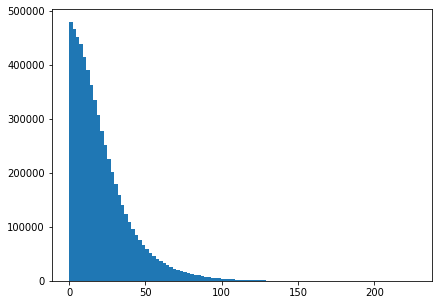

In [ ]:
# Plot distribution of errors in cover and secret images.
pixel_histogram(diff_S1, diff_S2, diff_S3, diff_C)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

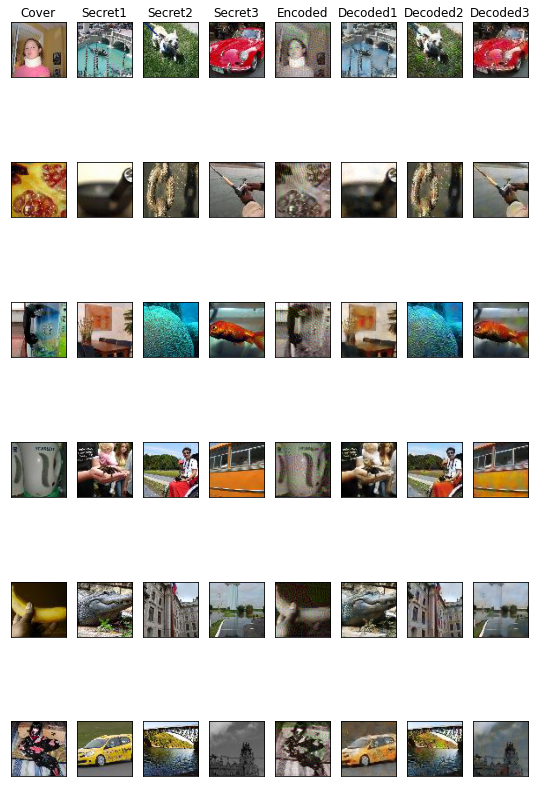

In [ ]:
# Configs for results display

# Show images in gray scale
SHOW_GRAY = False
# Show difference bettwen predictions and ground truth.
SHOW_DIFF = True

# Diff enhance magnitude
ENHANCE = 1

# Number of secret and cover pairs to show.
n = 6

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def show_image(img, n_rows, n_col, idx, gray=False, first_row=False, title=None):
    ax = plt.subplot(n_rows, n_col, idx)
    if gray:
        plt.imshow(rgb2gray(img), cmap = plt.get_cmap('gray'))
    else:
        plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if first_row:
        plt.title(title)

plt.figure(figsize=(14, 15))
rand_indx = [random.randint(0, 500) for x in range(n)]
# for i, idx in enumerate(range(0, n)):
for i, idx in enumerate(rand_indx):
    n_col = 12 if SHOW_DIFF else 8
    
    show_image(input_C[idx], n, n_col, i * n_col + 1, gray=SHOW_GRAY, first_row=i==0, title='Cover')

    show_image(input_S1[idx], n, n_col, i * n_col + 2, gray=SHOW_GRAY, first_row=i==0, title='Secret1')

    show_image(input_S2[idx], n, n_col, i * n_col + 3, gray=SHOW_GRAY, first_row=i==0, title='Secret2')

    show_image(input_S3[idx], n, n_col, i * n_col + 4, gray=SHOW_GRAY, first_row=i==0, title='Secret3')
    
    show_image(decoded_C[idx], n, n_col, i * n_col + 5, gray=SHOW_GRAY, first_row=i==0, title='Encoded')
    
    show_image(decoded_S1[idx], n, n_col, i * n_col + 6, gray=SHOW_GRAY, first_row=i==0, title='Decoded1')

    show_image(decoded_S2[idx], n, n_col, i * n_col + 7, gray=SHOW_GRAY, first_row=i==0, title='Decoded2')

    show_image(decoded_S3[idx], n, n_col, i * n_col + 8, gray=SHOW_GRAY, first_row=i==0, title='Decoded3')

    
    # if SHOW_DIFF:
    #     show_image(np.multiply(diff_C[idx], ENHANCE), n, n_col, i * n_col + 9, gray=SHOW_GRAY, first_row=i==0, title='Diff Cover')
        
    #     show_image(np.multiply(diff_S1[idx], ENHANCE), n, n_col, i * n_col + 10, gray=SHOW_GRAY, first_row=i==0, title='Diff Secret1')

    #     show_image(np.multiply(diff_S2[idx], ENHANCE), n, n_col, i * n_col + 11, gray=SHOW_GRAY, first_row=i==0, title='Diff Secret2')

    #     show_image(np.multiply(diff_S3[idx], ENHANCE), n, n_col, i * n_col + 12, gray=SHOW_GRAY, first_row=i==0, title='Diff Secret3')

plt.show()